In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
input_images_directory = "dataset\\normalized"

In [3]:
def get_images(directory):
    files = os.listdir(directory)
    result = []
    extensions = ['.png', '.jpg', '.jpeg']
    for f in files:
        if any(e in f.lower() for e in extensions):
            result.append(os.path.join(directory, f))
    return result

In [4]:
def resize_and_pad(img, size, padColor=0):

    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h  # if on Python 2, you might need to cast as a float: float(w)/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) == 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, pad_left, pad_right, borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img

In [5]:
imgs = get_images(input_images_directory)

In [6]:
def detect_cluster(xs, window):
    xs = np.sort(xs)

    current = xs[0]
    cluster = [xs[0]]
    points = []

    for i in range(0, len(xs)):
        x = xs[i]

        if abs(x - np.mean(cluster)) < window:
            cluster.append(x)
        else:
            points.append(np.mean(cluster))
            cluster = [x]
    
    points.append(np.mean(cluster))

    return points

def extract_cells(xs, ys):
    result = []
    for i in range(len(xs)-1):
        x1, x2 = xs[i:i+2]
        for j in range(len(ys)-1):
            y1, y2 = ys[j:j+2]
            result.append((int(x1), int(y1), int(x2), int(y2), 9*j+i))
    return result

In [7]:
import itertools

def img_to_grid(w, h, margin, imgs, file_name):
    n = w*h

    if len(imgs) != n:
        print(len(imgs))
        raise ValueError('Number of images  does not match.')

    img_h, img_w, img_c = imgs[0].shape

    m_x = 0
    m_y = 0
    if margin is not None:
        margin = margin[0]
        m_x = int(margin)
        m_y = m_x

    imgmatrix = np.zeros((img_h * h + m_y * (h - 1),
                          img_w * w + m_x * (w - 1),
                          img_c),
                         np.uint8)

    imgmatrix.fill(255)    

    positions = itertools.product(range(w), range(h))
    for (x_i, y_i), img in zip(positions, imgs):
        x = x_i * (img_w + m_x)
        y = y_i * (img_h + m_y)
        imgmatrix[y:y+img_h, x:x+img_w, :] = img

    cv2.imwrite(file_name, imgmatrix) 

[83.32, 122.5, 162.2, 197.5, 235.0, 271.5, 309.5, 347.5, 384.5, 421.6] [36.8, 75.70833333333333, 113.0, 150.5, 187.5, 225.5, 263.5, 300.0, 338.0, 373.0, 412.6666666666667]
[(83, 36, 122, 75, 0), (83, 75, 122, 113, 9), (83, 113, 122, 150, 18), (83, 150, 122, 187, 27), (83, 187, 122, 225, 36), (83, 225, 122, 263, 45), (83, 263, 122, 300, 54), (83, 300, 122, 338, 63), (83, 338, 122, 373, 72), (83, 373, 122, 412, 81), (122, 36, 162, 75, 1), (122, 75, 162, 113, 10), (122, 113, 162, 150, 19), (122, 150, 162, 187, 28), (122, 187, 162, 225, 37), (122, 225, 162, 263, 46), (122, 263, 162, 300, 55), (122, 300, 162, 338, 64), (122, 338, 162, 373, 73), (122, 373, 162, 412, 82), (162, 36, 197, 75, 2), (162, 75, 197, 113, 11), (162, 113, 197, 150, 20), (162, 150, 197, 187, 29), (162, 187, 197, 225, 38), (162, 225, 197, 263, 47), (162, 263, 197, 300, 56), (162, 300, 197, 338, 65), (162, 338, 197, 373, 74), (162, 373, 197, 412, 83), (197, 36, 235, 75, 3), (197, 75, 235, 113, 12), (197, 113, 235, 150, 2

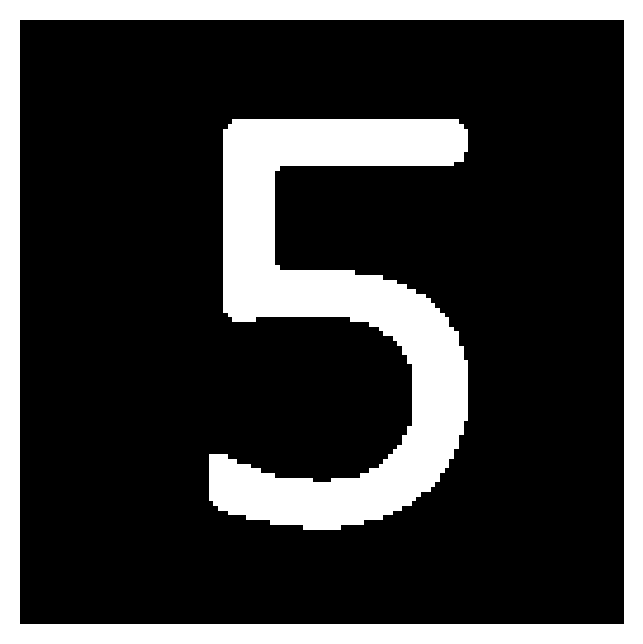

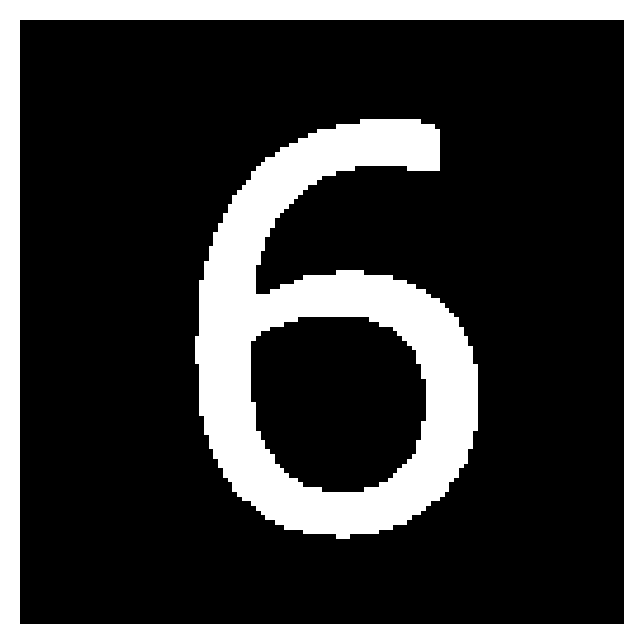

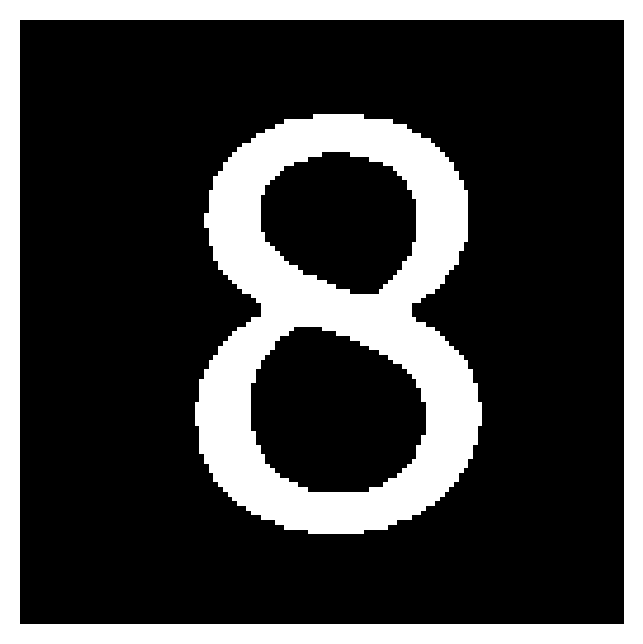

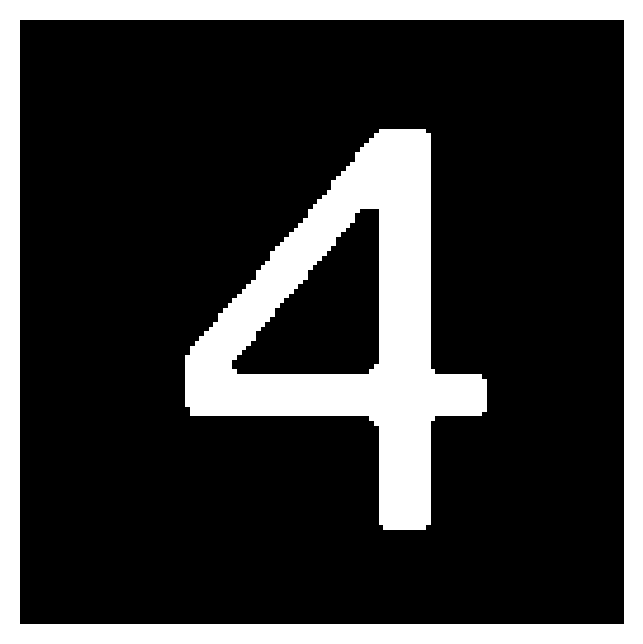

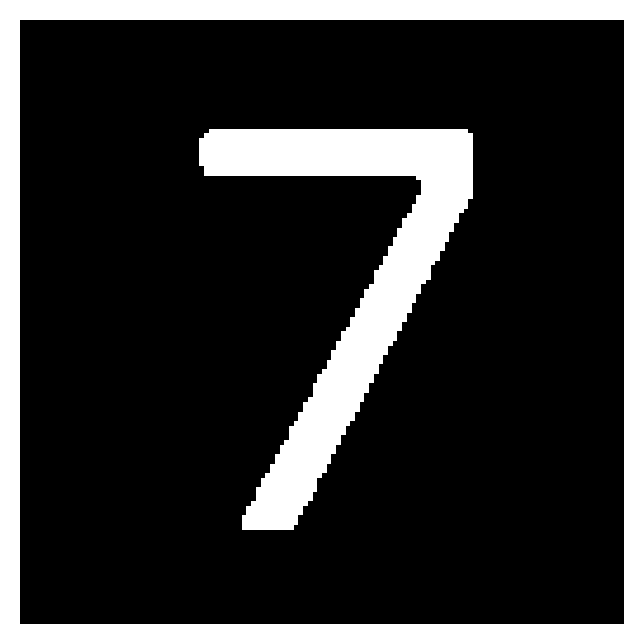

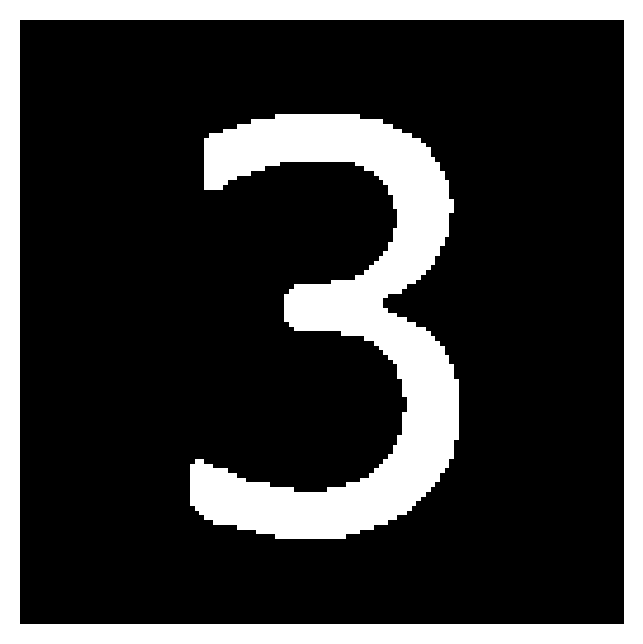

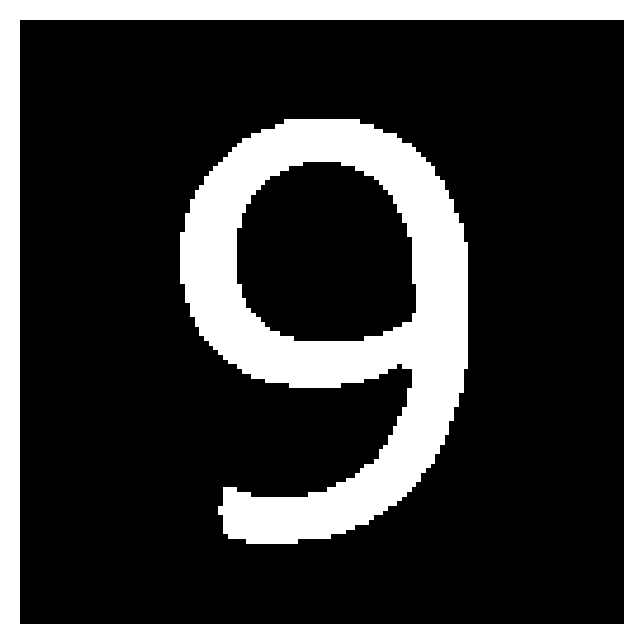

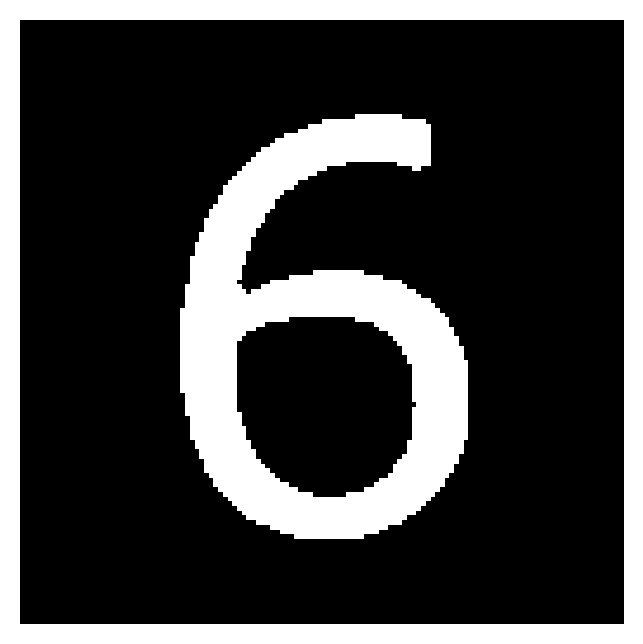

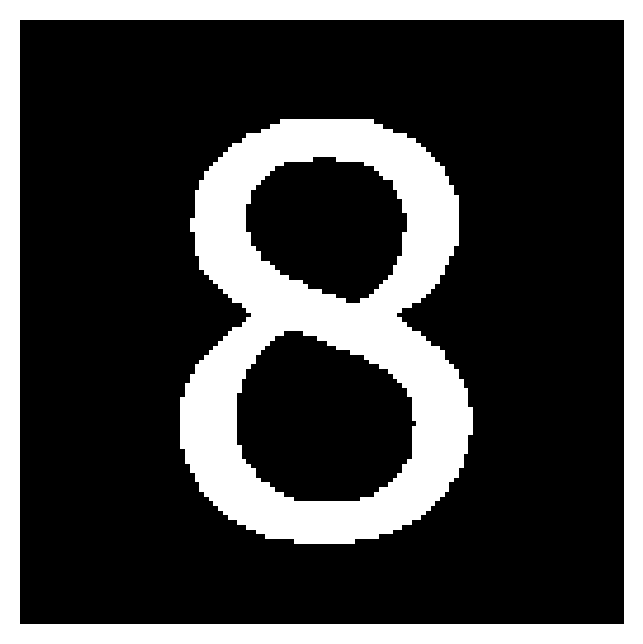

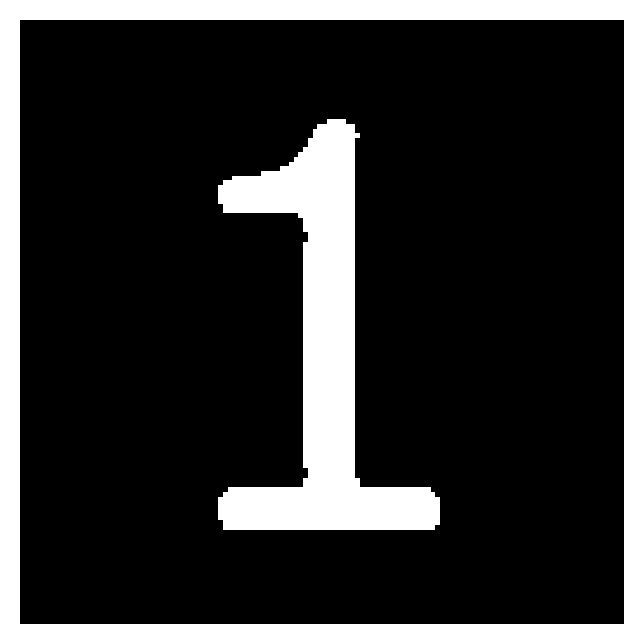

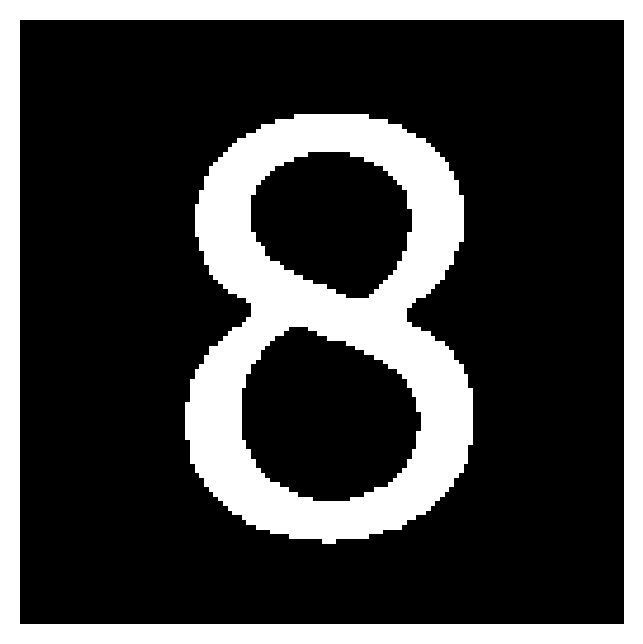

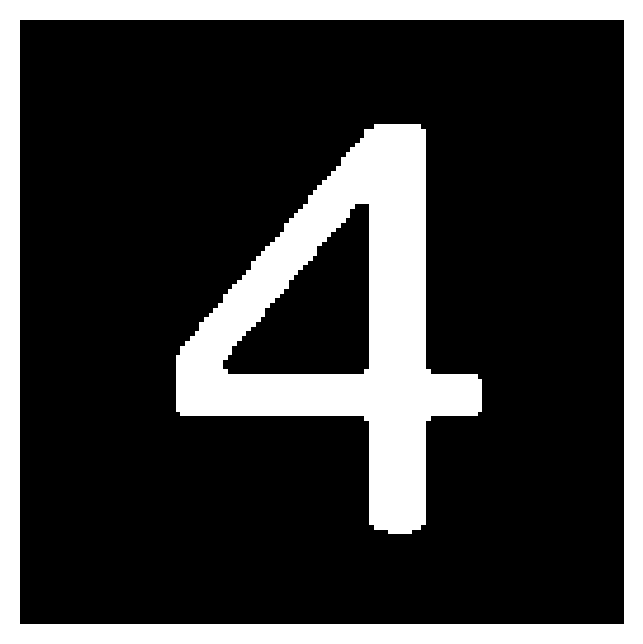

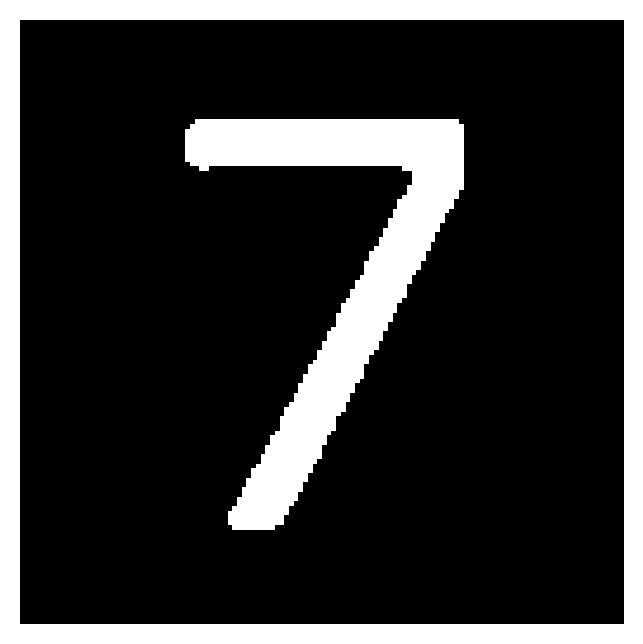

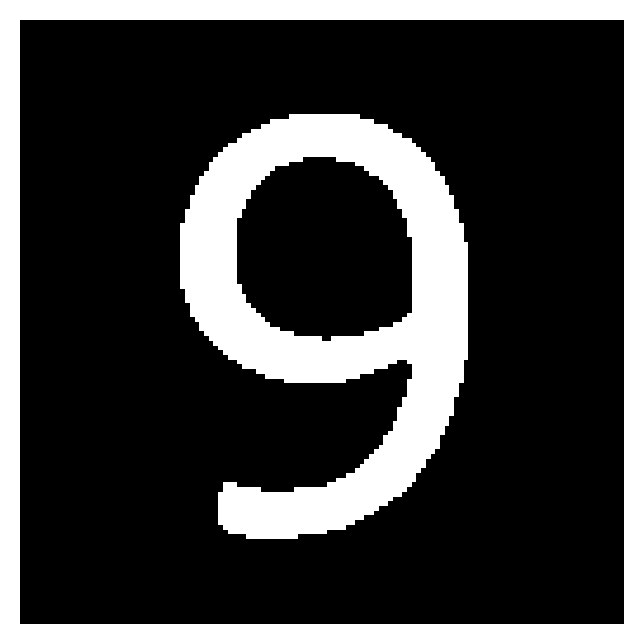

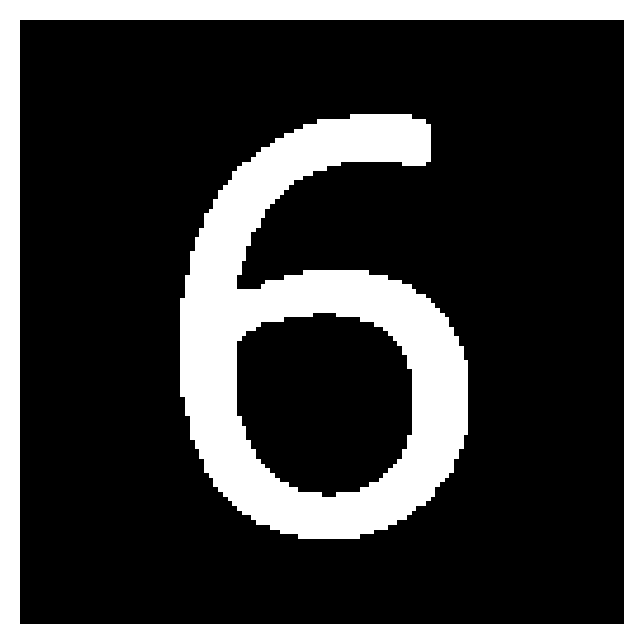

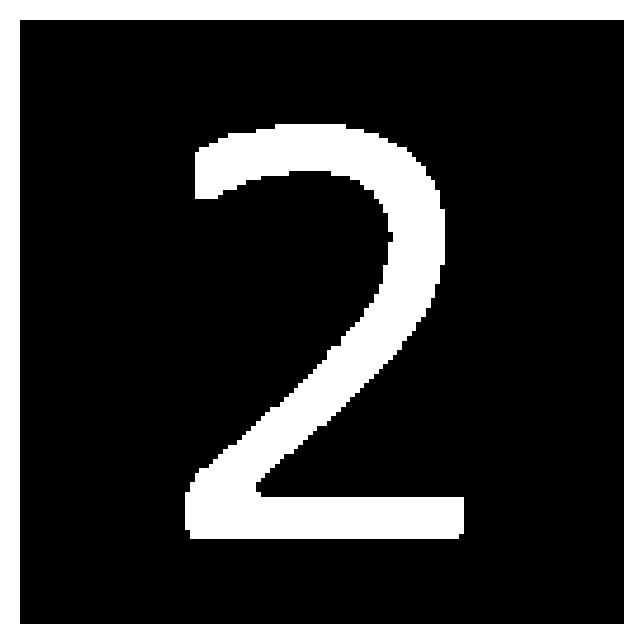

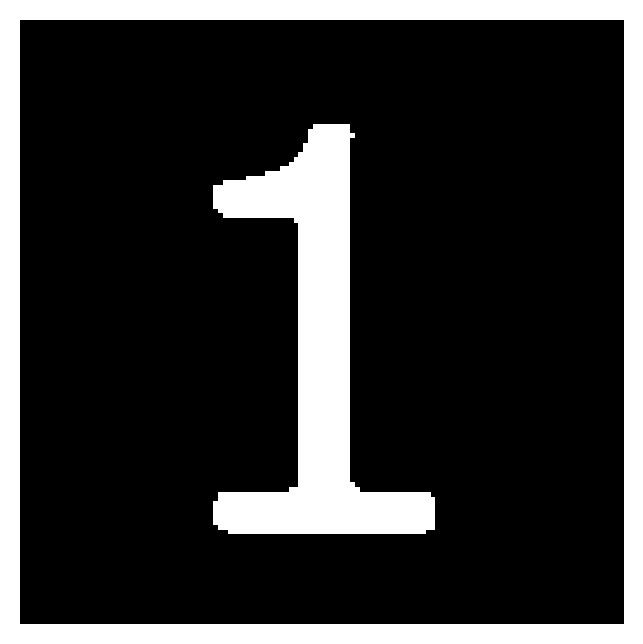

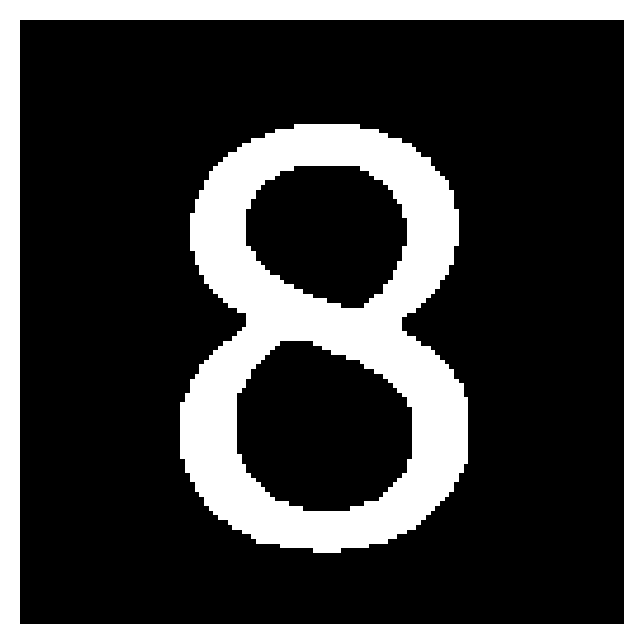

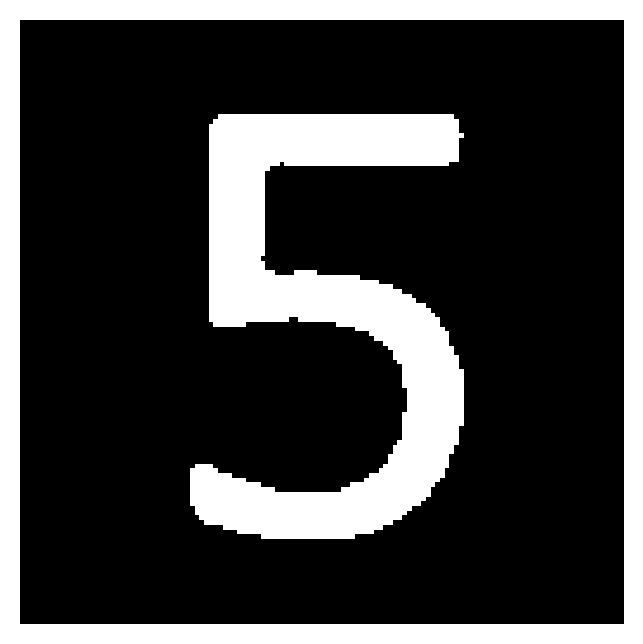

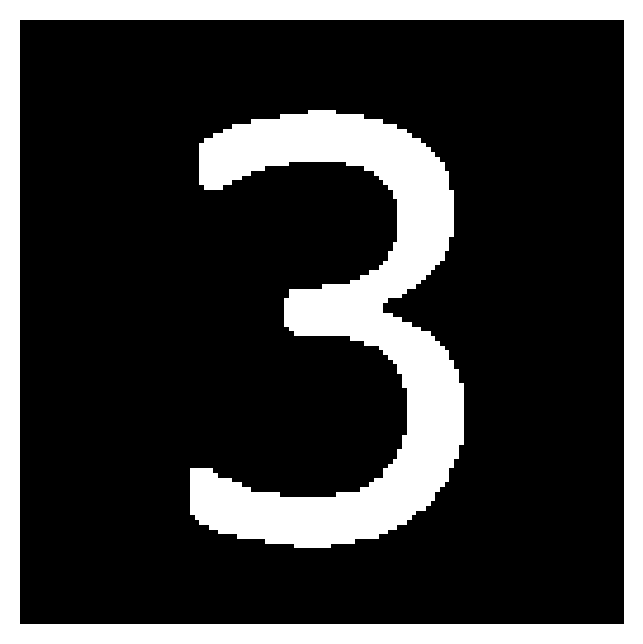

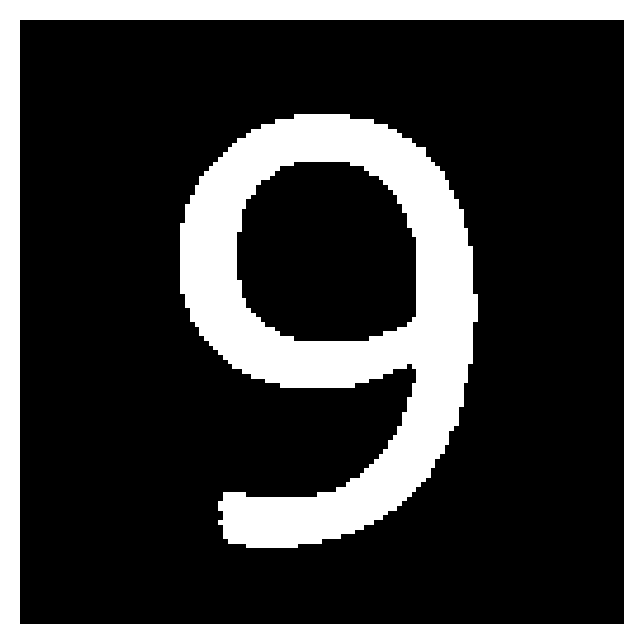

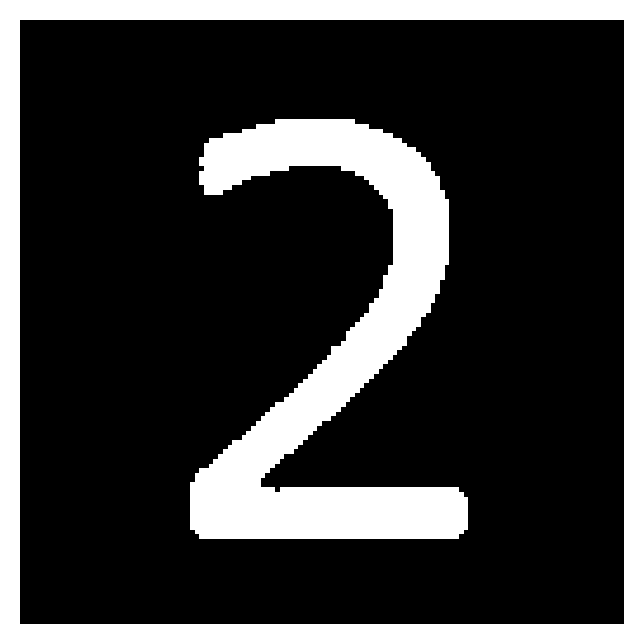

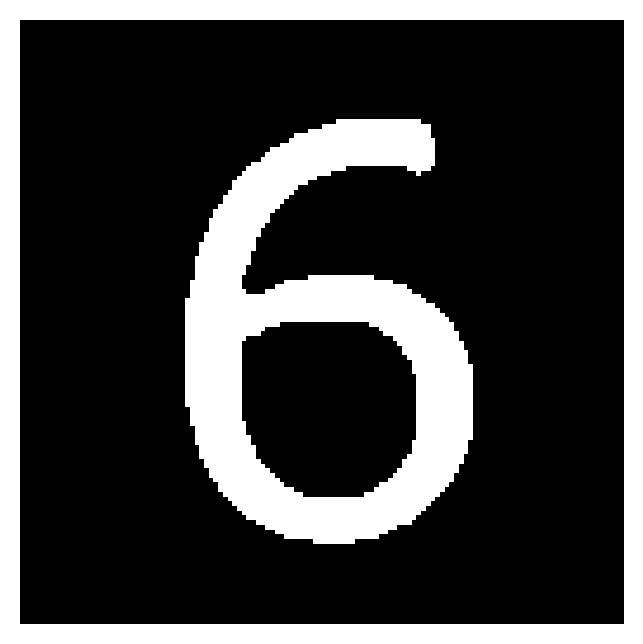

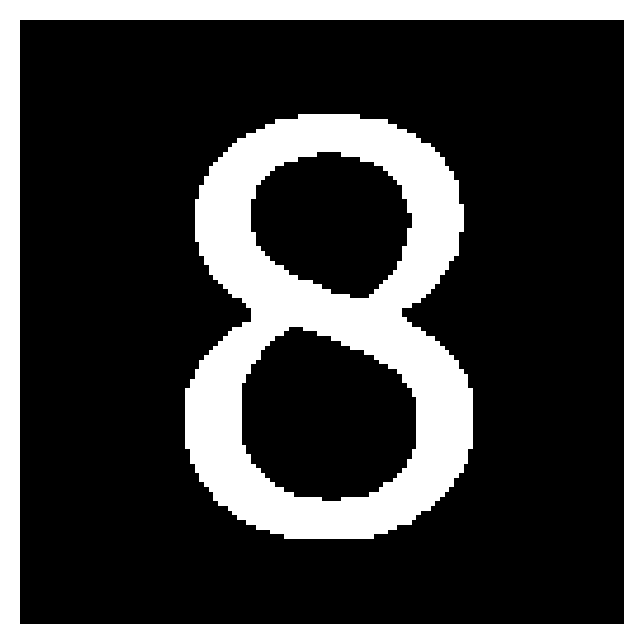

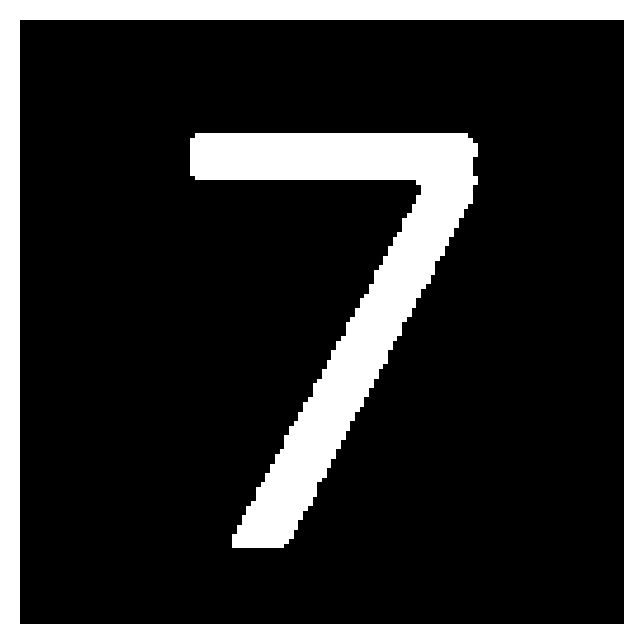

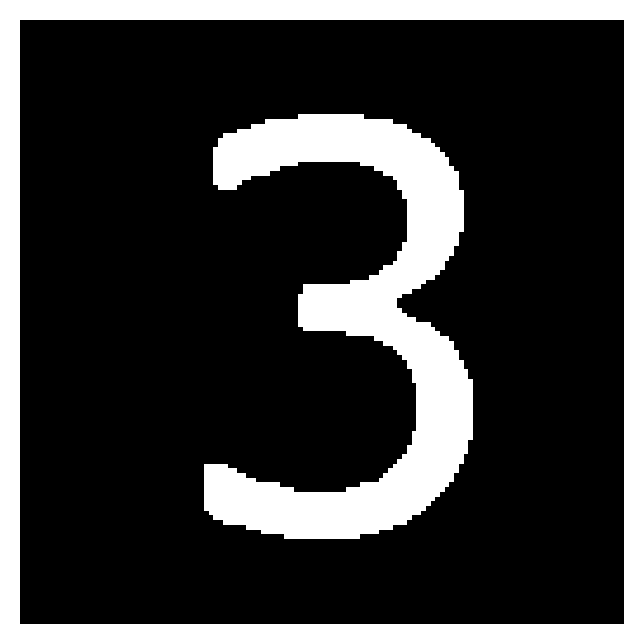

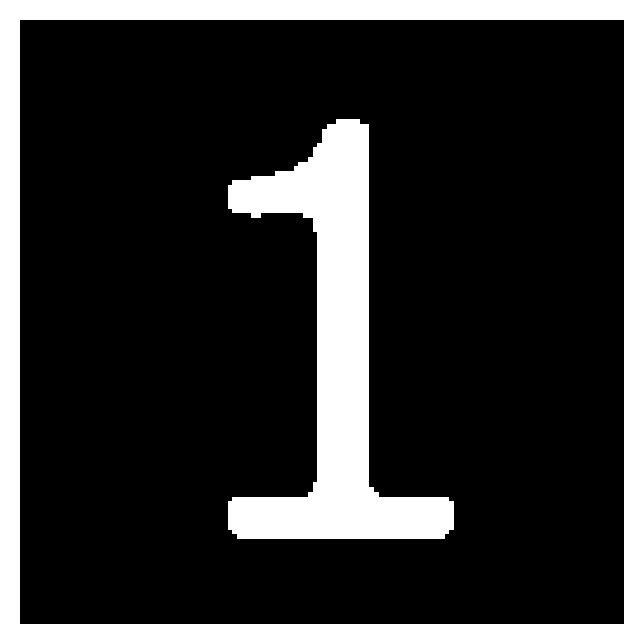

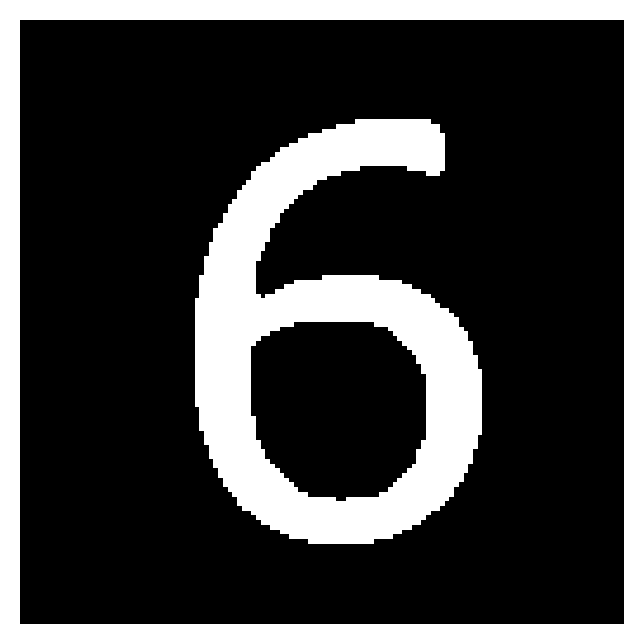

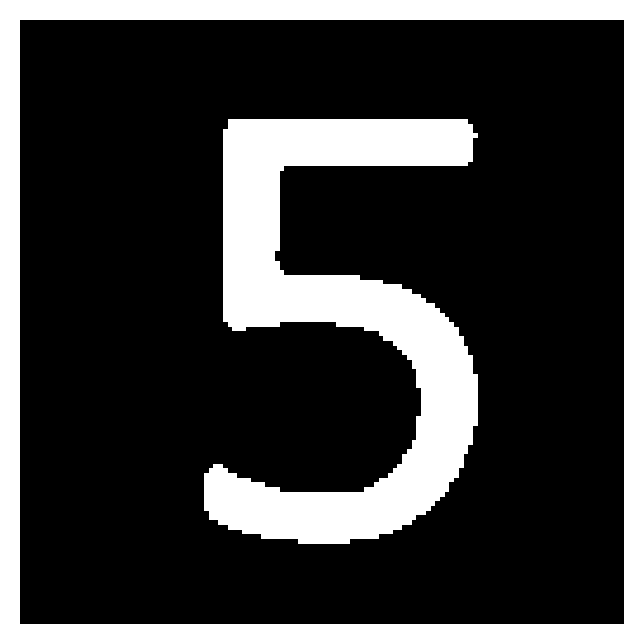

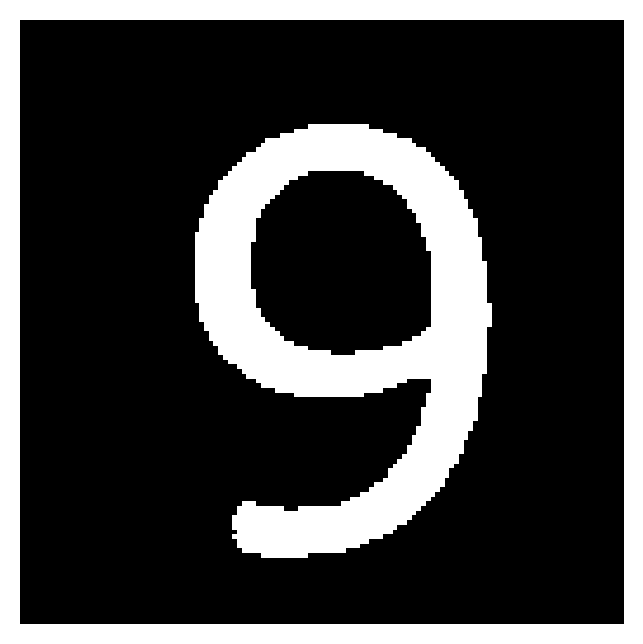

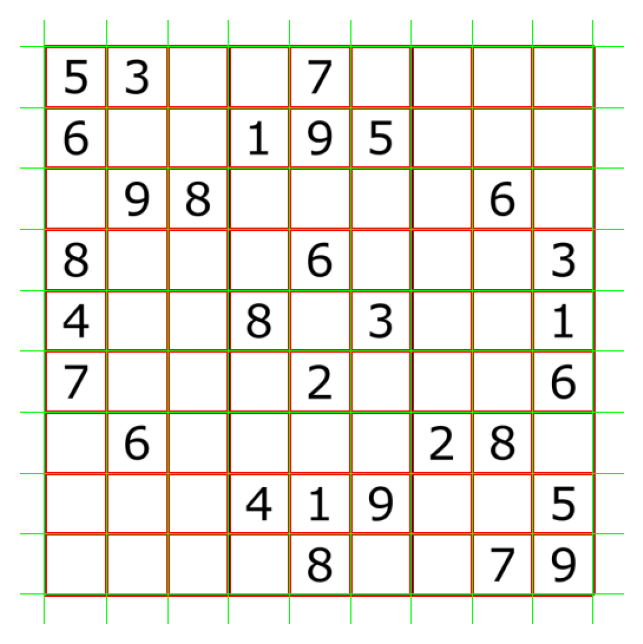

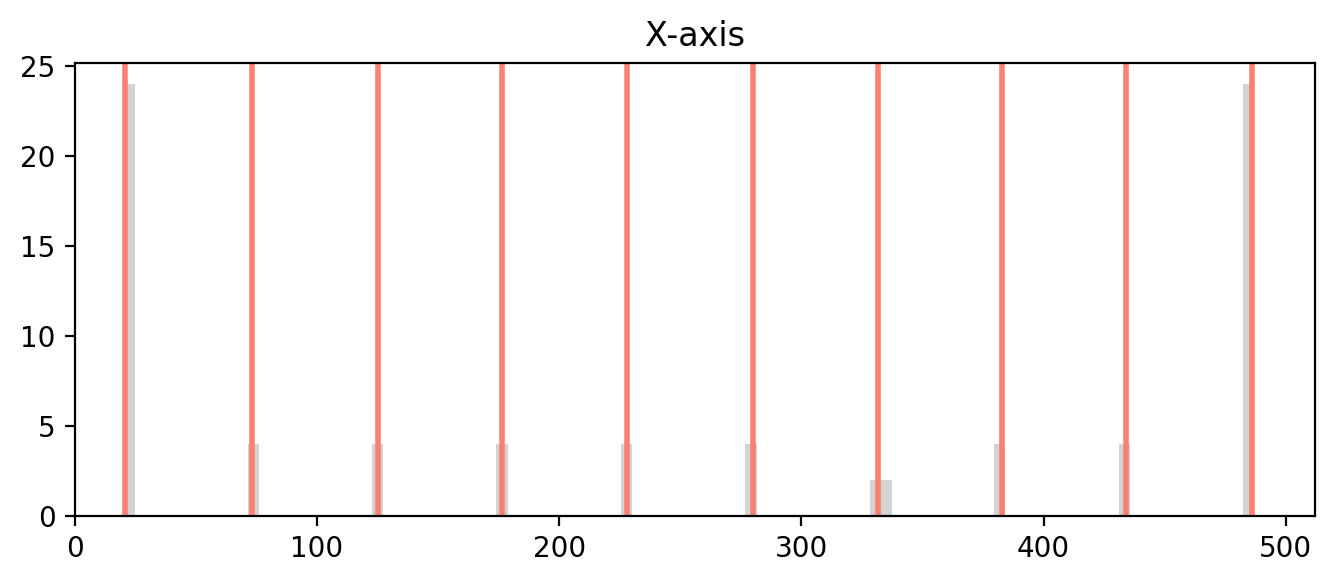

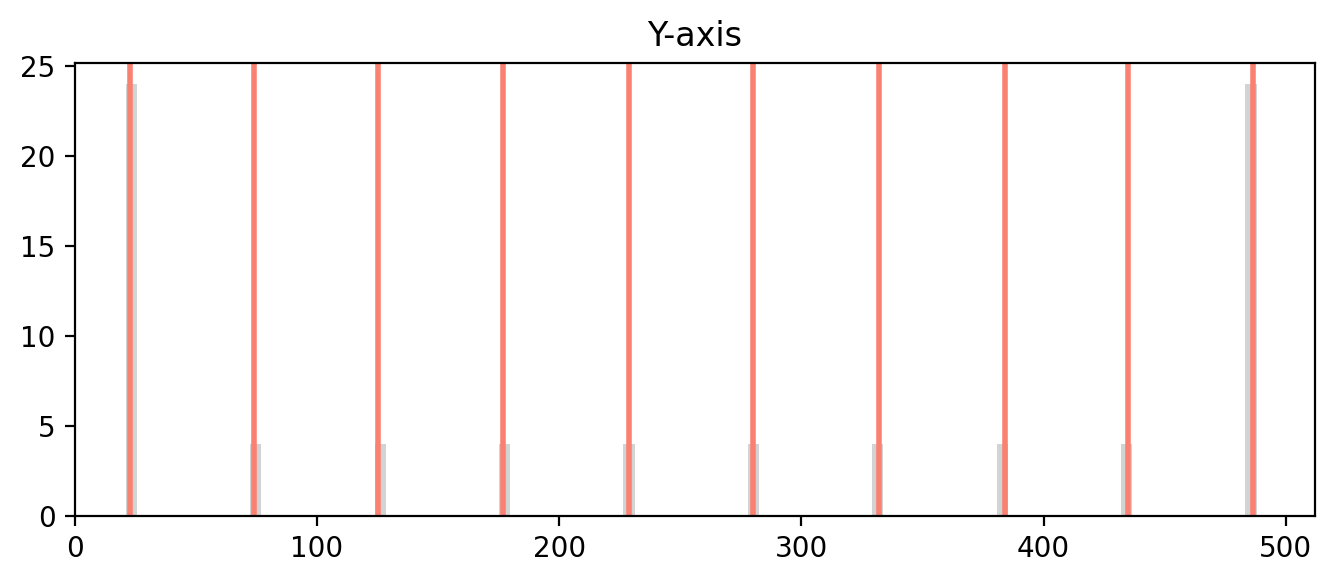

[70.11111111111111, 98.0, 113.0, 145.0, 176.0, 205.0, 230.25, 257.0, 291.0, 329.0, 390.0, 424.0, 447.0] [0.0, 85.33333333333333, 125.0, 165.0, 200.0, 284.6666666666667, 323.8, 349.0, 405.75, 452.0, 511.0]
[(70, 0, 98, 85, 0), (70, 85, 98, 125, 9), (70, 125, 98, 165, 18), (70, 165, 98, 200, 27), (70, 200, 98, 284, 36), (70, 284, 98, 323, 45), (70, 323, 98, 349, 54), (70, 349, 98, 405, 63), (70, 405, 98, 452, 72), (70, 452, 98, 511, 81), (98, 0, 113, 85, 1), (98, 85, 113, 125, 10), (98, 125, 113, 165, 19), (98, 165, 113, 200, 28), (98, 200, 113, 284, 37), (98, 284, 113, 323, 46), (98, 323, 113, 349, 55), (98, 349, 113, 405, 64), (98, 405, 113, 452, 73), (98, 452, 113, 511, 82), (113, 0, 145, 85, 2), (113, 85, 145, 125, 11), (113, 125, 145, 165, 20), (113, 165, 145, 200, 29), (113, 200, 145, 284, 38), (113, 284, 145, 323, 47), (113, 323, 145, 349, 56), (113, 349, 145, 405, 65), (113, 405, 145, 452, 74), (113, 452, 145, 511, 83), (145, 0, 176, 85, 3), (145, 85, 176, 125, 12), (145, 125, 17

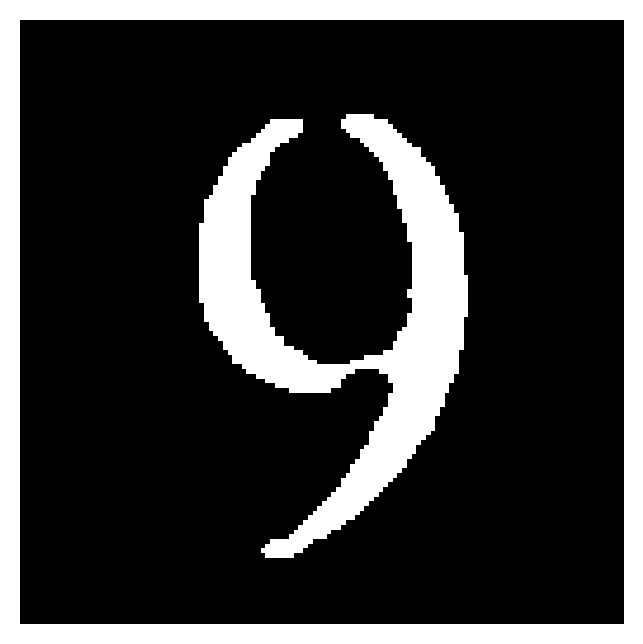

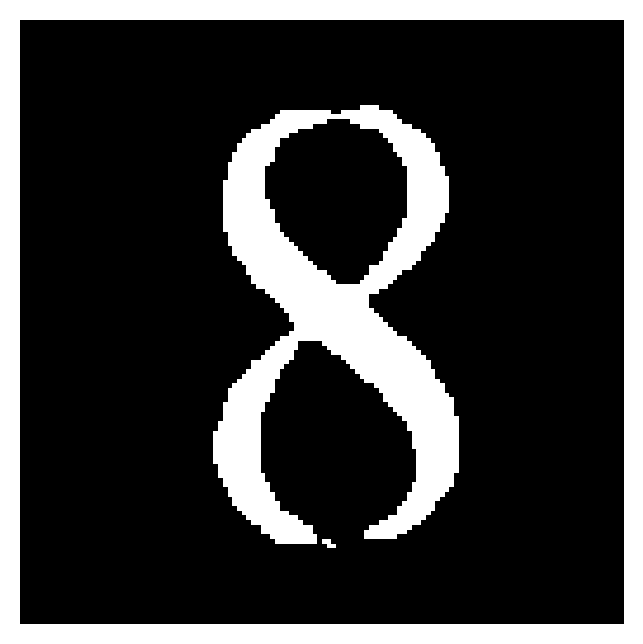

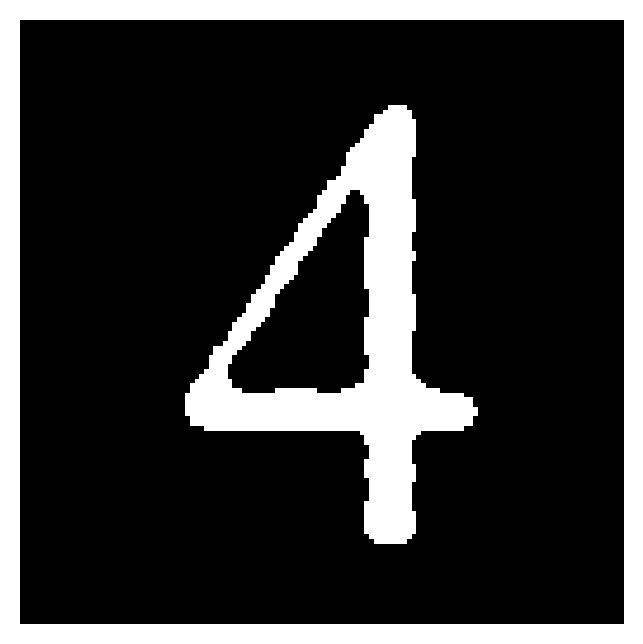

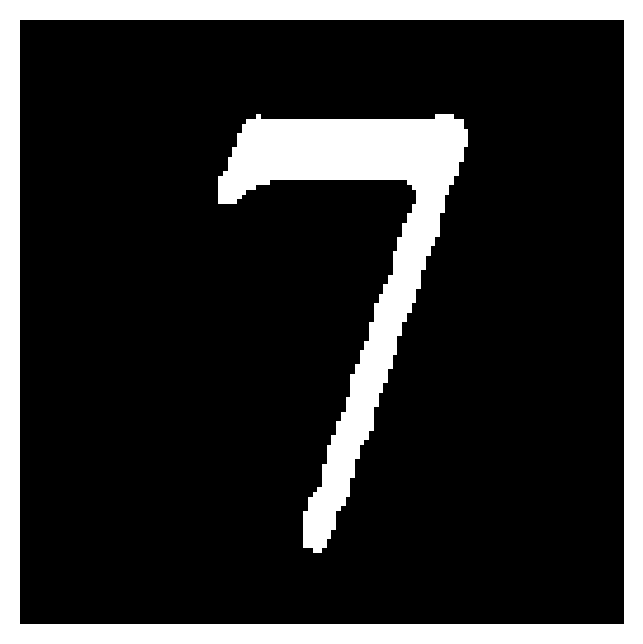

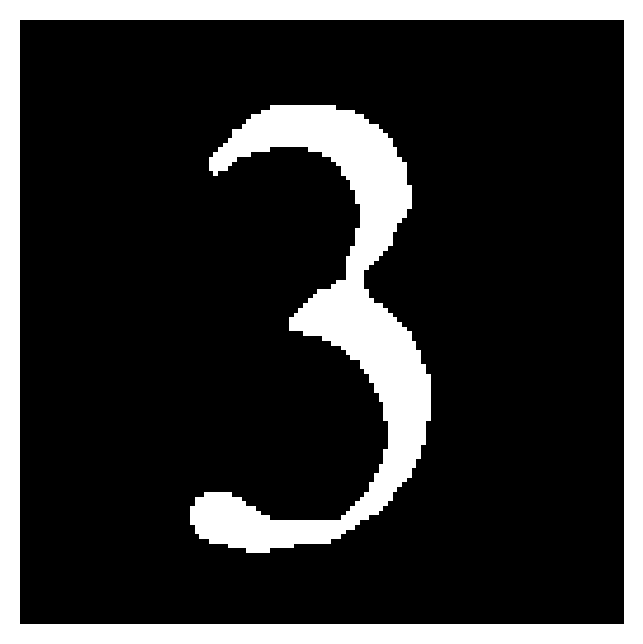

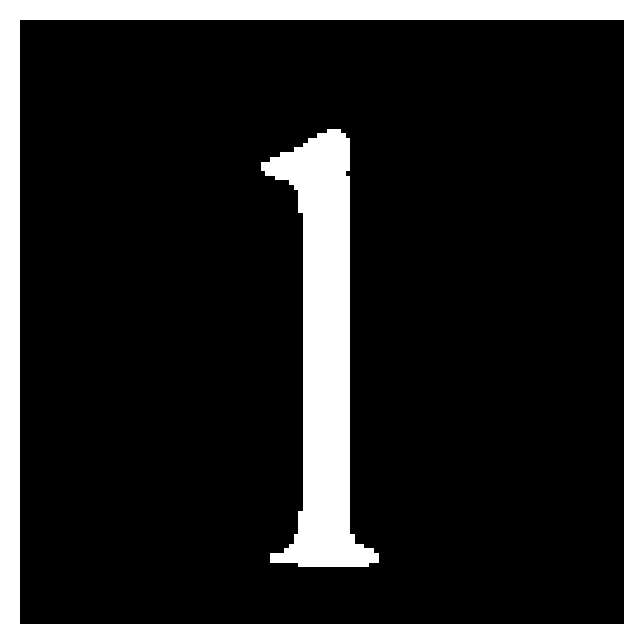

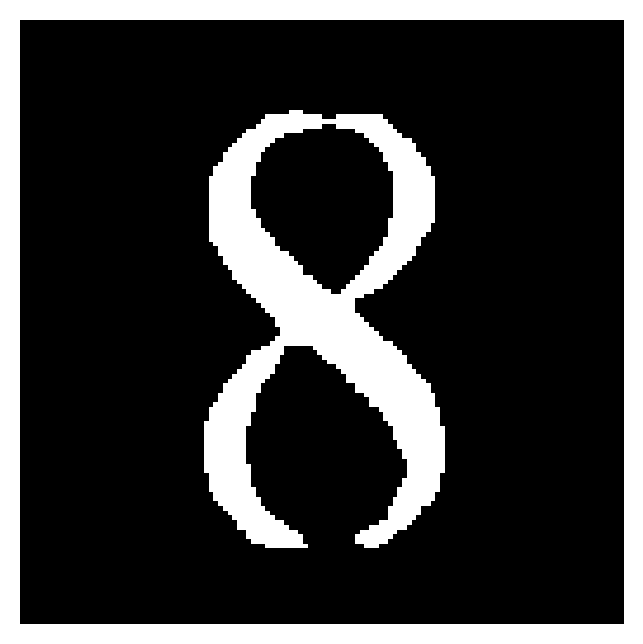

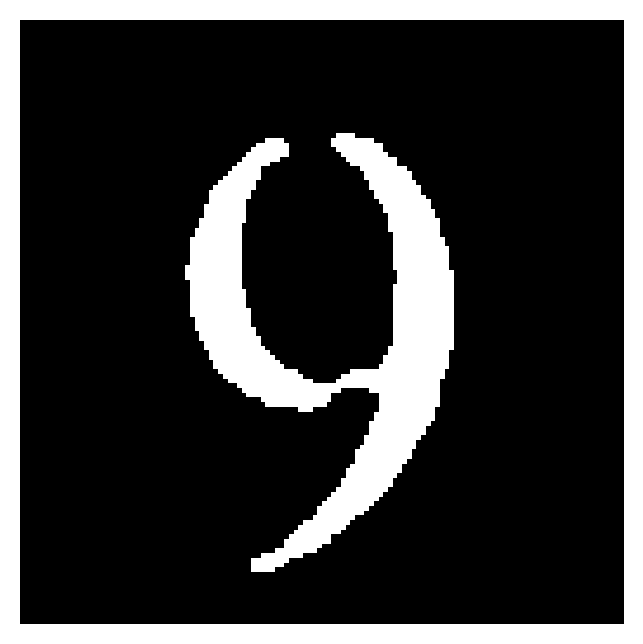

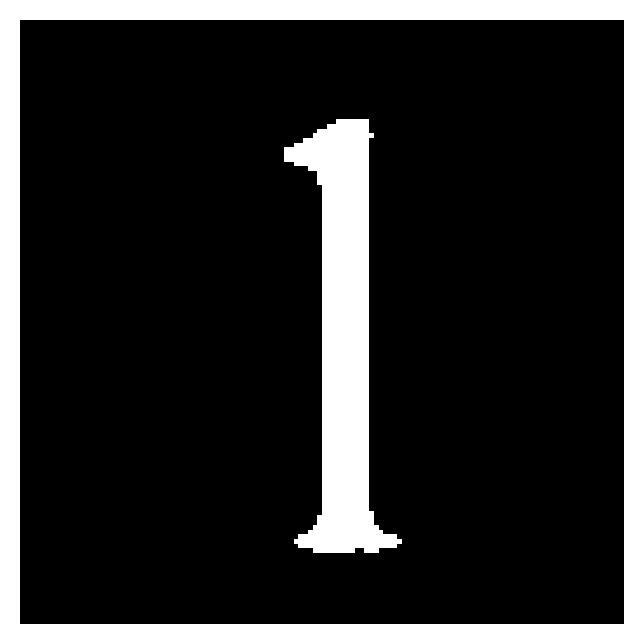

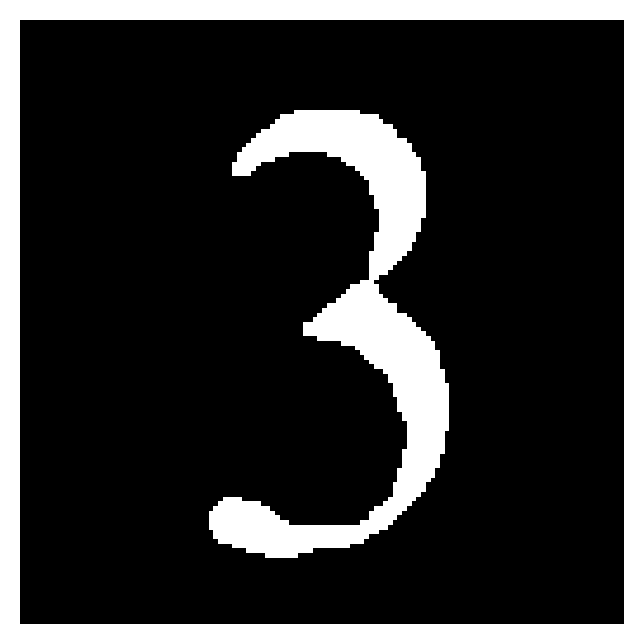

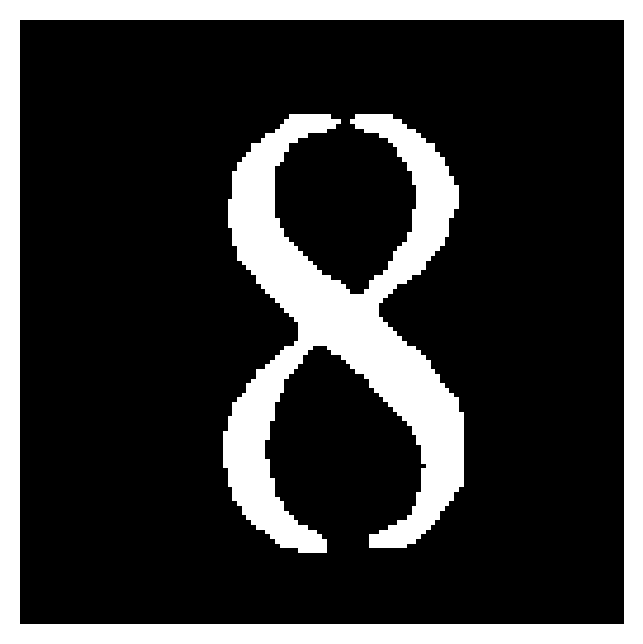

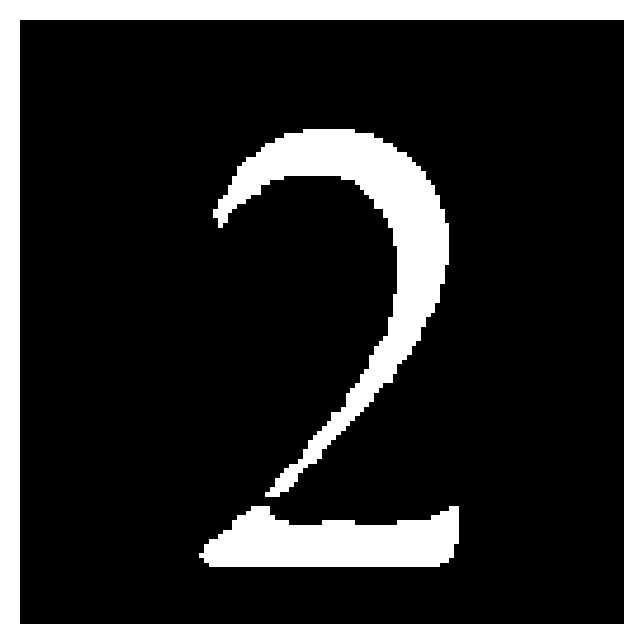

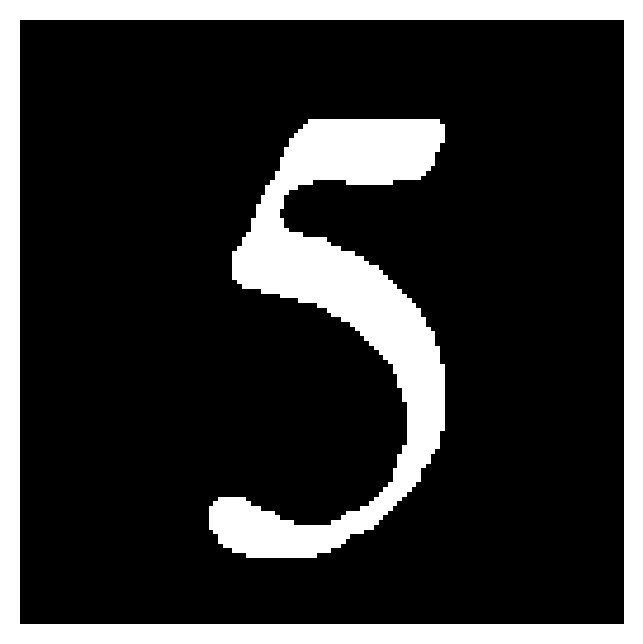

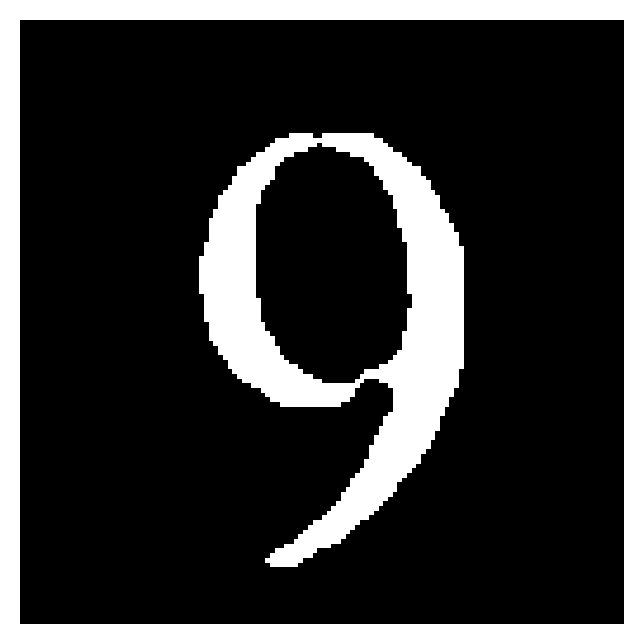

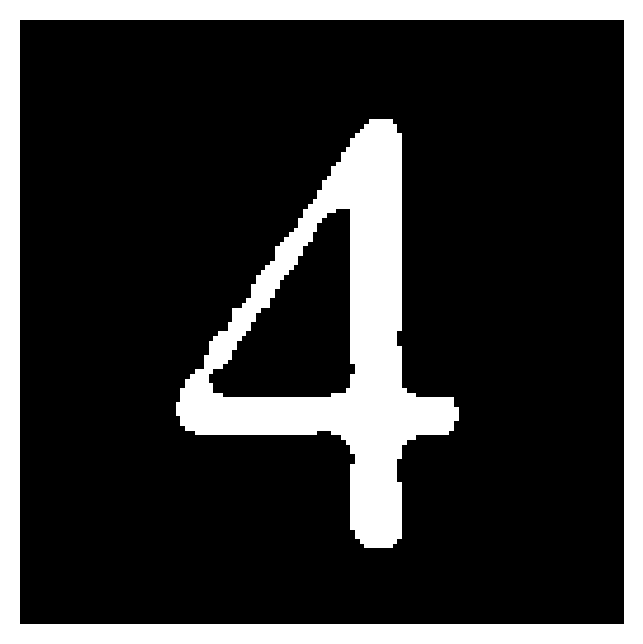

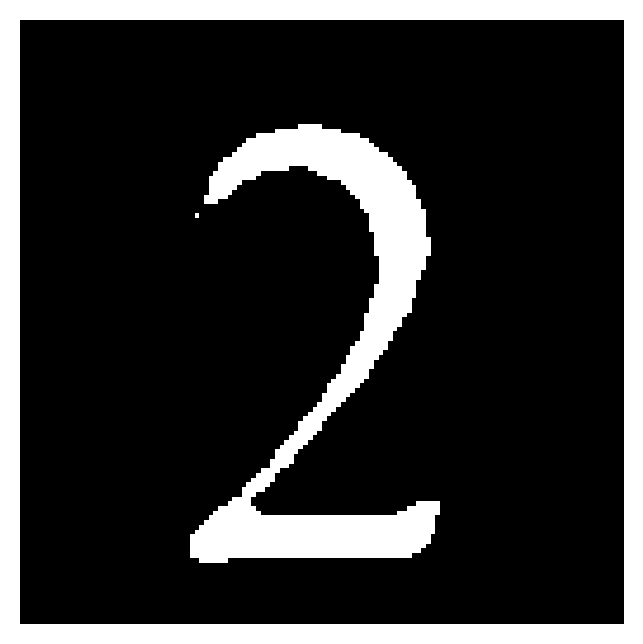

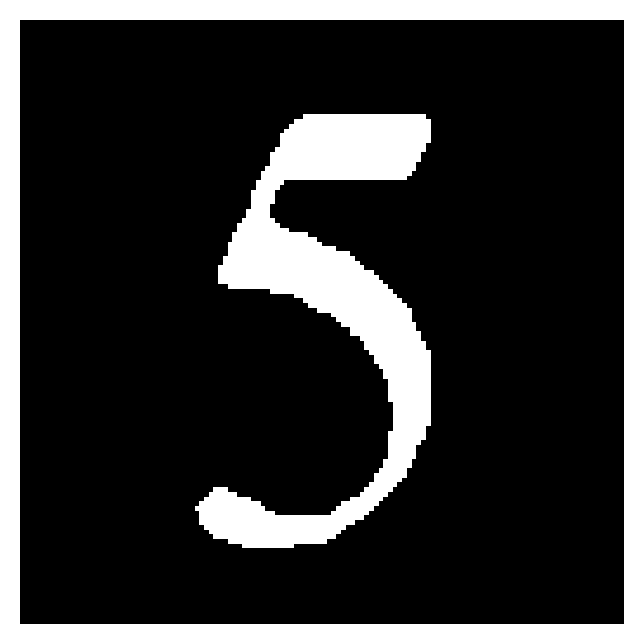

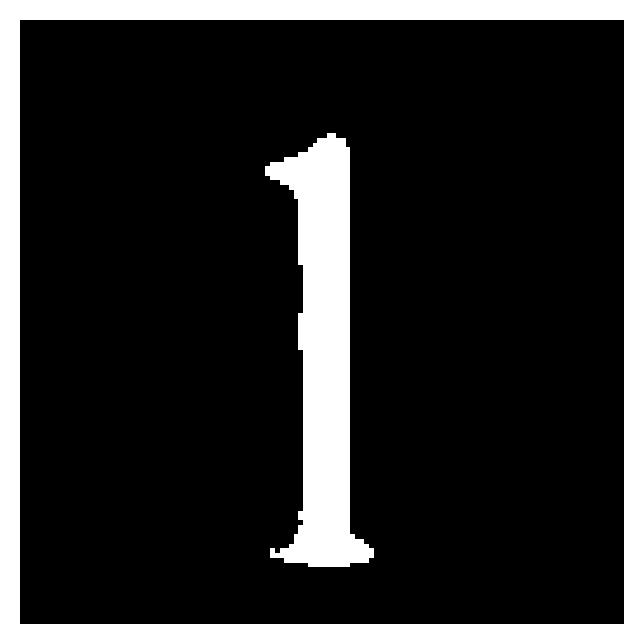

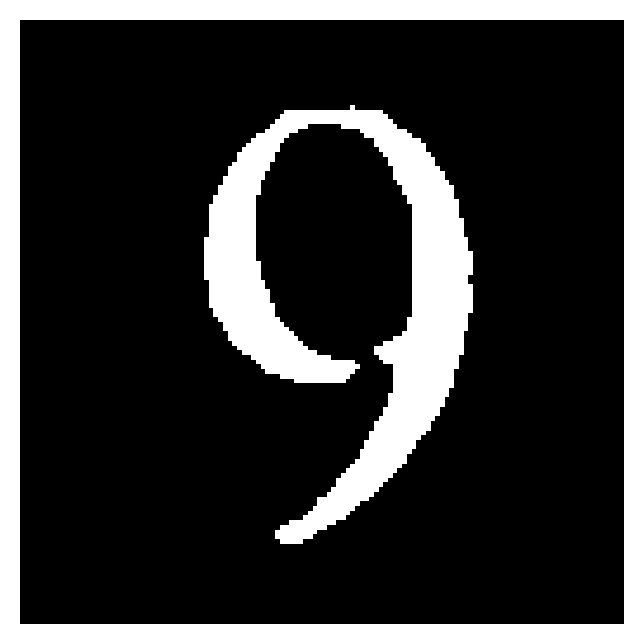

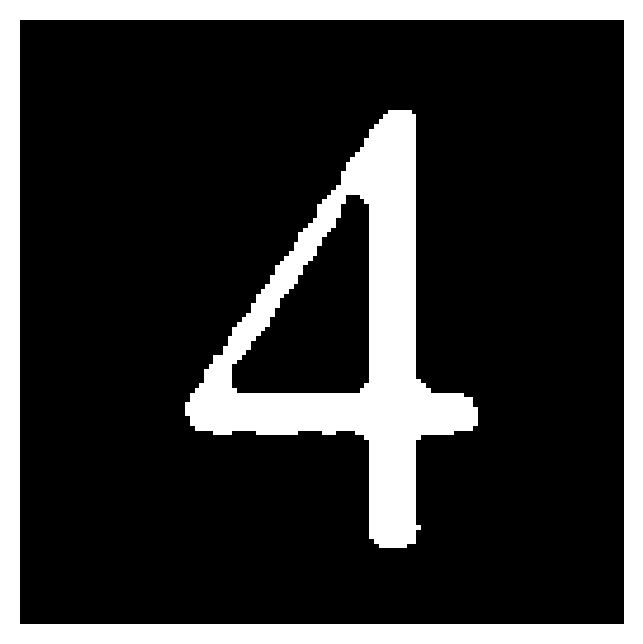

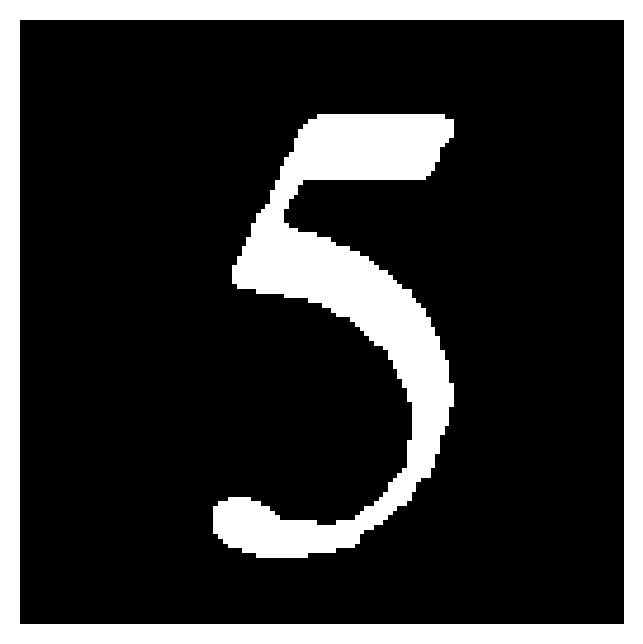

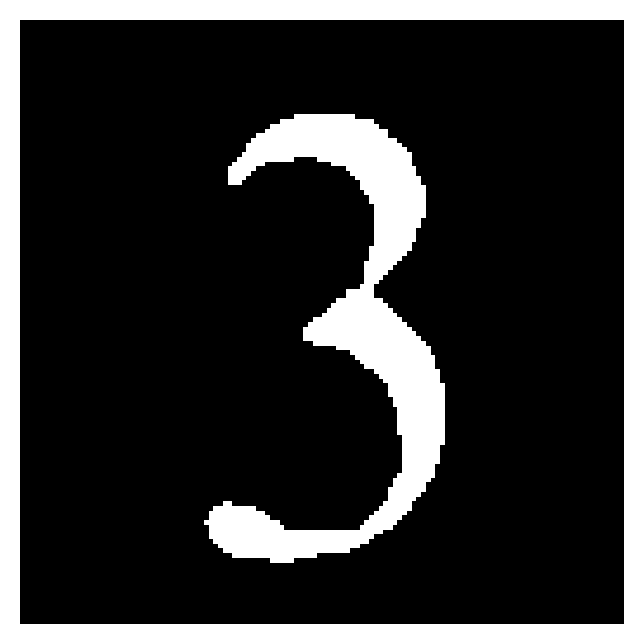

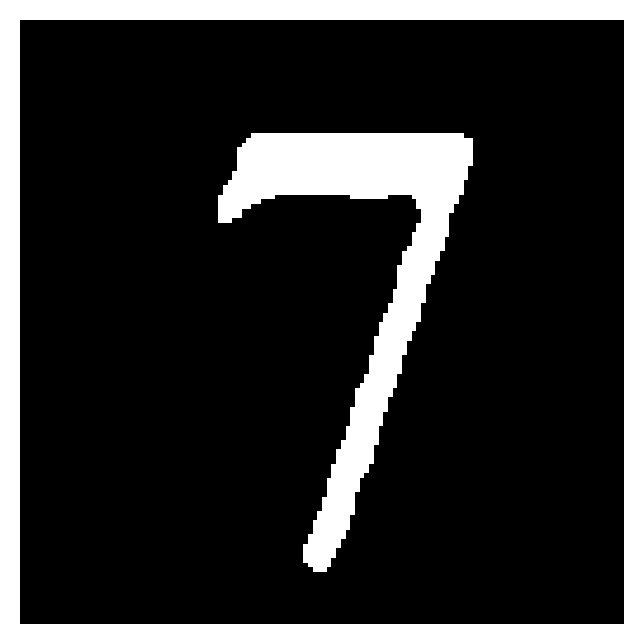

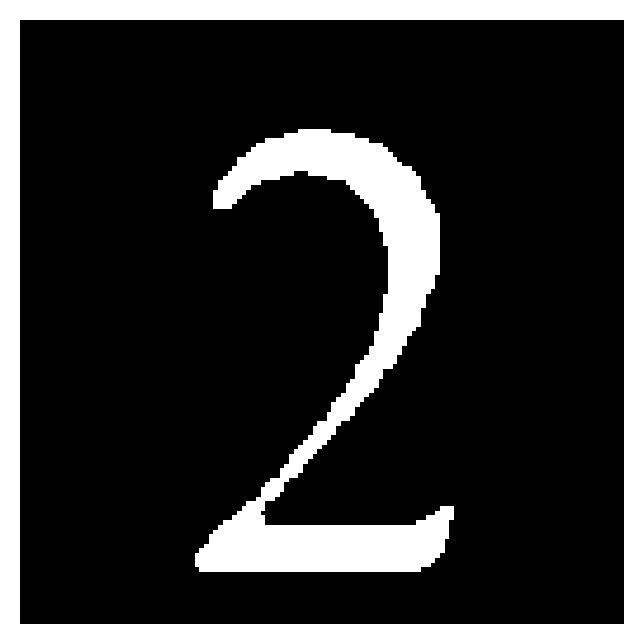

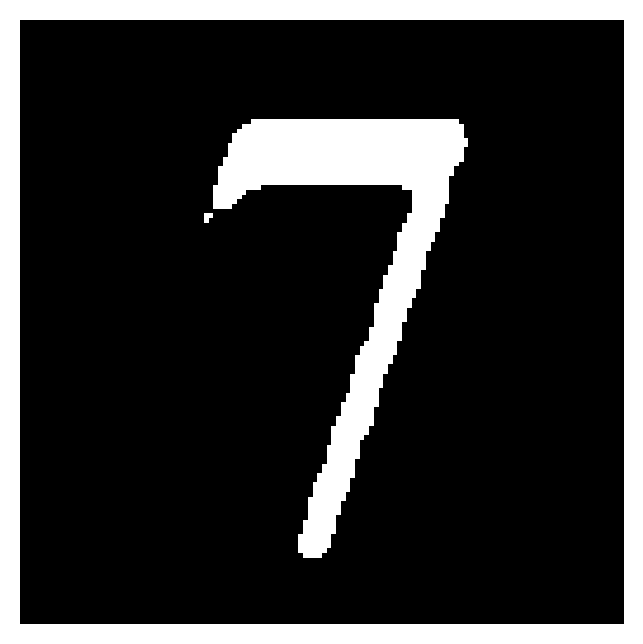

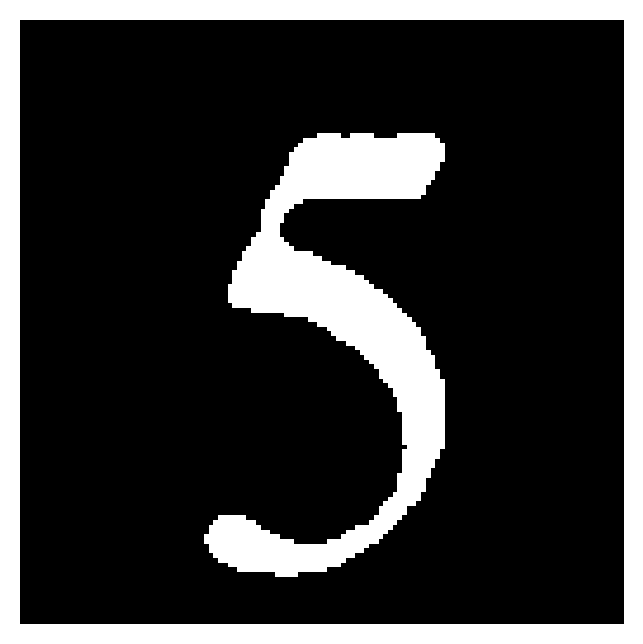

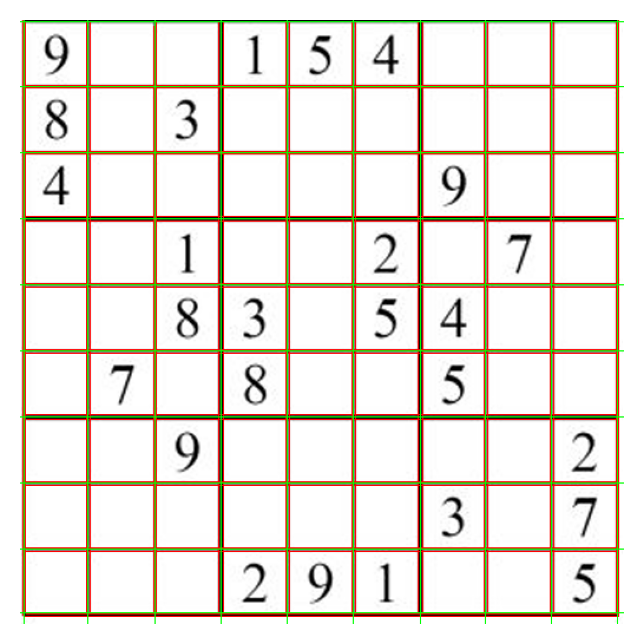

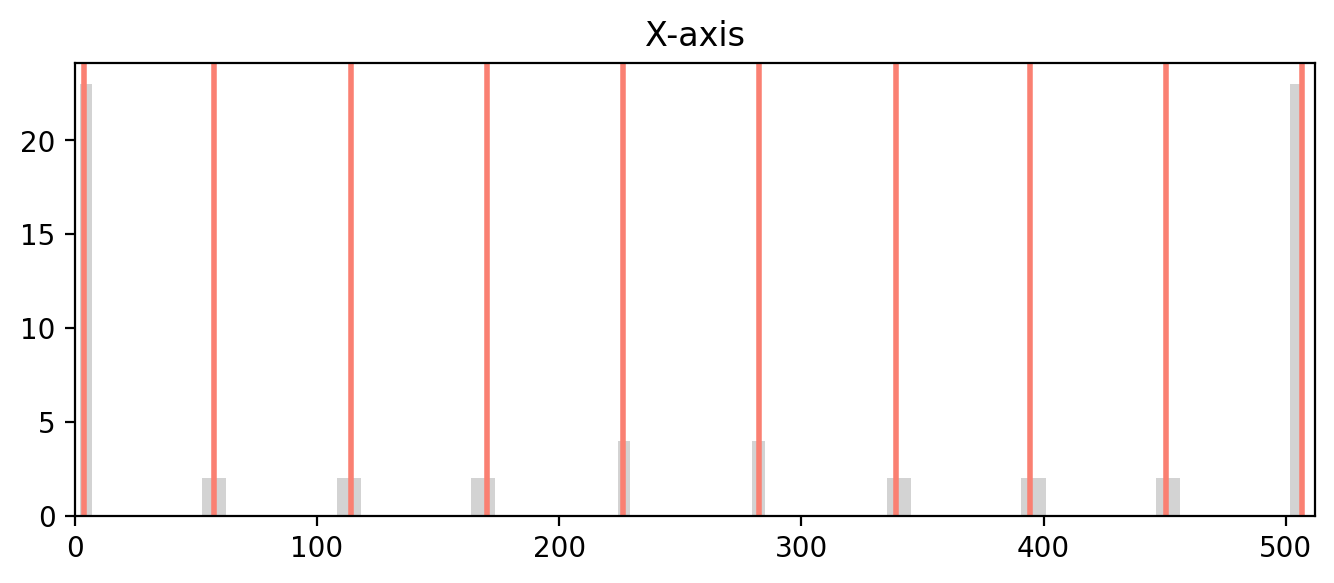

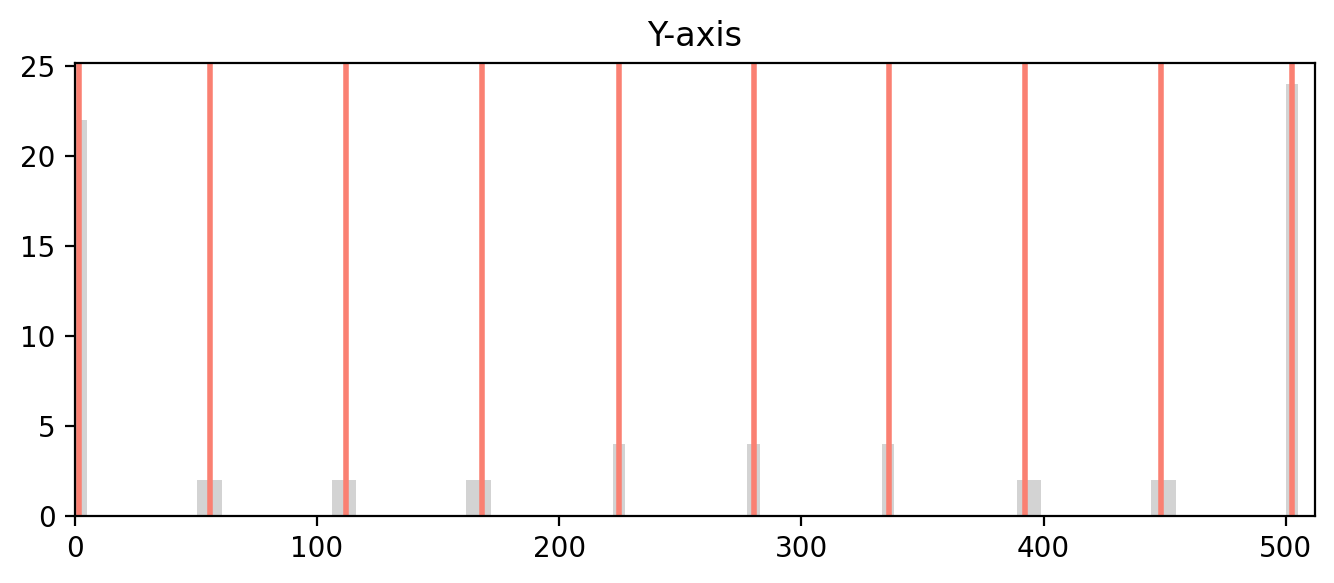

[5.75, 59.5, 115.5, 174.14285714285714, 227.5, 283.0, 336.625, 395.5, 451.0, 506.05263157894734] [8.68, 63.0, 117.0, 171.2, 227.0, 281.5, 336.5, 392.0, 445.5, 497.7391304347826]
[(5, 8, 59, 63, 0), (5, 63, 59, 117, 9), (5, 117, 59, 171, 18), (5, 171, 59, 227, 27), (5, 227, 59, 281, 36), (5, 281, 59, 336, 45), (5, 336, 59, 392, 54), (5, 392, 59, 445, 63), (5, 445, 59, 497, 72), (59, 8, 115, 63, 1), (59, 63, 115, 117, 10), (59, 117, 115, 171, 19), (59, 171, 115, 227, 28), (59, 227, 115, 281, 37), (59, 281, 115, 336, 46), (59, 336, 115, 392, 55), (59, 392, 115, 445, 64), (59, 445, 115, 497, 73), (115, 8, 174, 63, 2), (115, 63, 174, 117, 11), (115, 117, 174, 171, 20), (115, 171, 174, 227, 29), (115, 227, 174, 281, 38), (115, 281, 174, 336, 47), (115, 336, 174, 392, 56), (115, 392, 174, 445, 65), (115, 445, 174, 497, 74), (174, 8, 227, 63, 3), (174, 63, 227, 117, 12), (174, 117, 227, 171, 21), (174, 171, 227, 227, 30), (174, 227, 227, 281, 39), (174, 281, 227, 336, 48), (174, 336, 227, 392,

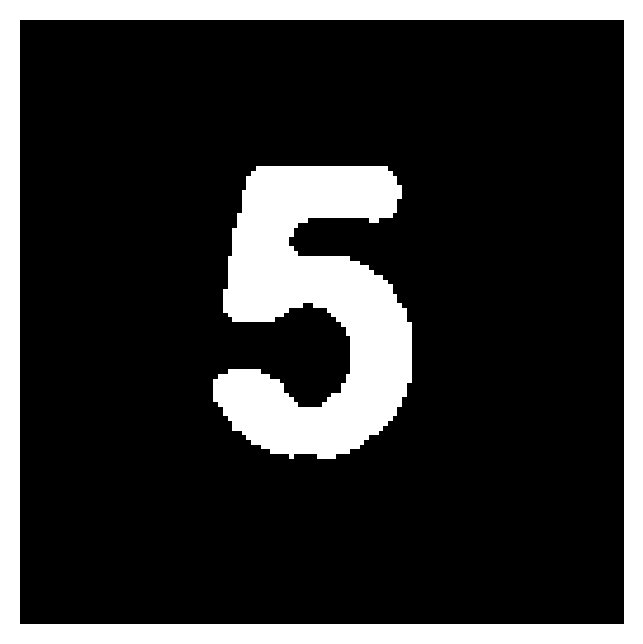

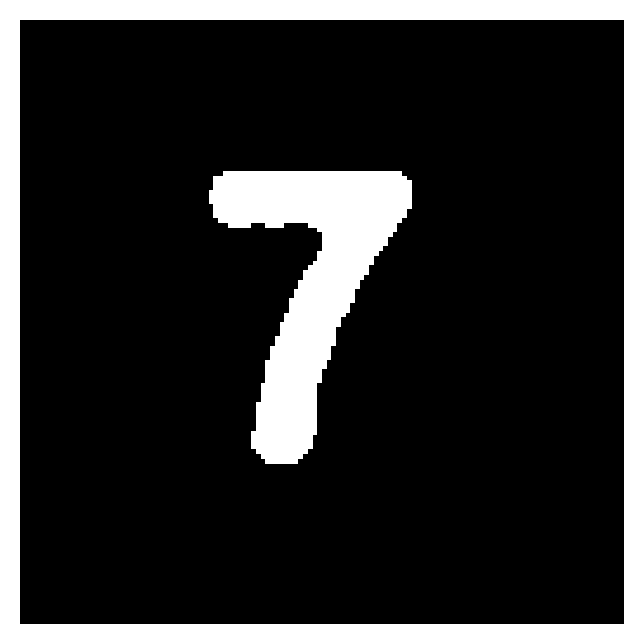

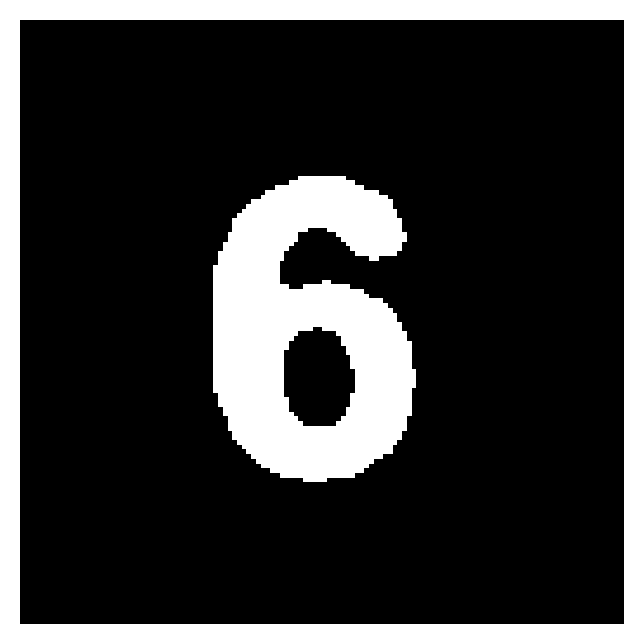

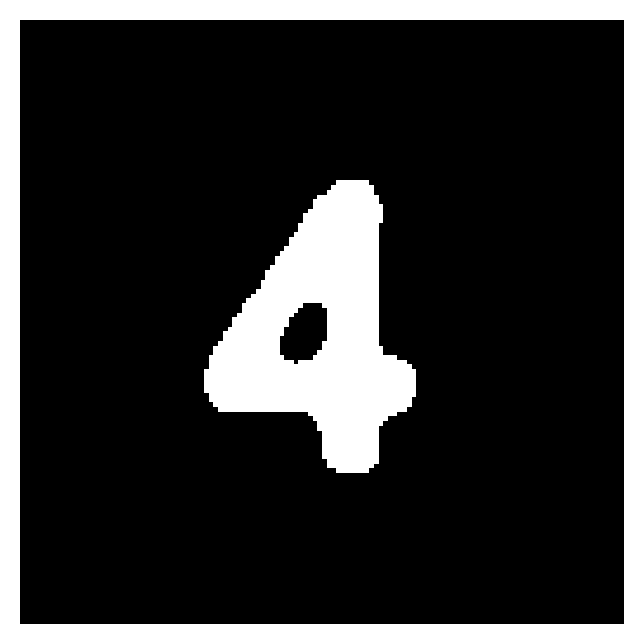

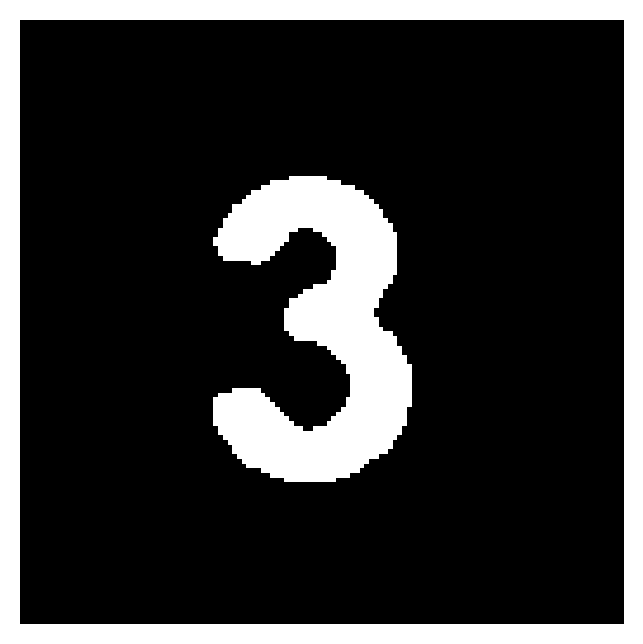

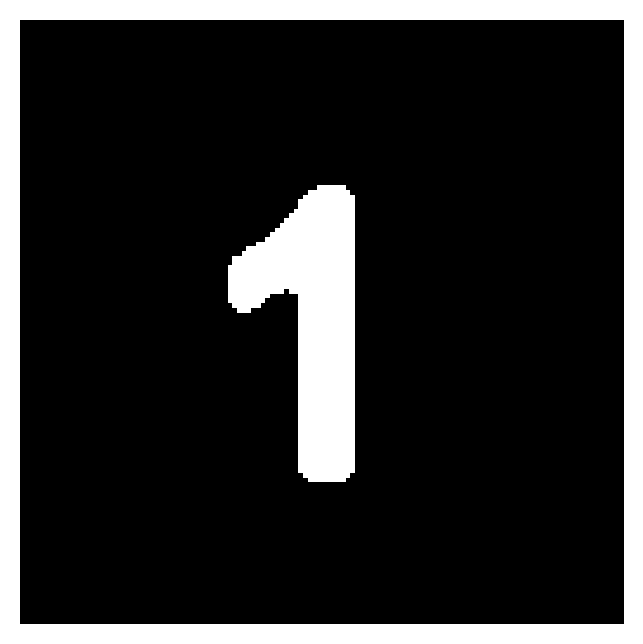

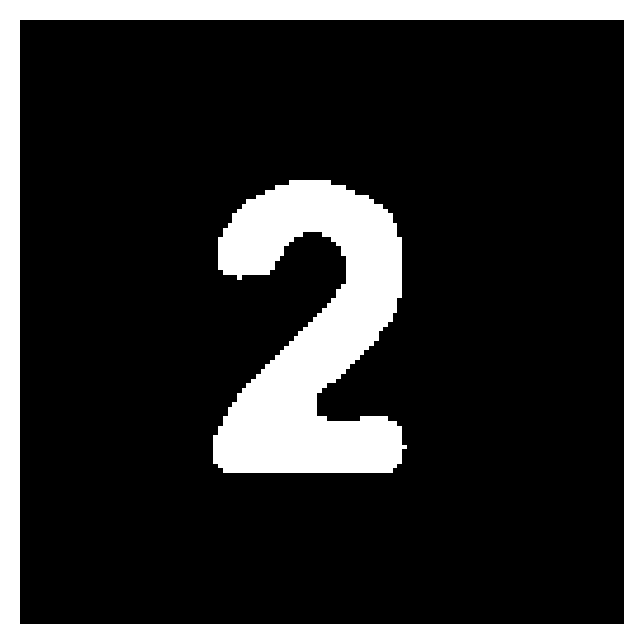

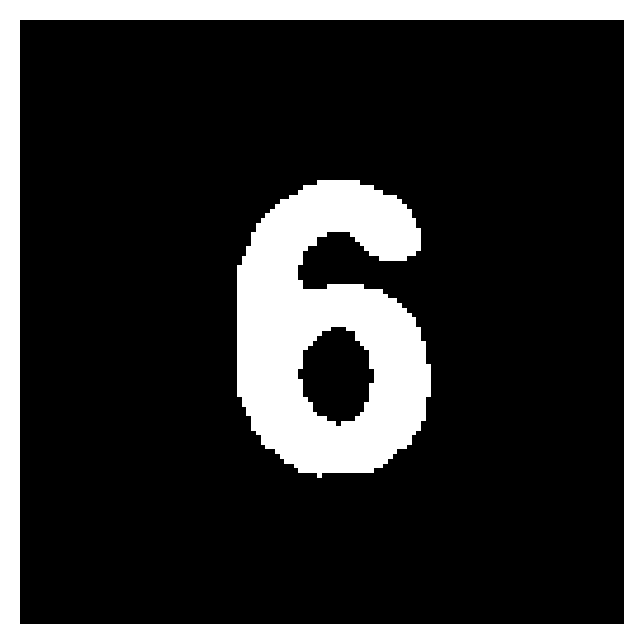

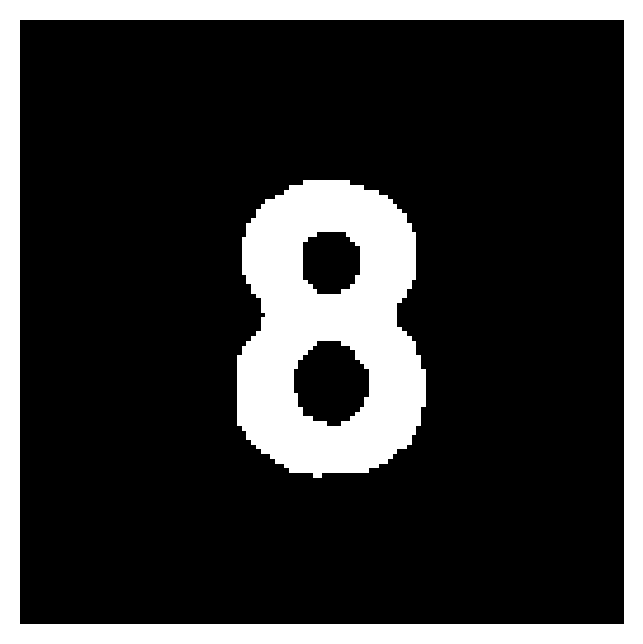

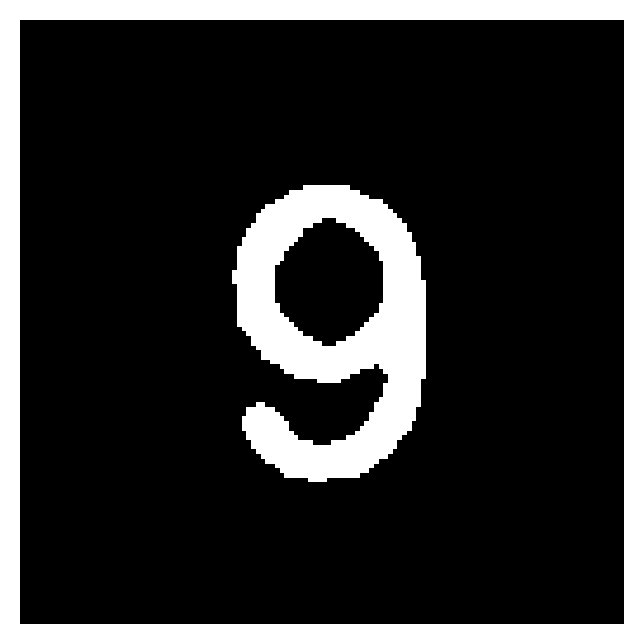

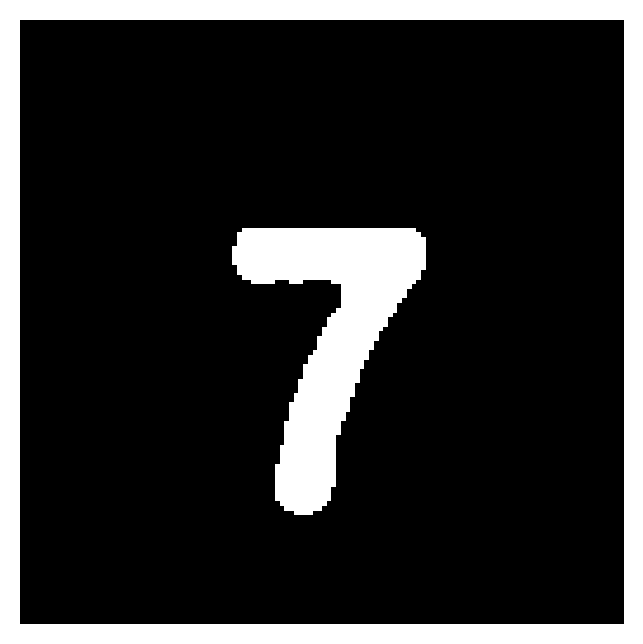

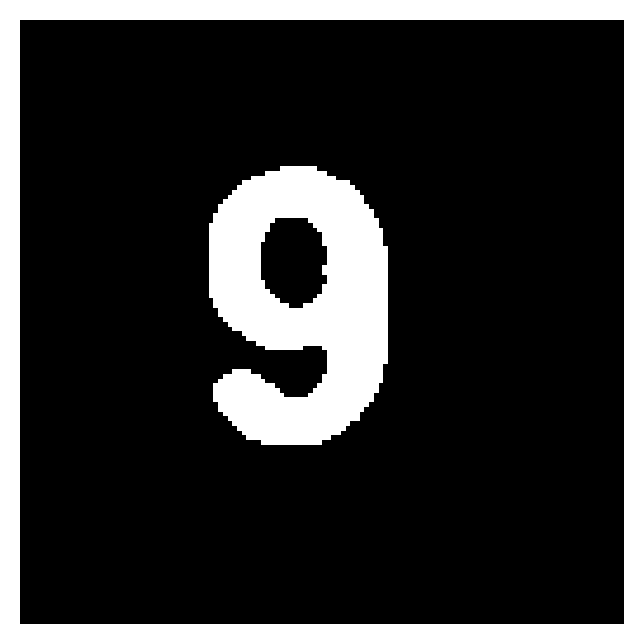

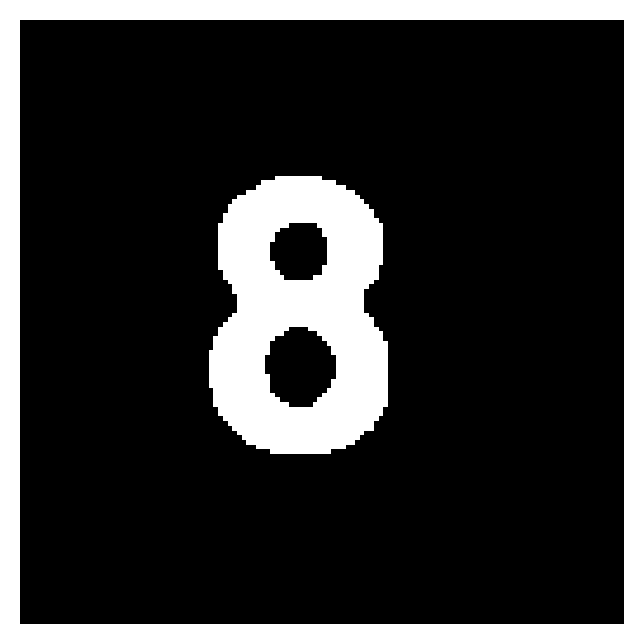

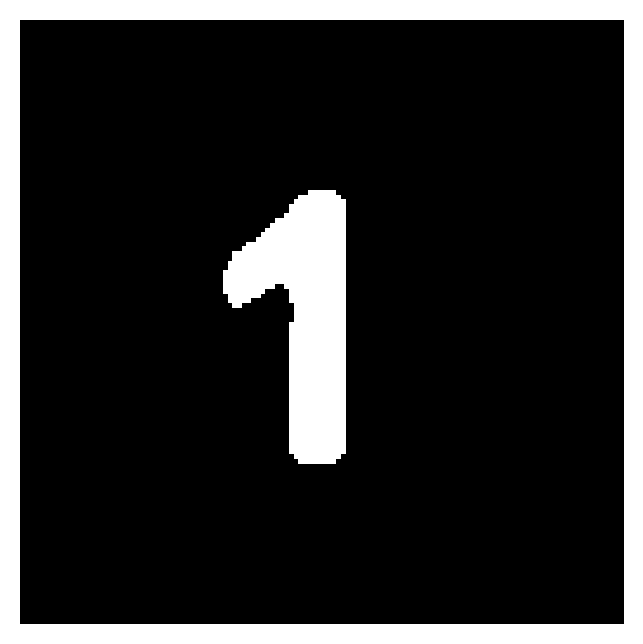

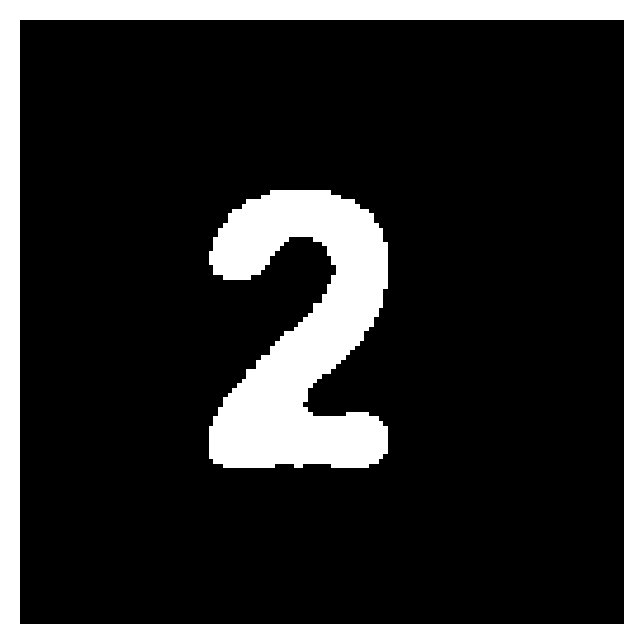

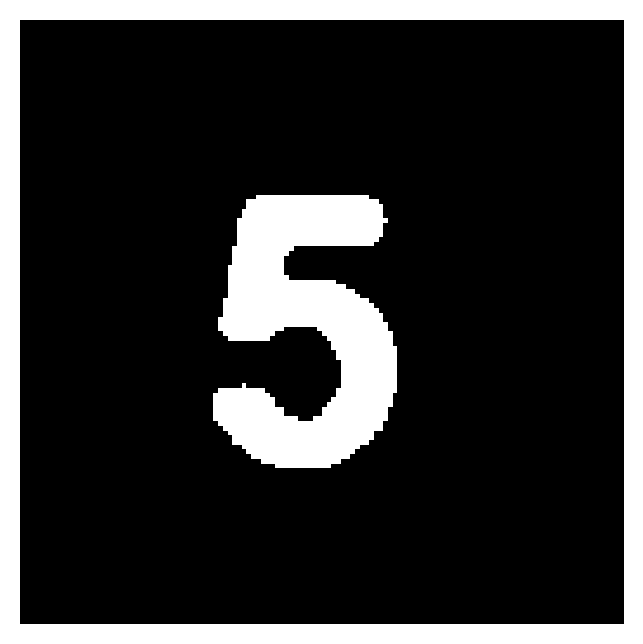

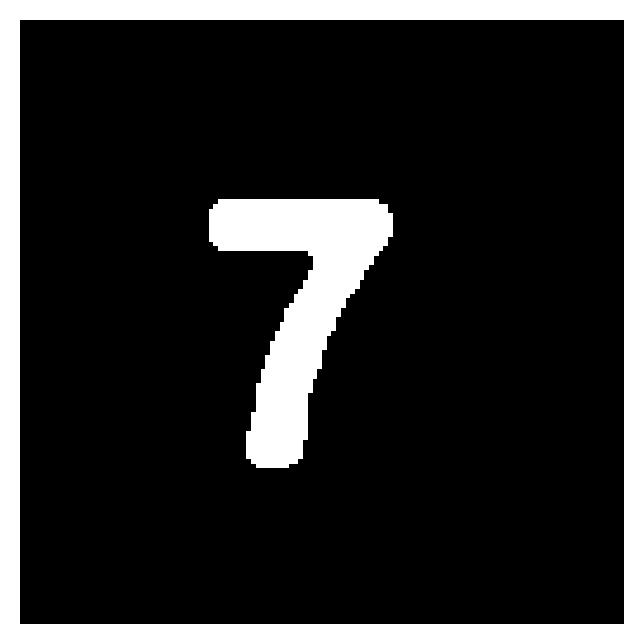

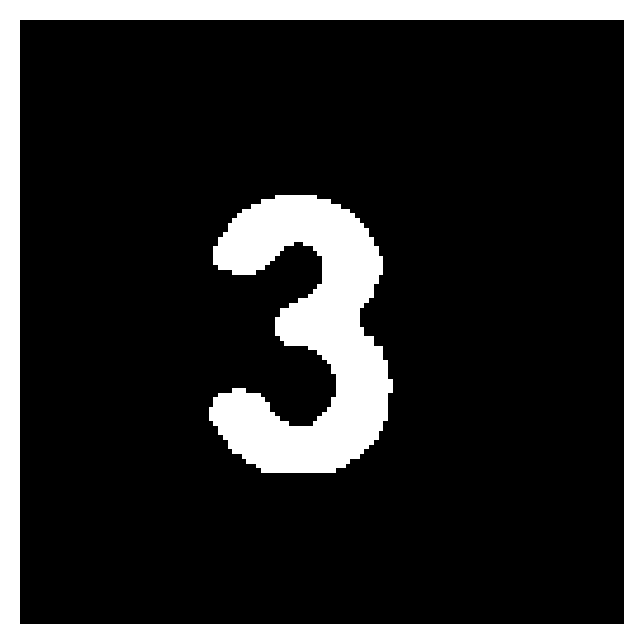

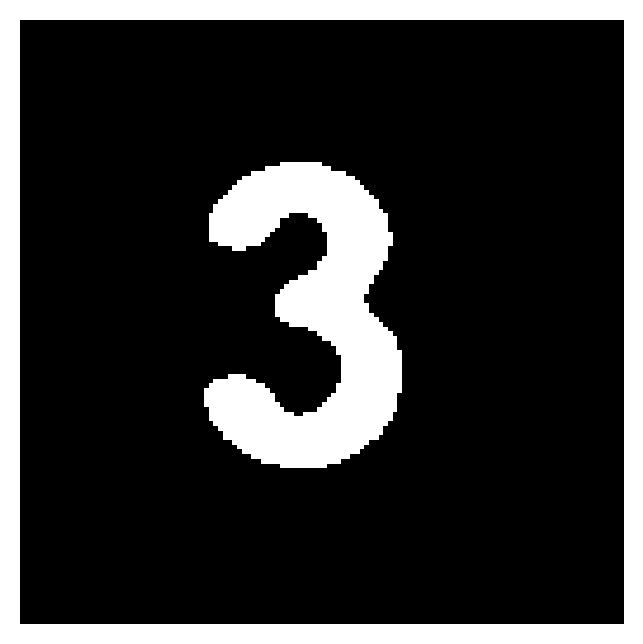

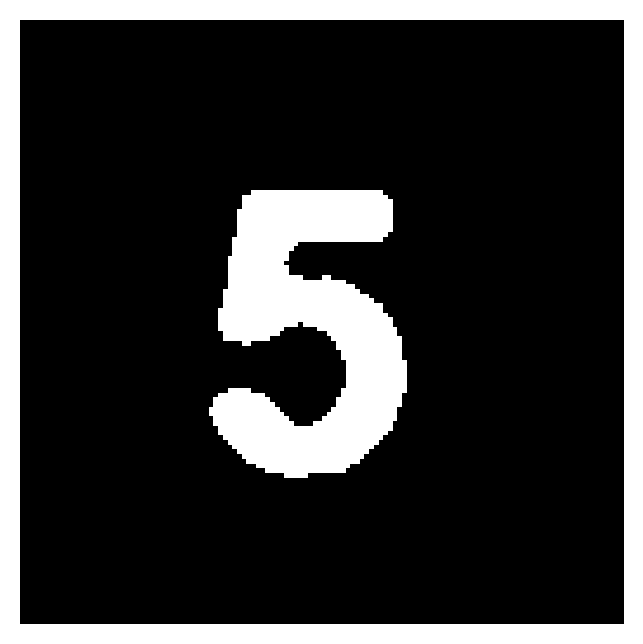

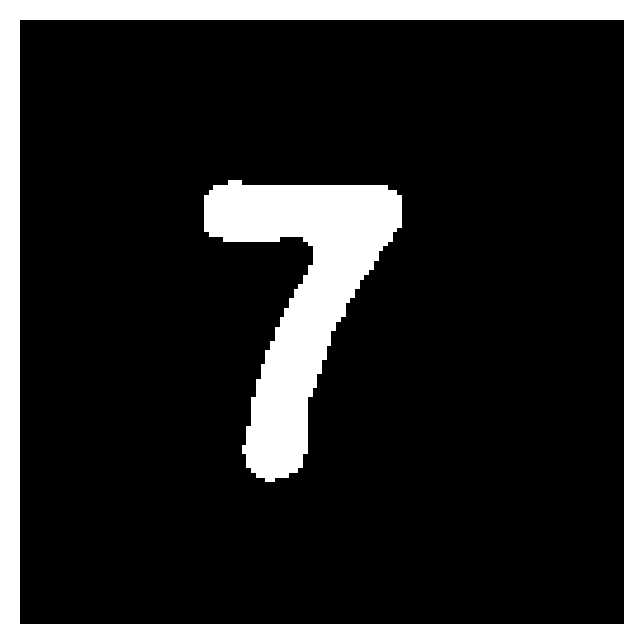

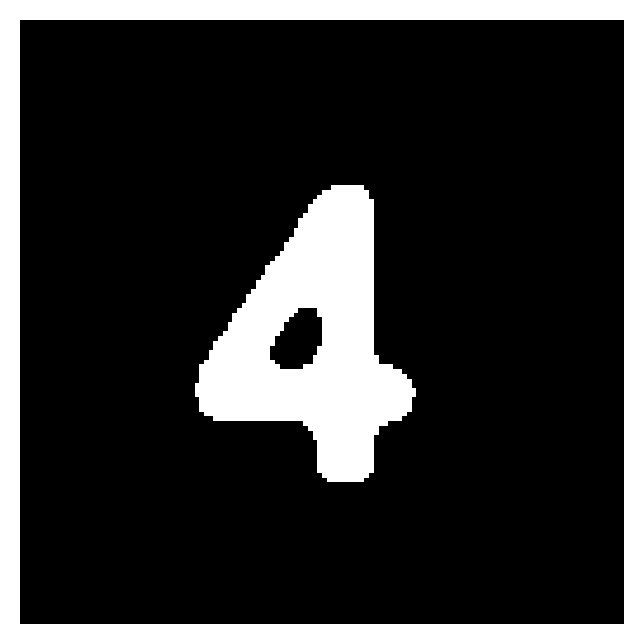

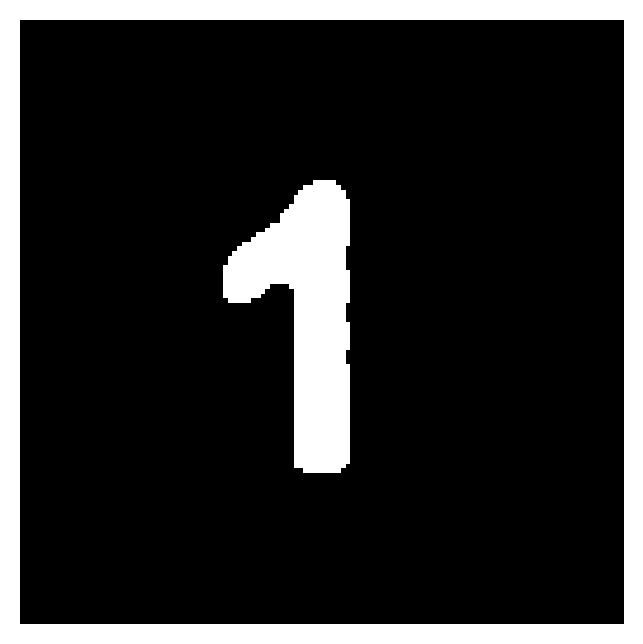

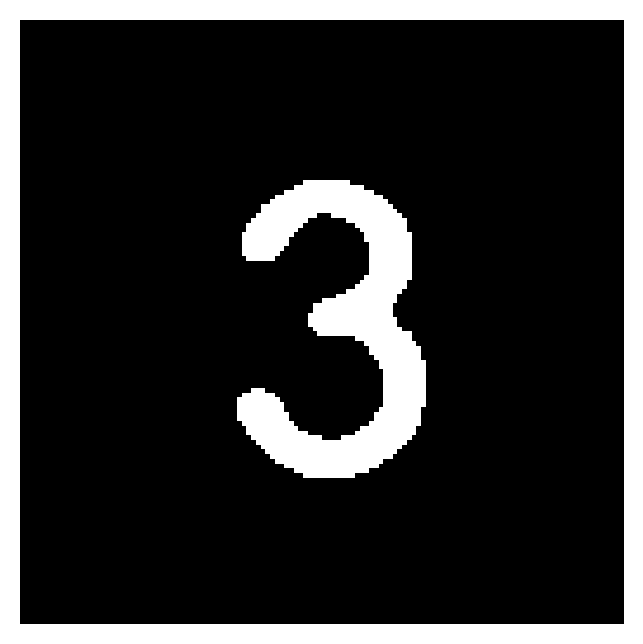

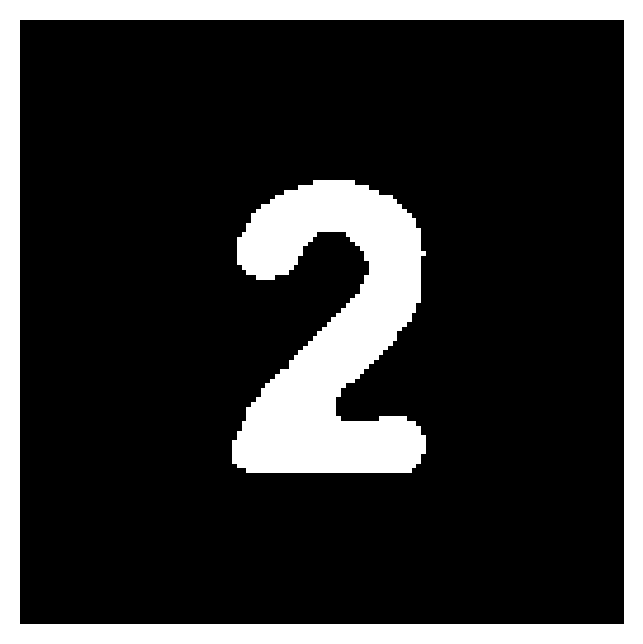

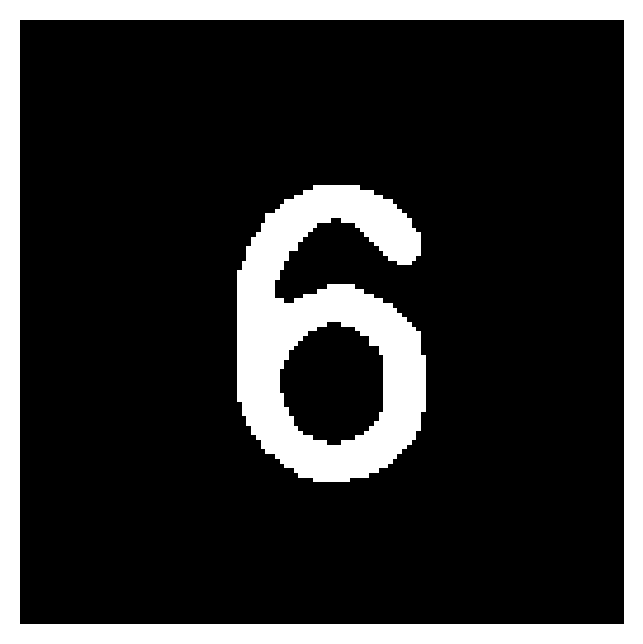

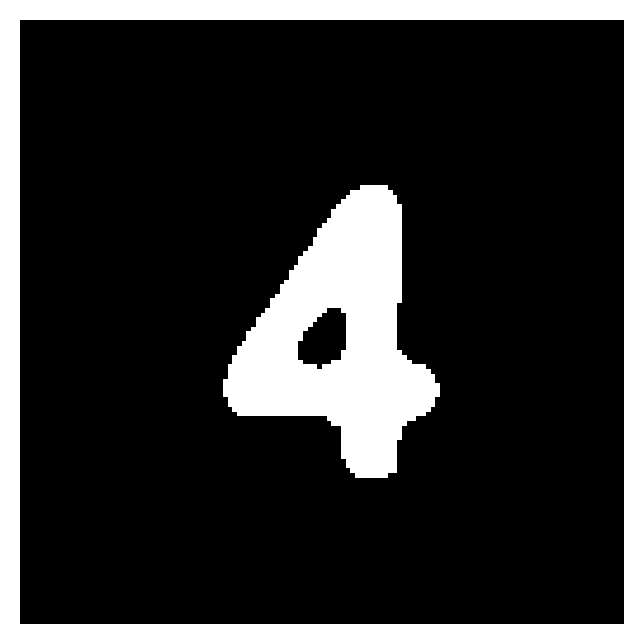

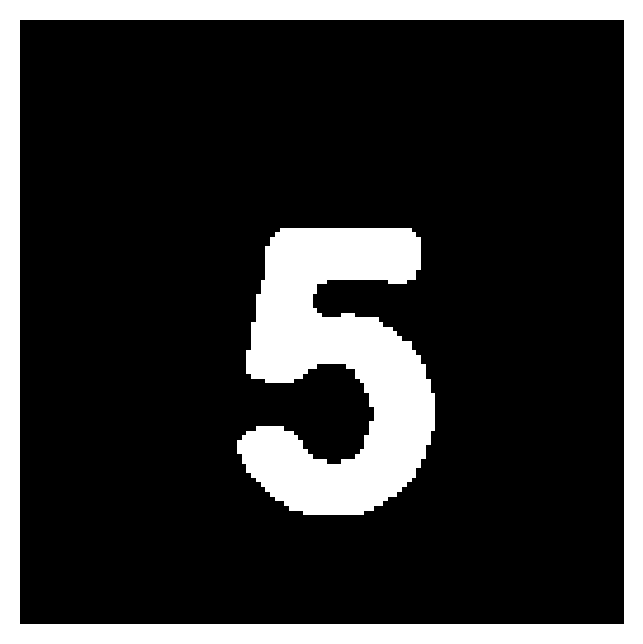

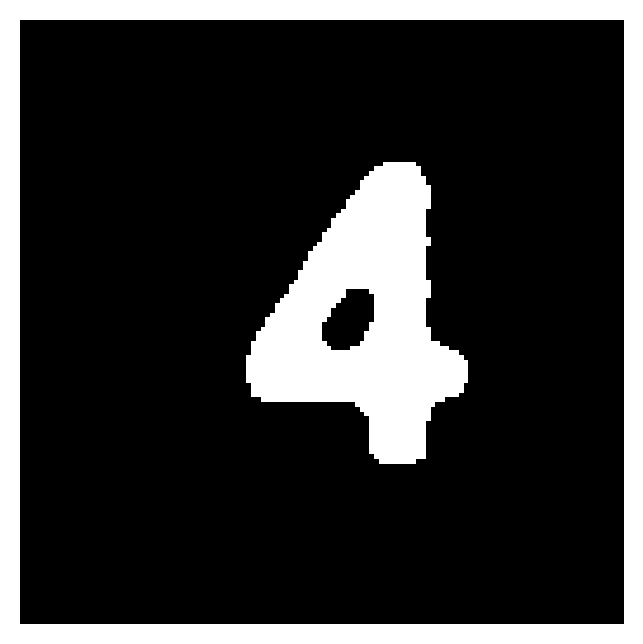

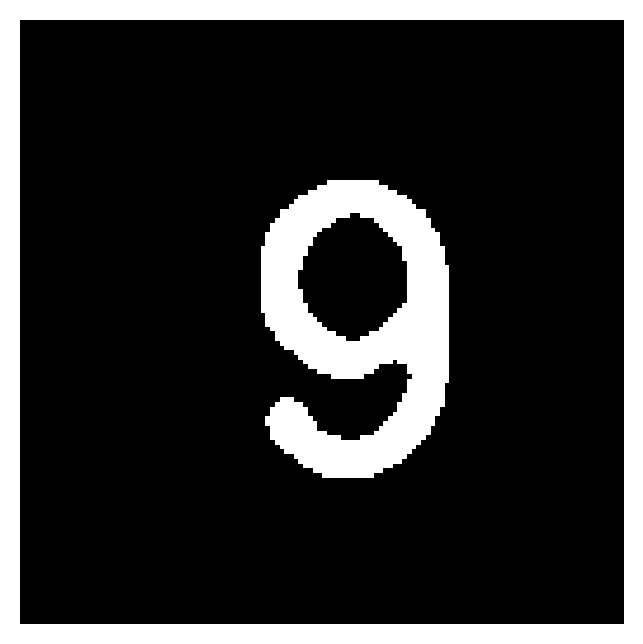

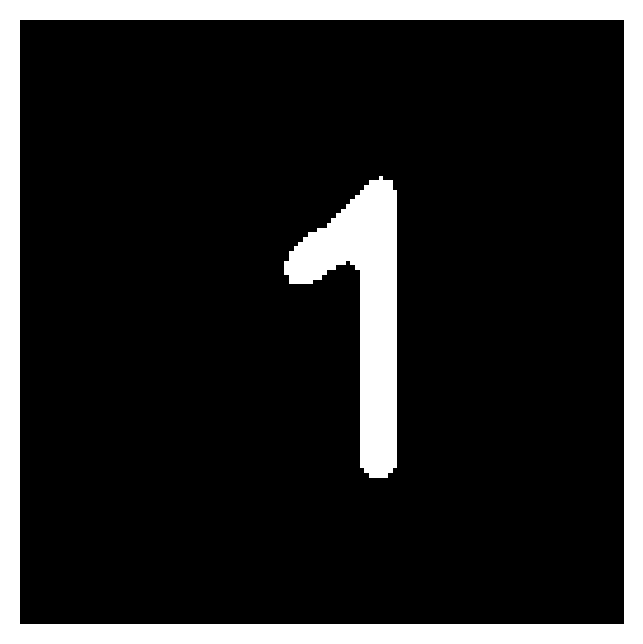

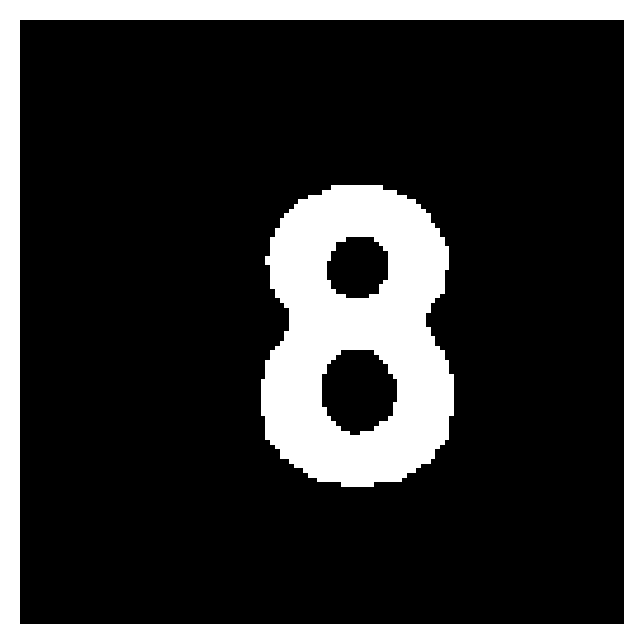

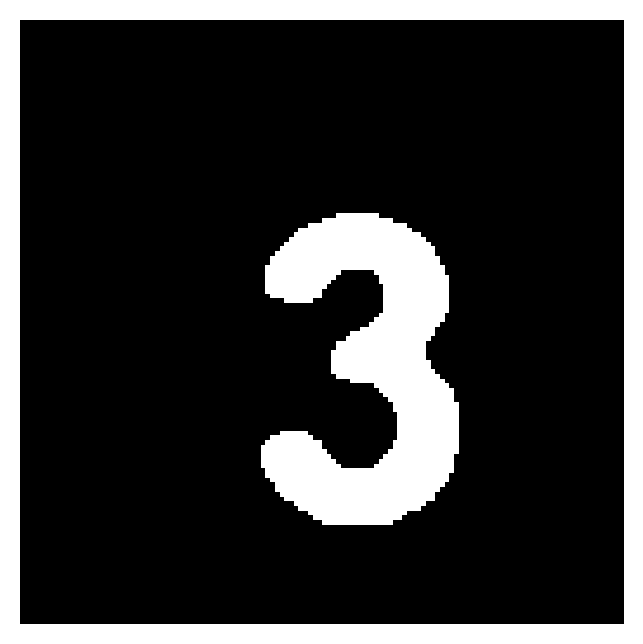

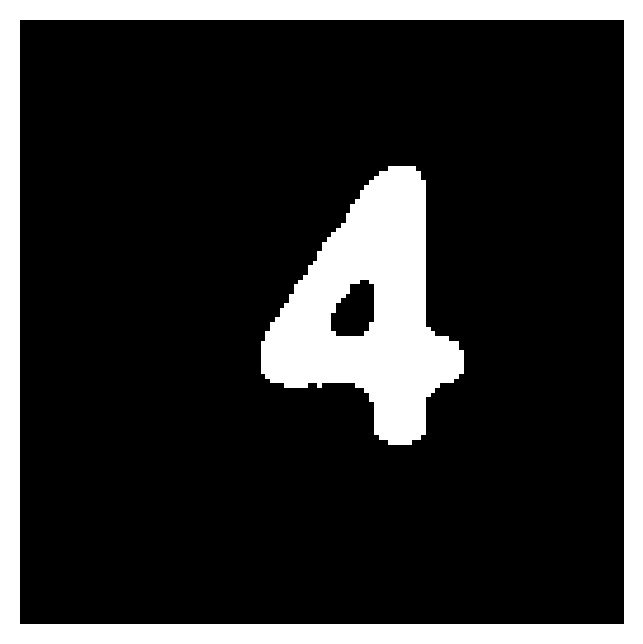

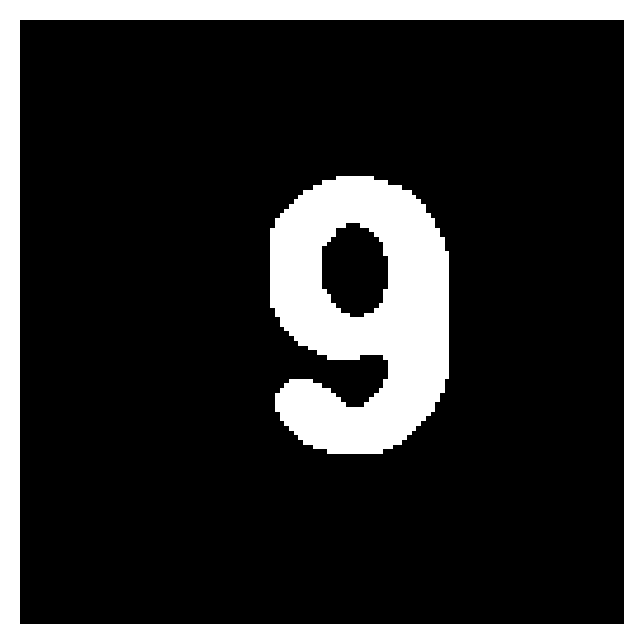

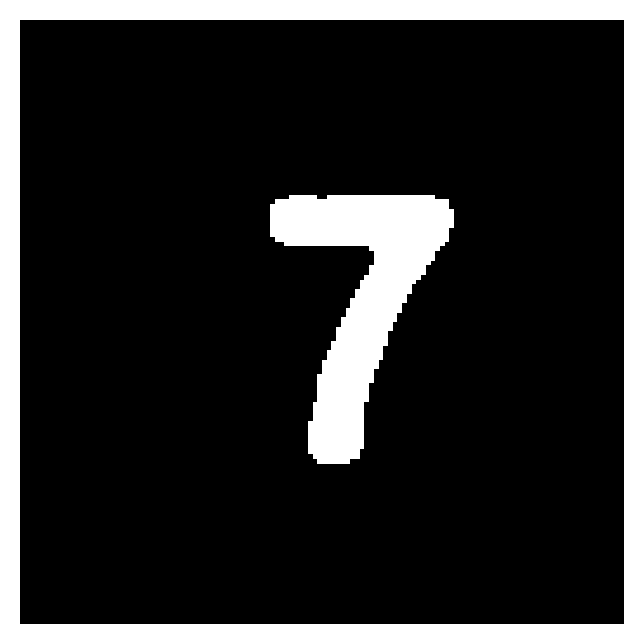

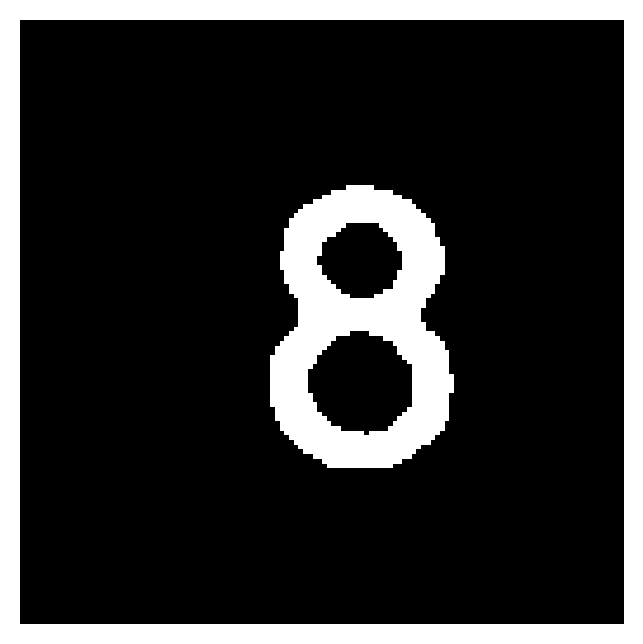

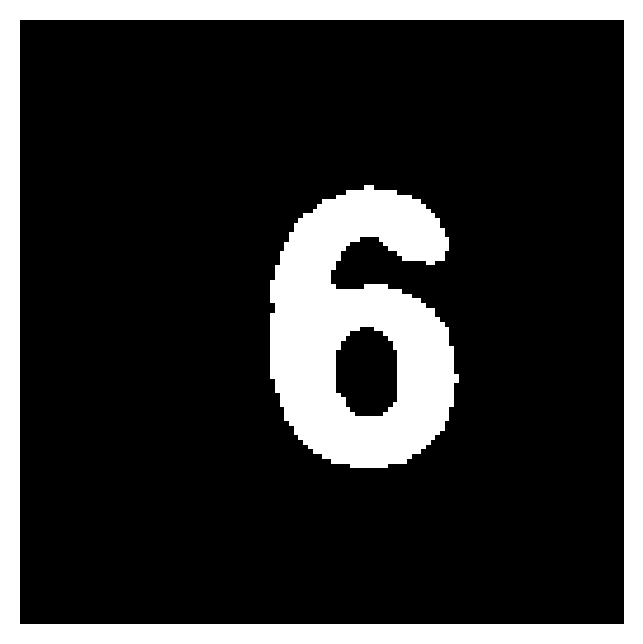

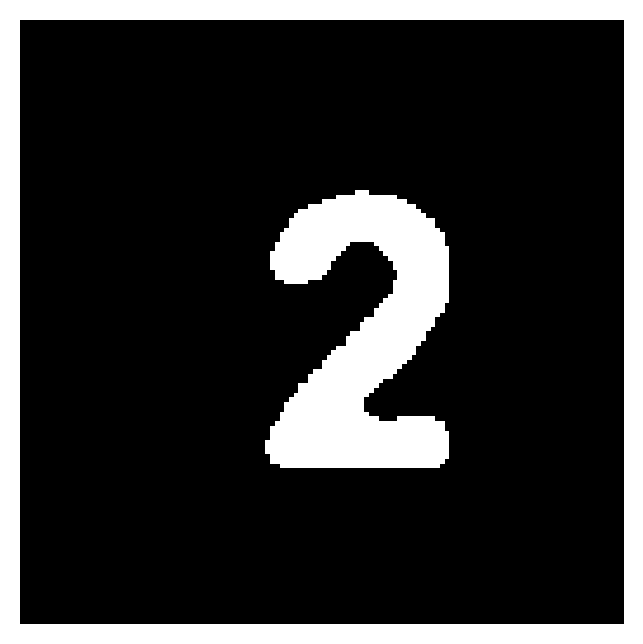

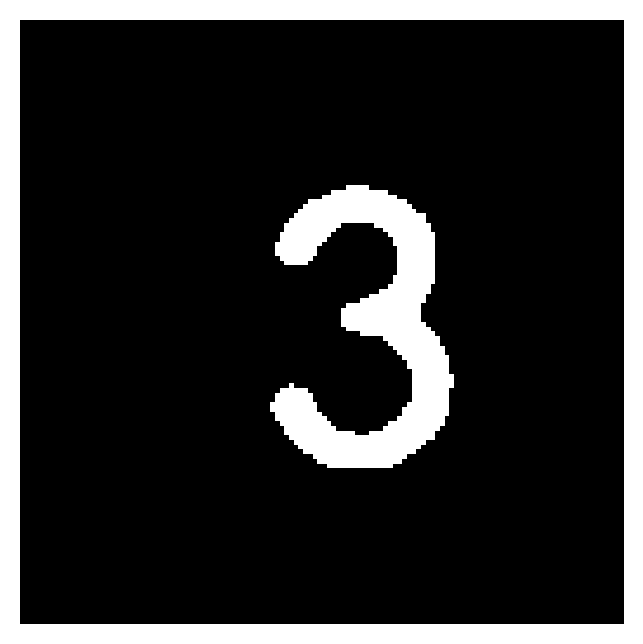

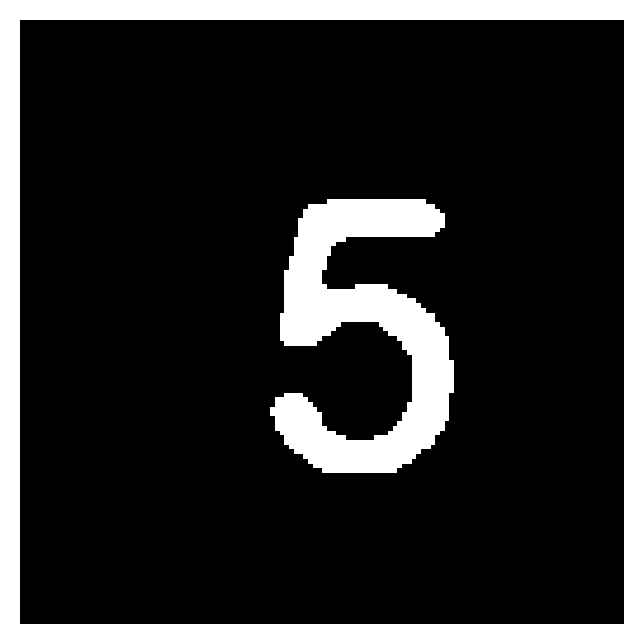

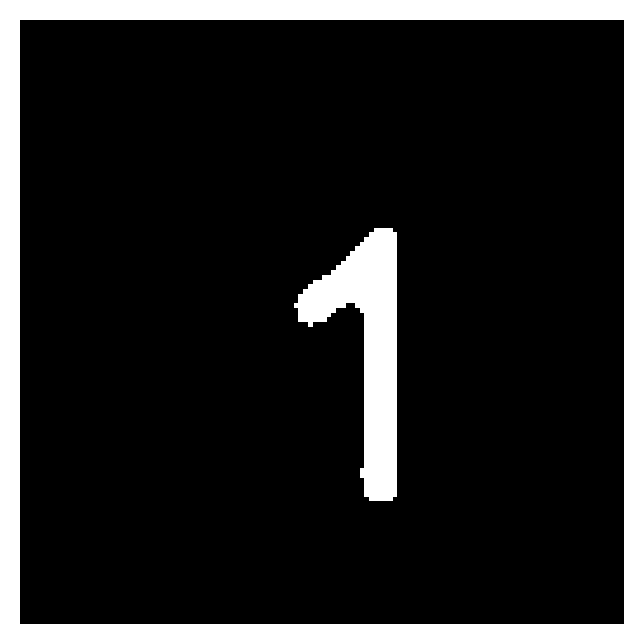

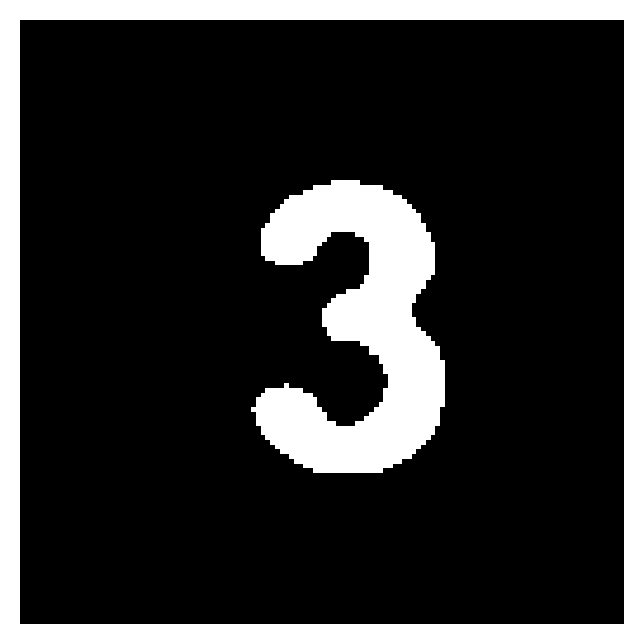

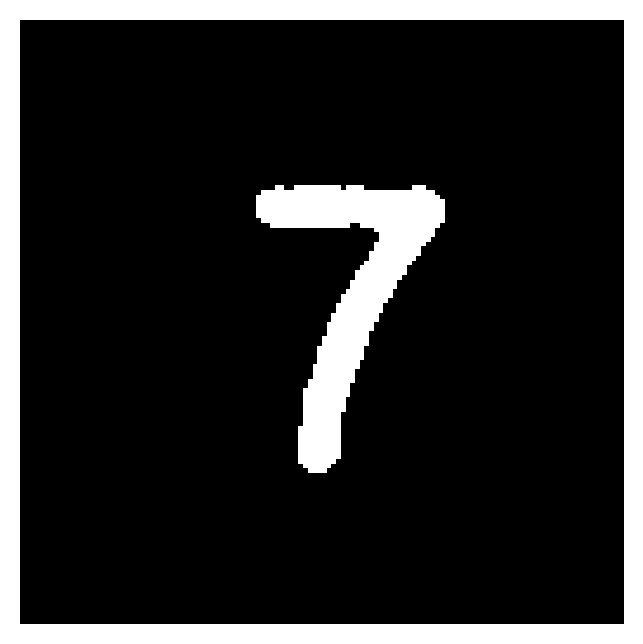

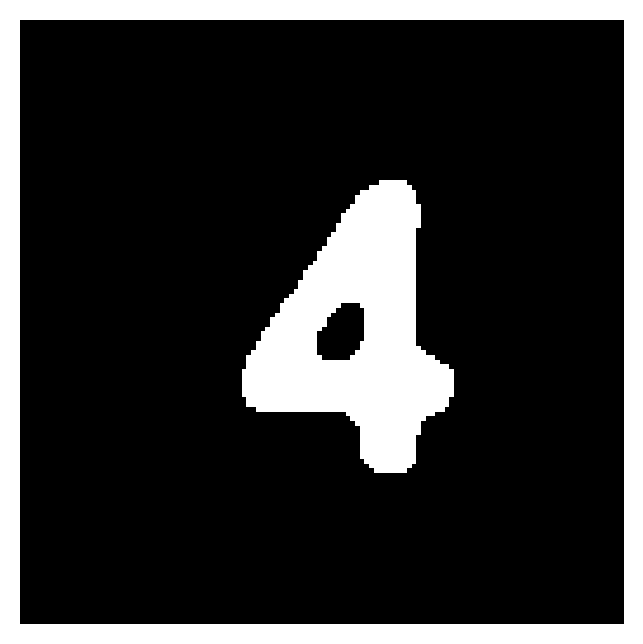

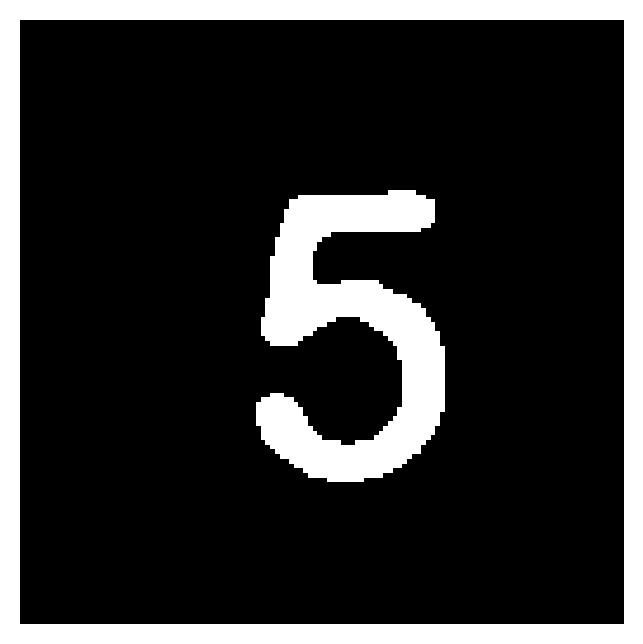

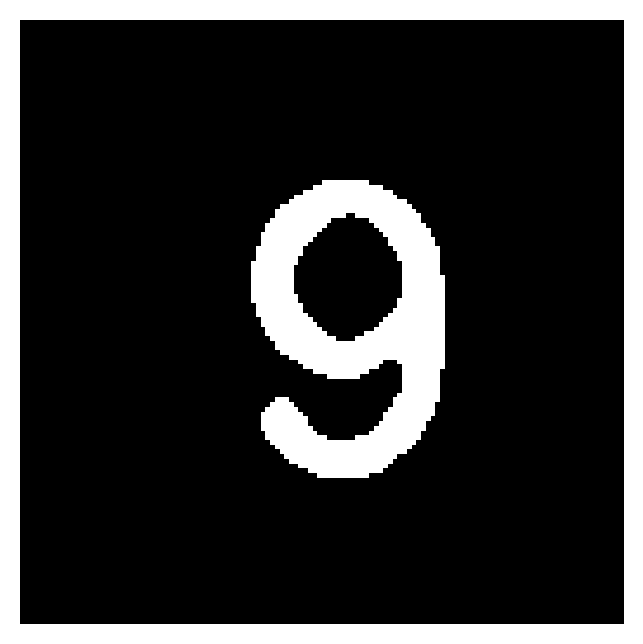

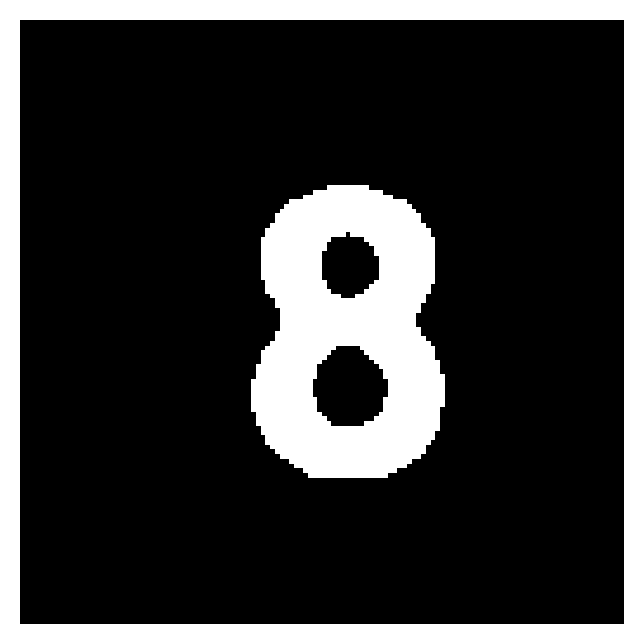

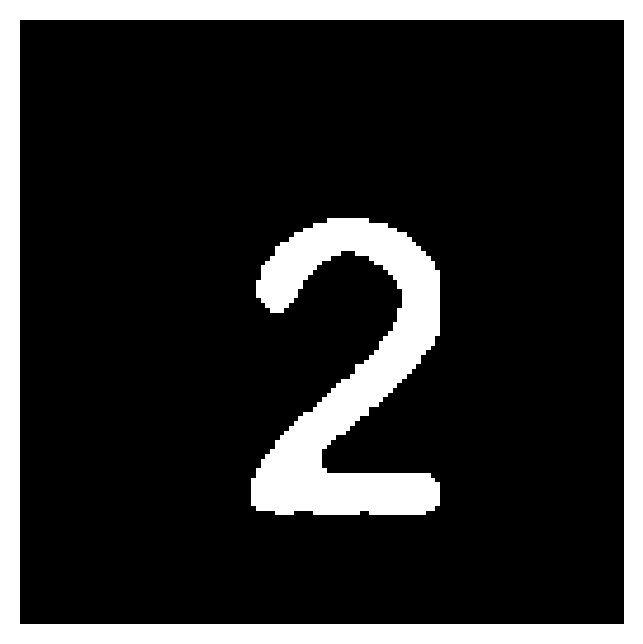

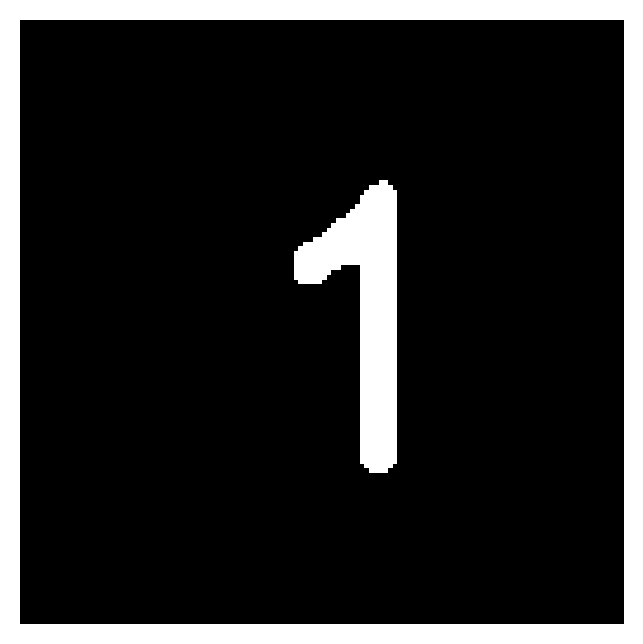

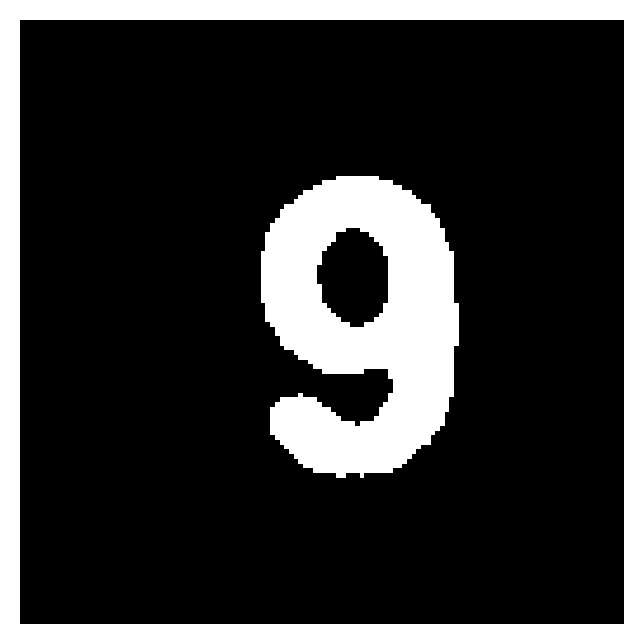

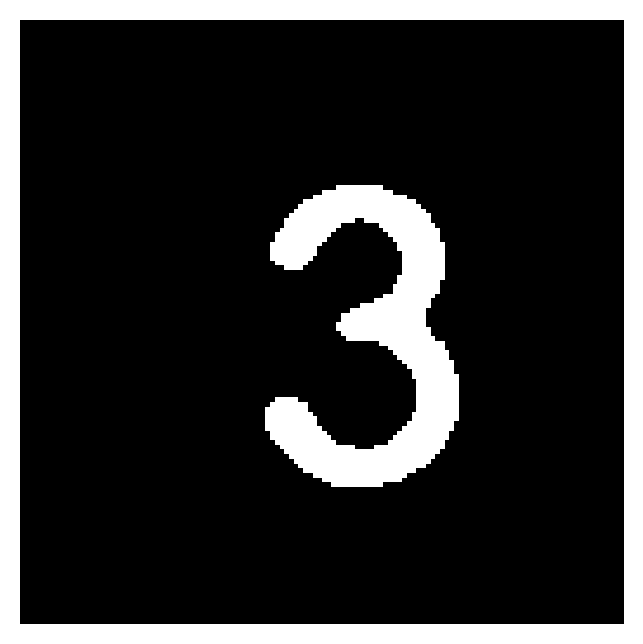

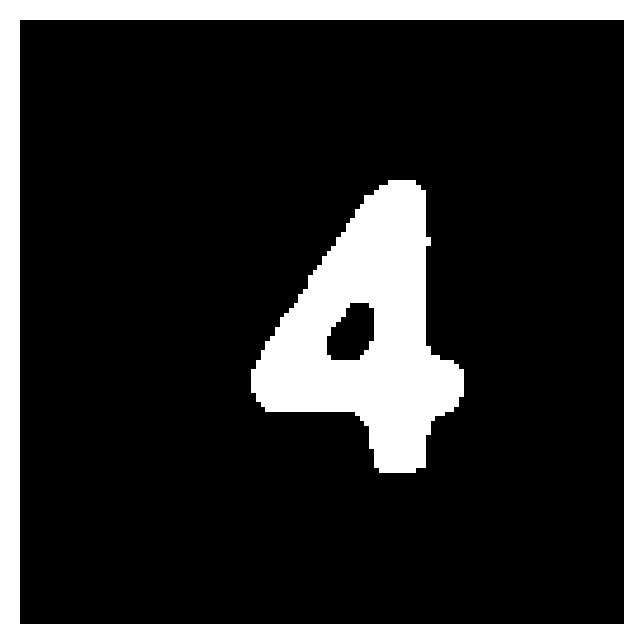

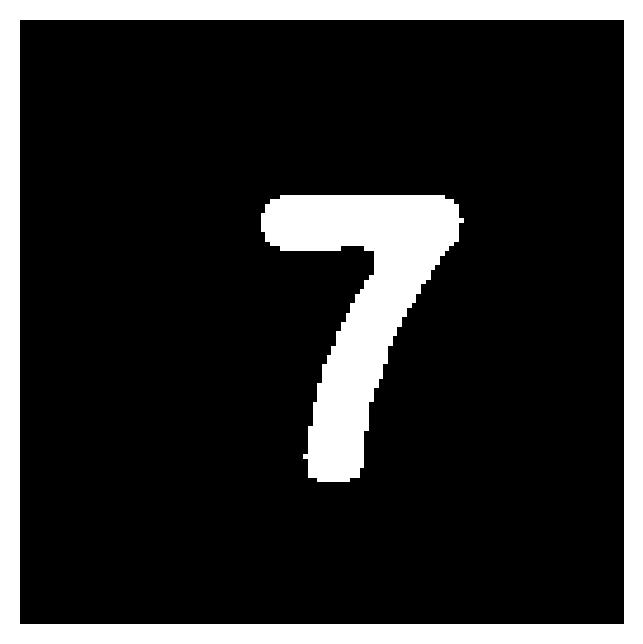

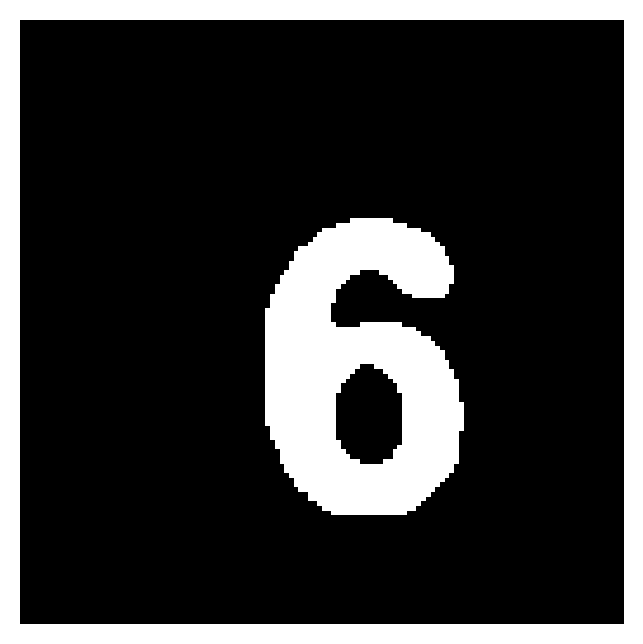

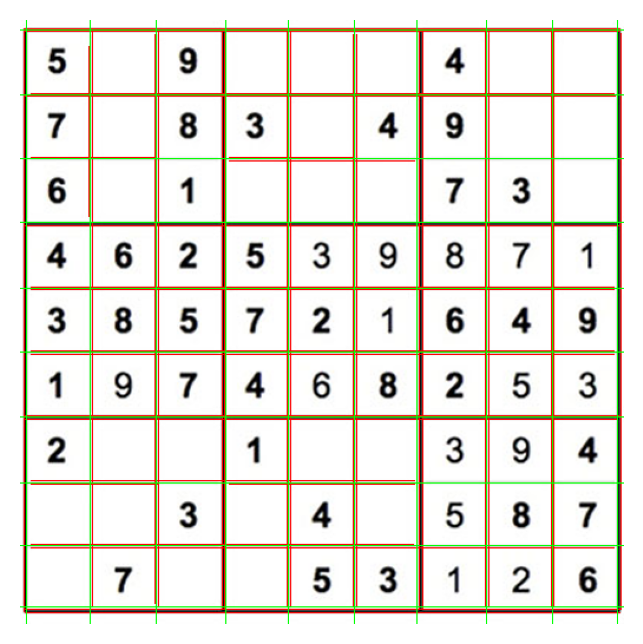

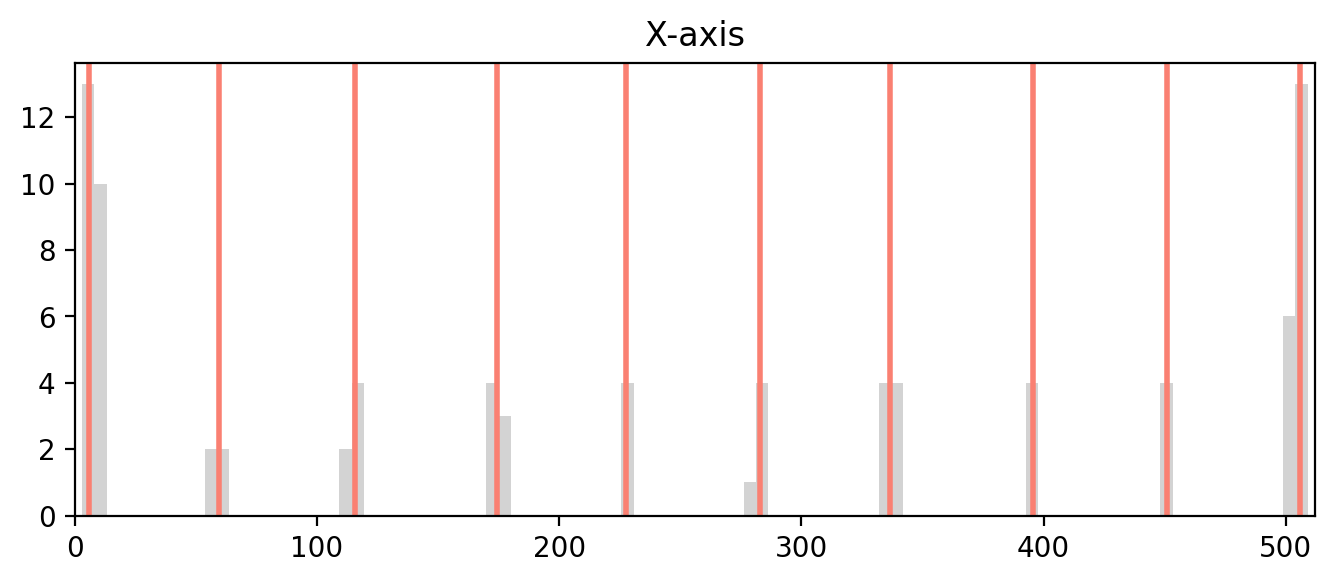

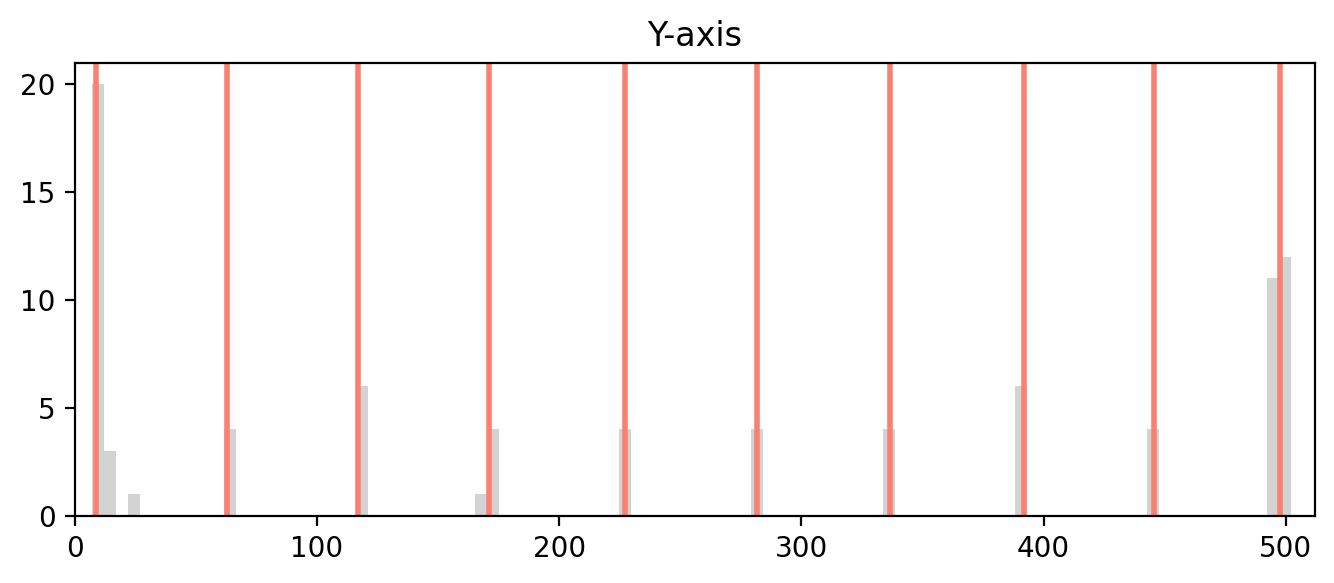

[86.41666666666667, 122.5, 159.5, 197.5, 235.0, 271.5, 309.5, 347.5, 384.5, 420.69565217391306] [74.12, 113.0, 150.5, 187.5, 225.5, 263.5, 300.0, 338.0, 373.0, 412.75]
[(86, 74, 122, 113, 0), (86, 113, 122, 150, 9), (86, 150, 122, 187, 18), (86, 187, 122, 225, 27), (86, 225, 122, 263, 36), (86, 263, 122, 300, 45), (86, 300, 122, 338, 54), (86, 338, 122, 373, 63), (86, 373, 122, 412, 72), (122, 74, 159, 113, 1), (122, 113, 159, 150, 10), (122, 150, 159, 187, 19), (122, 187, 159, 225, 28), (122, 225, 159, 263, 37), (122, 263, 159, 300, 46), (122, 300, 159, 338, 55), (122, 338, 159, 373, 64), (122, 373, 159, 412, 73), (159, 74, 197, 113, 2), (159, 113, 197, 150, 11), (159, 150, 197, 187, 20), (159, 187, 197, 225, 29), (159, 225, 197, 263, 38), (159, 263, 197, 300, 47), (159, 300, 197, 338, 56), (159, 338, 197, 373, 65), (159, 373, 197, 412, 74), (197, 74, 235, 113, 3), (197, 113, 235, 150, 12), (197, 150, 235, 187, 21), (197, 187, 235, 225, 30), (197, 225, 235, 263, 39), (197, 263, 235, 3

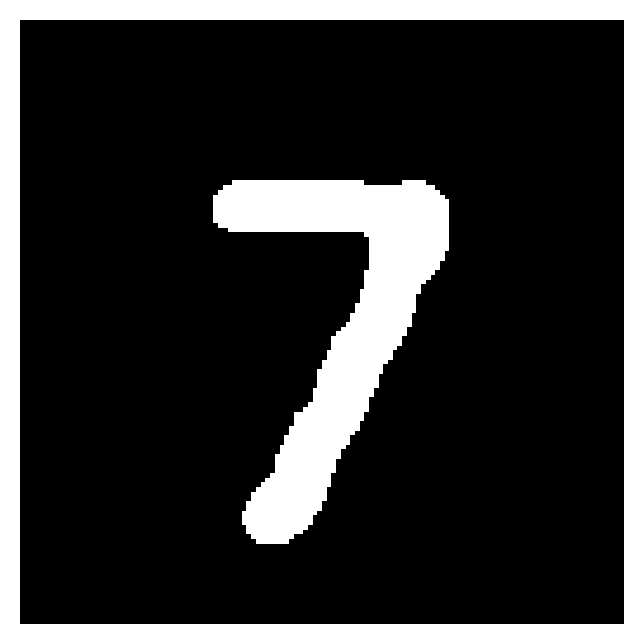

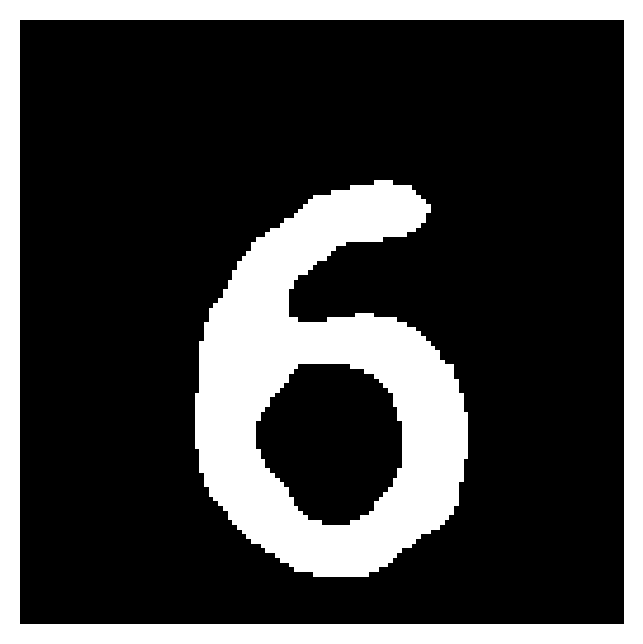

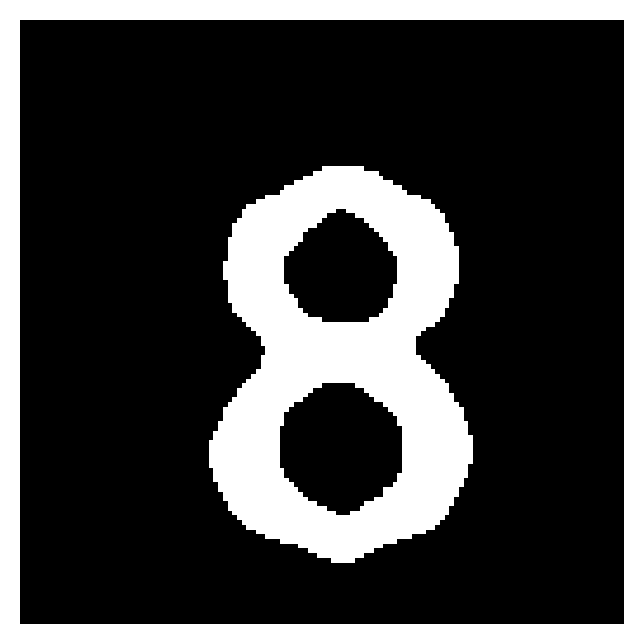

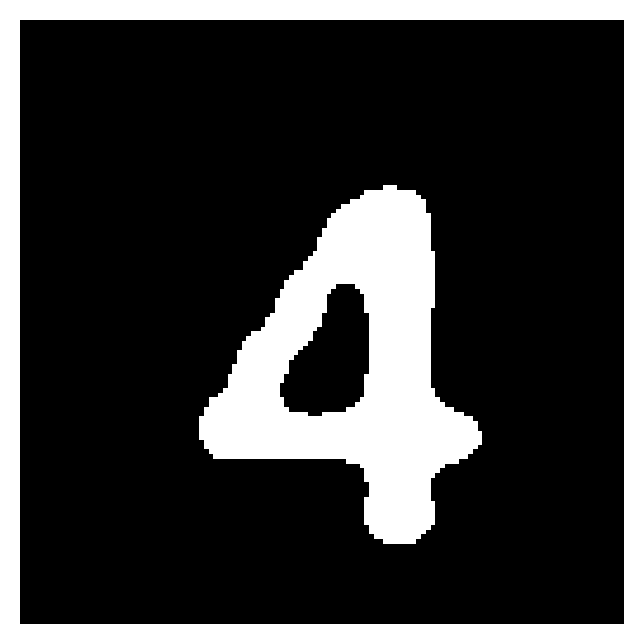

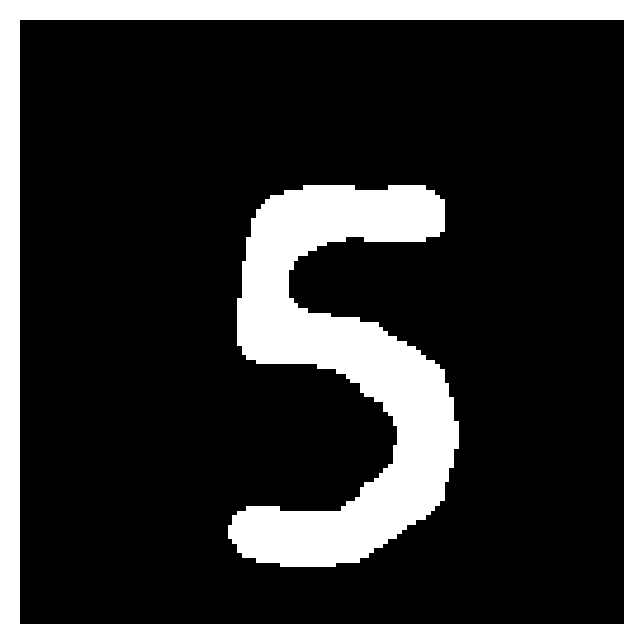

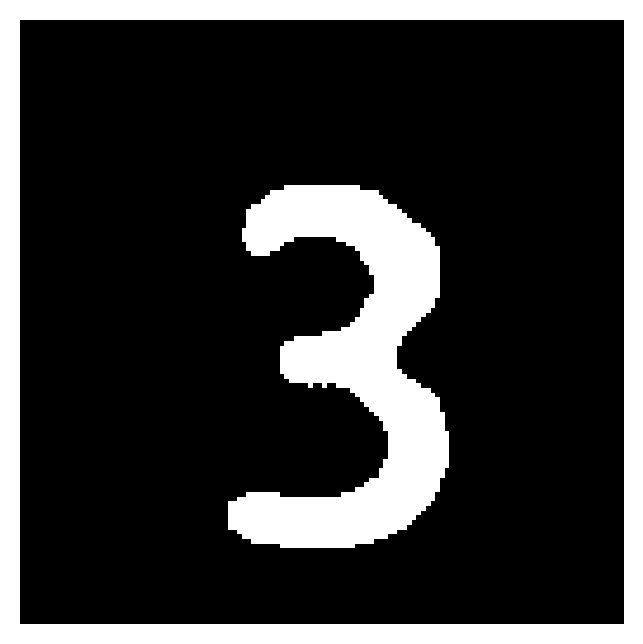

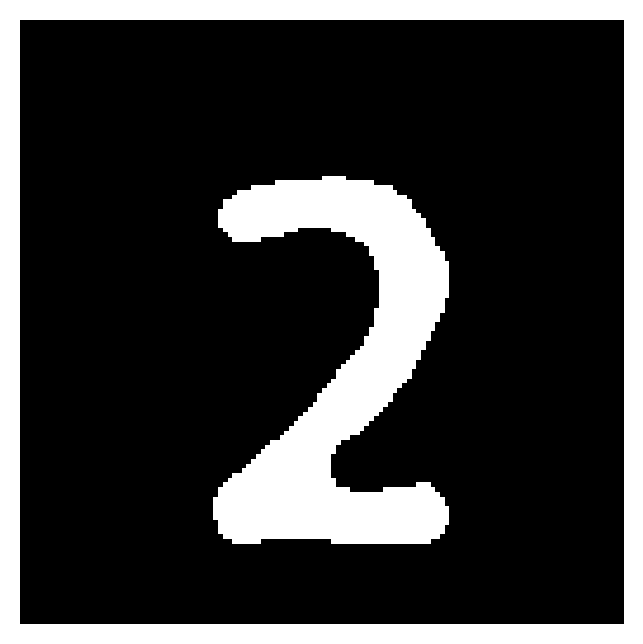

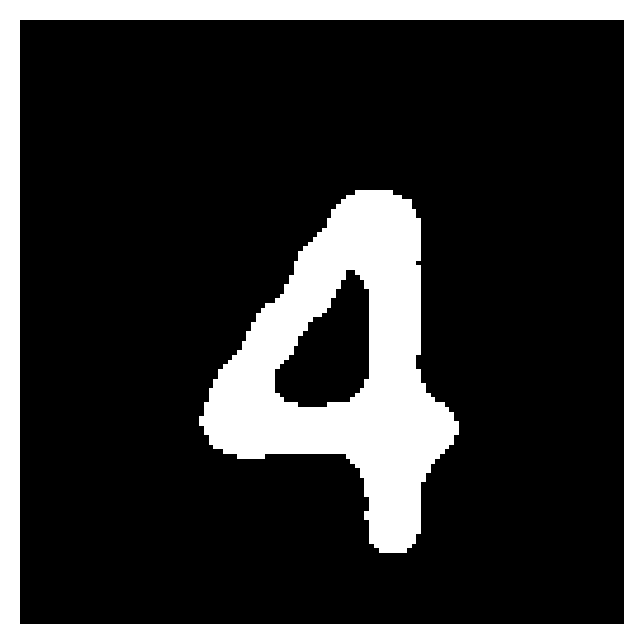

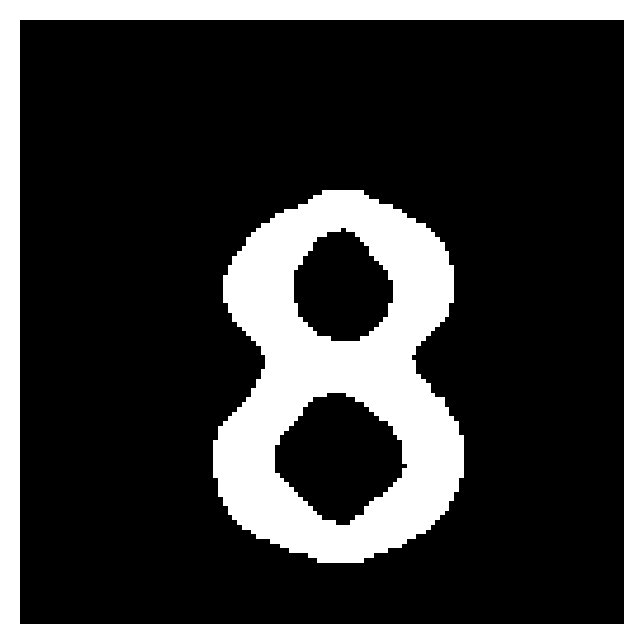

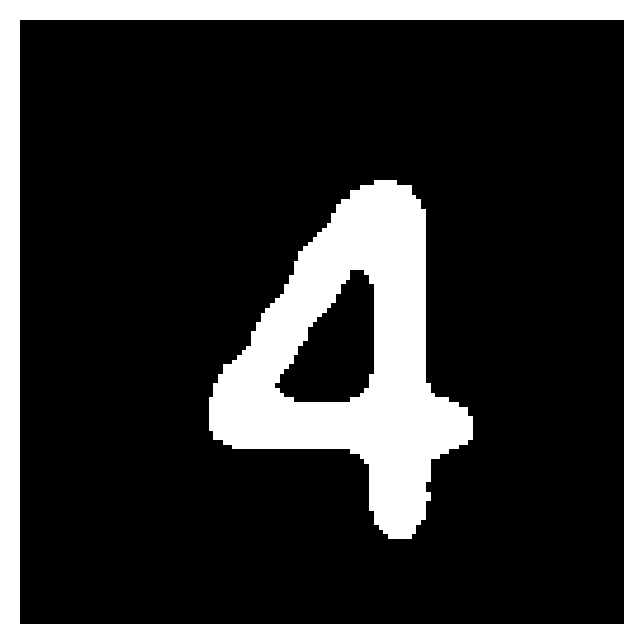

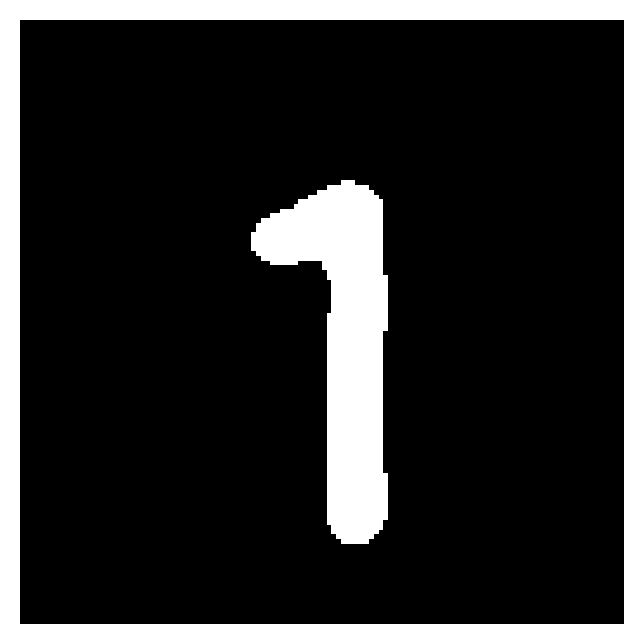

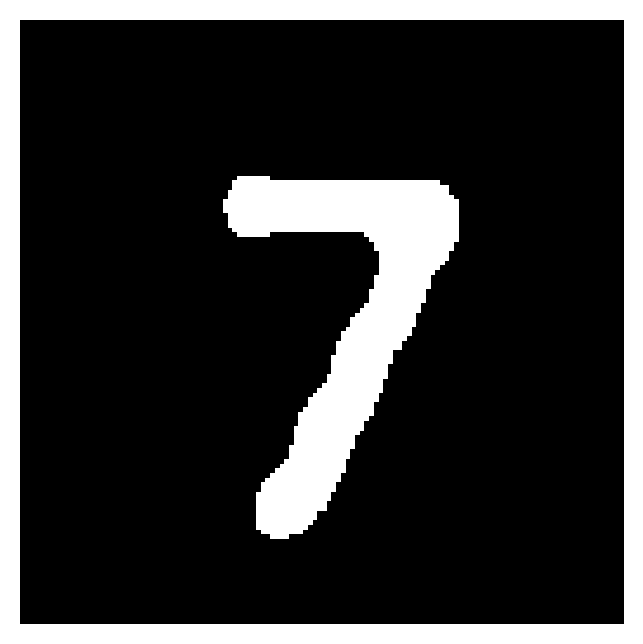

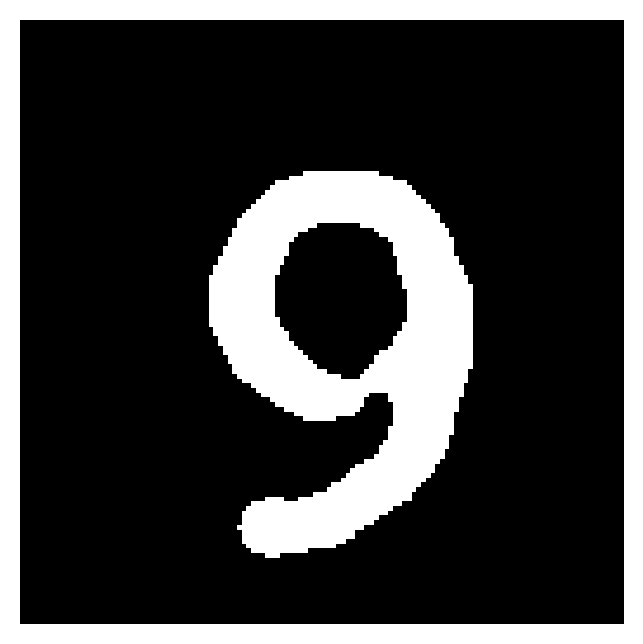

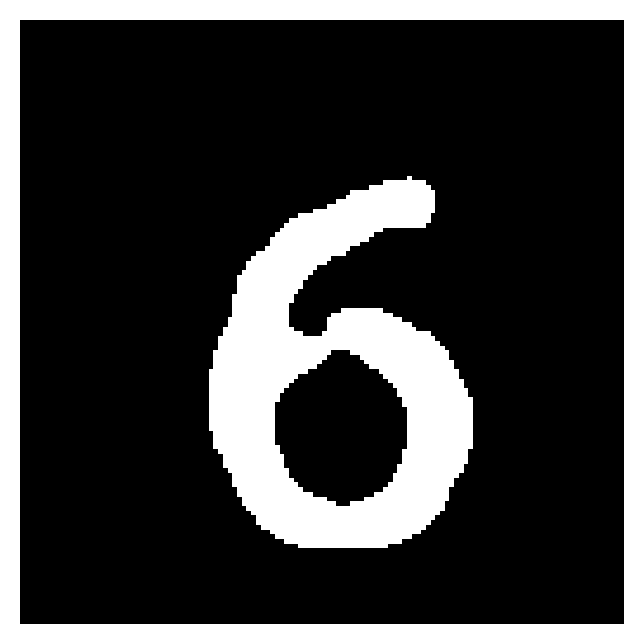

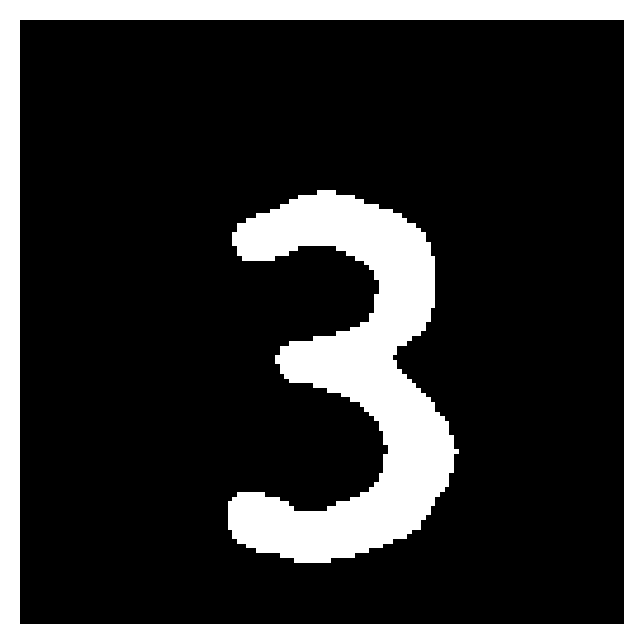

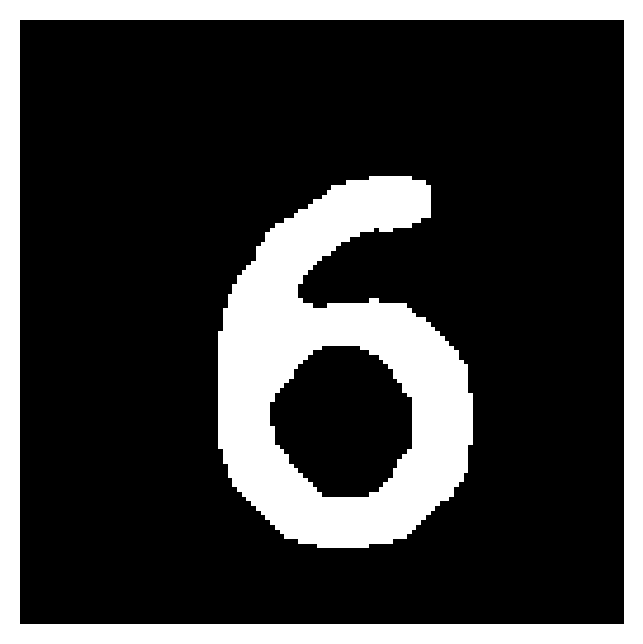

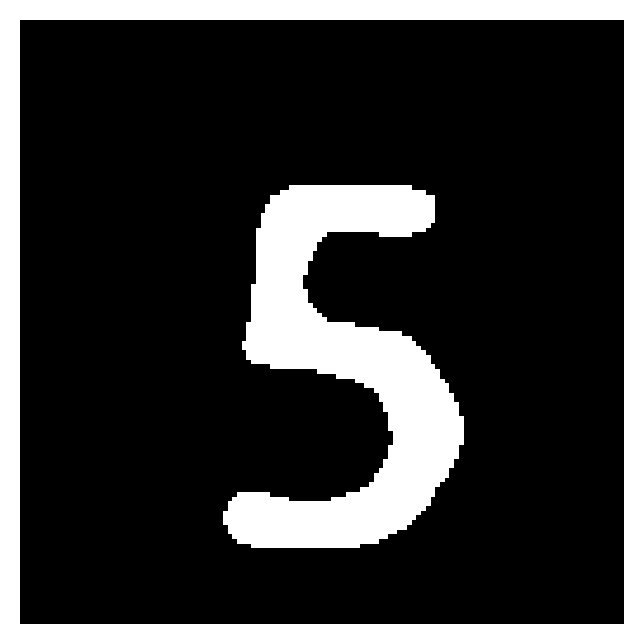

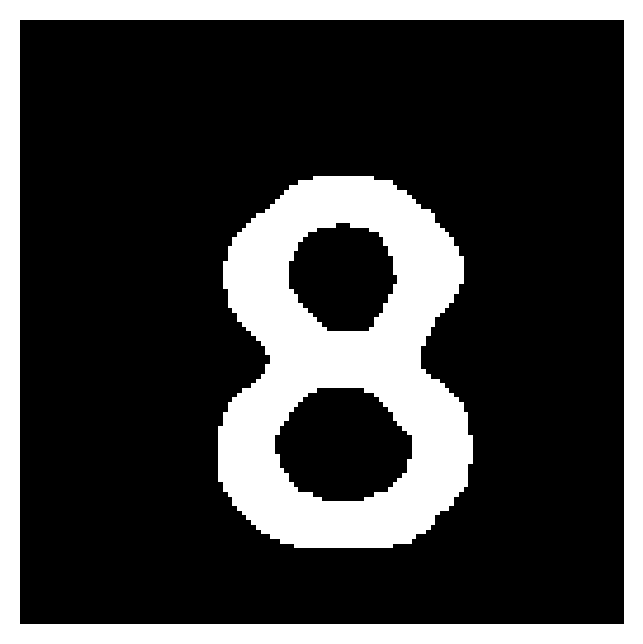

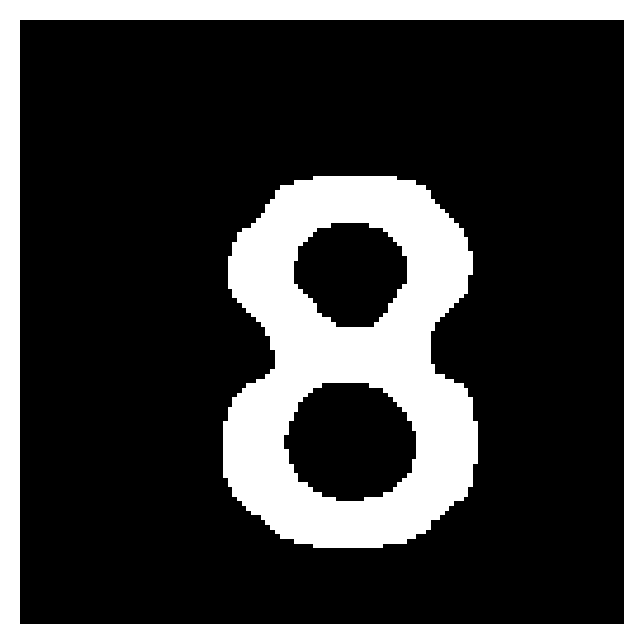

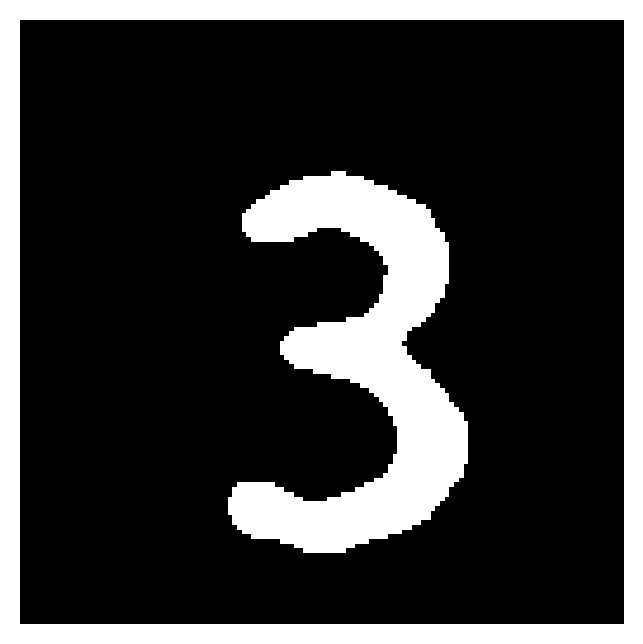

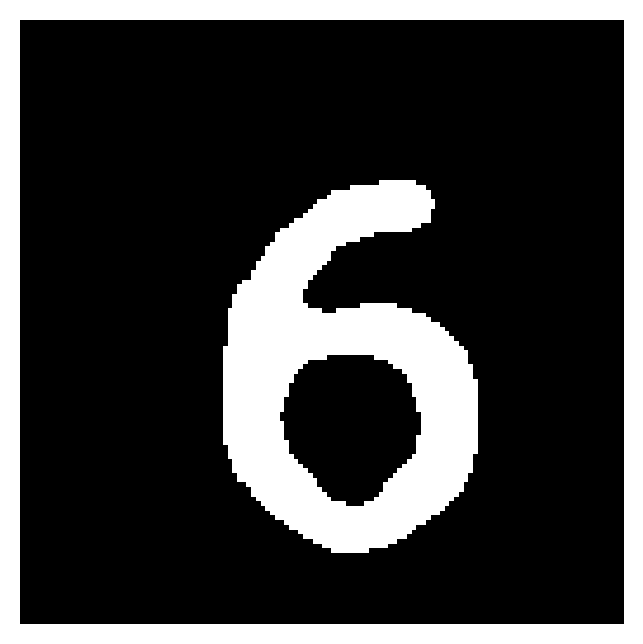

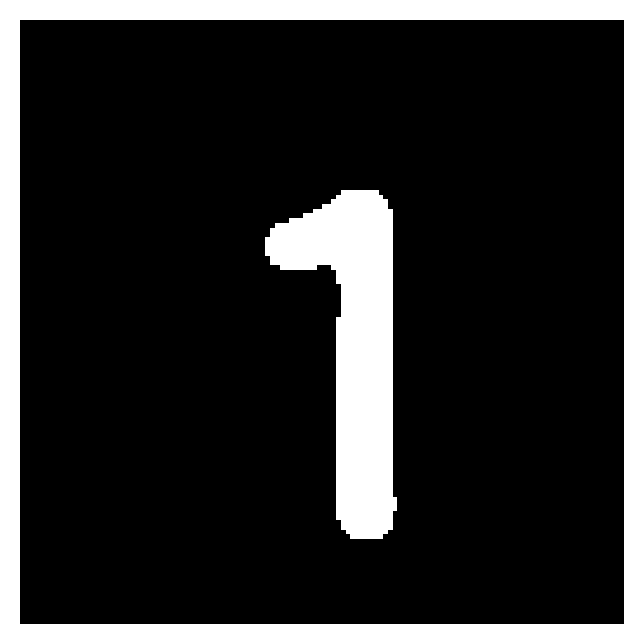

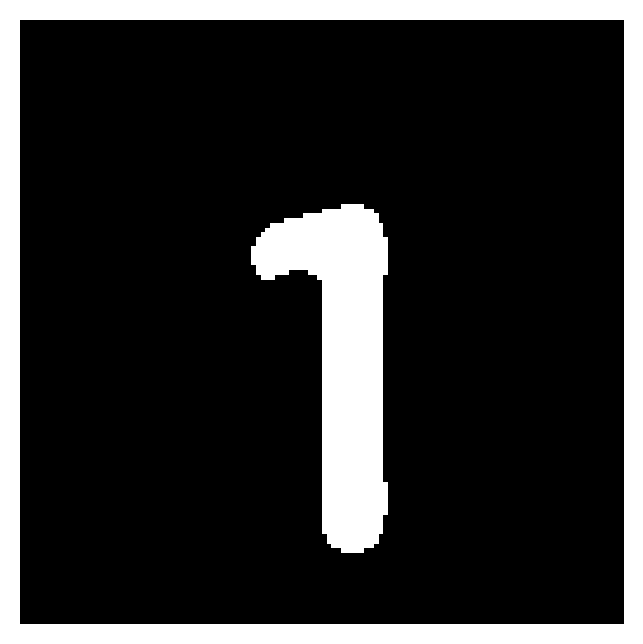

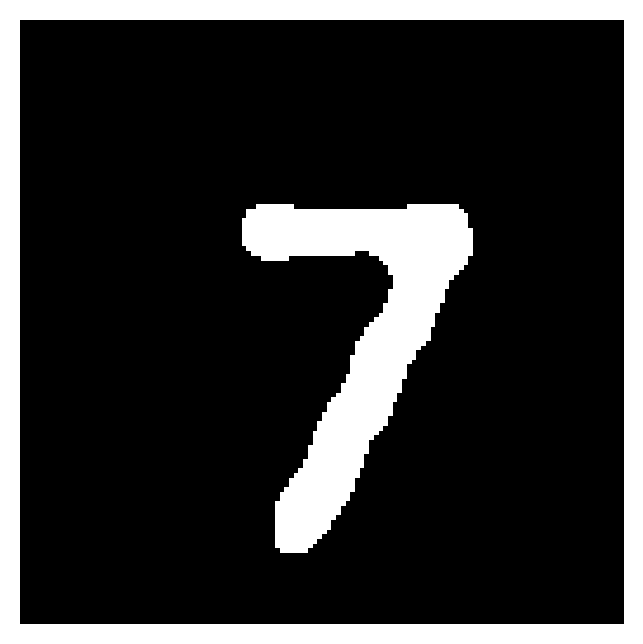

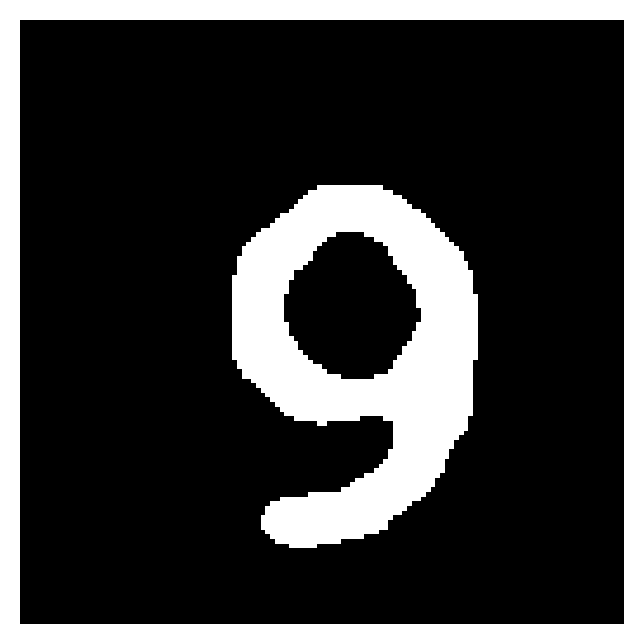

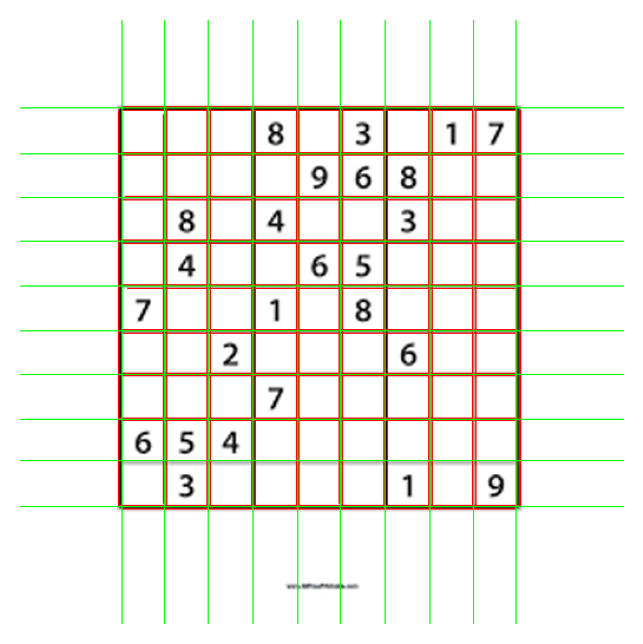

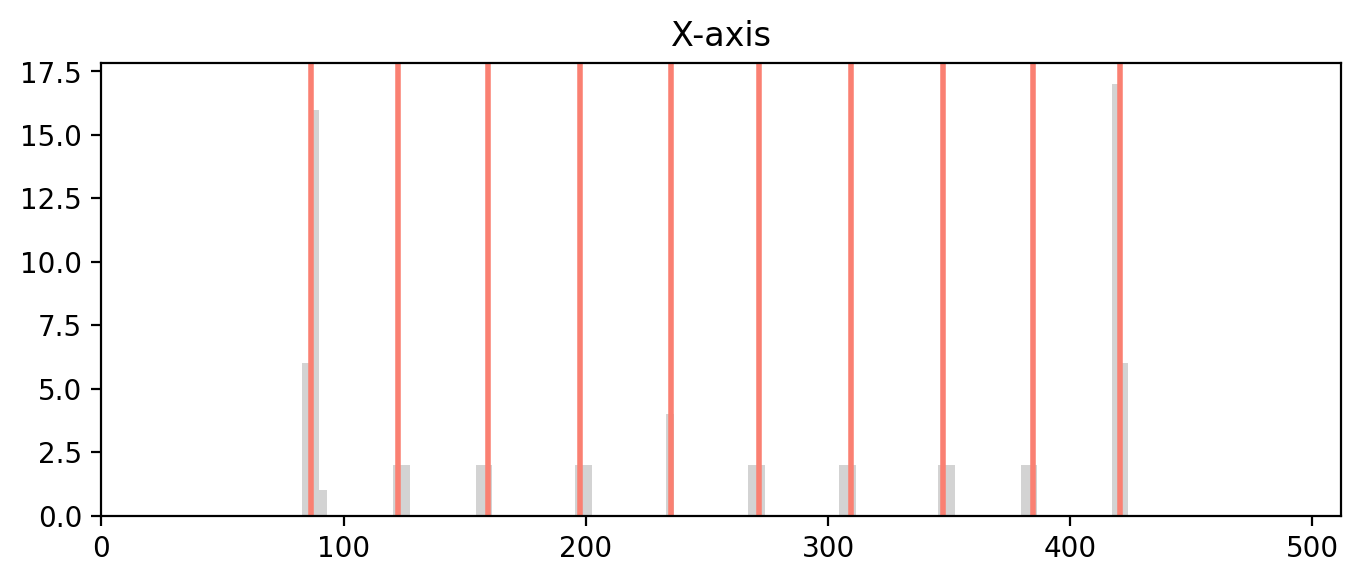

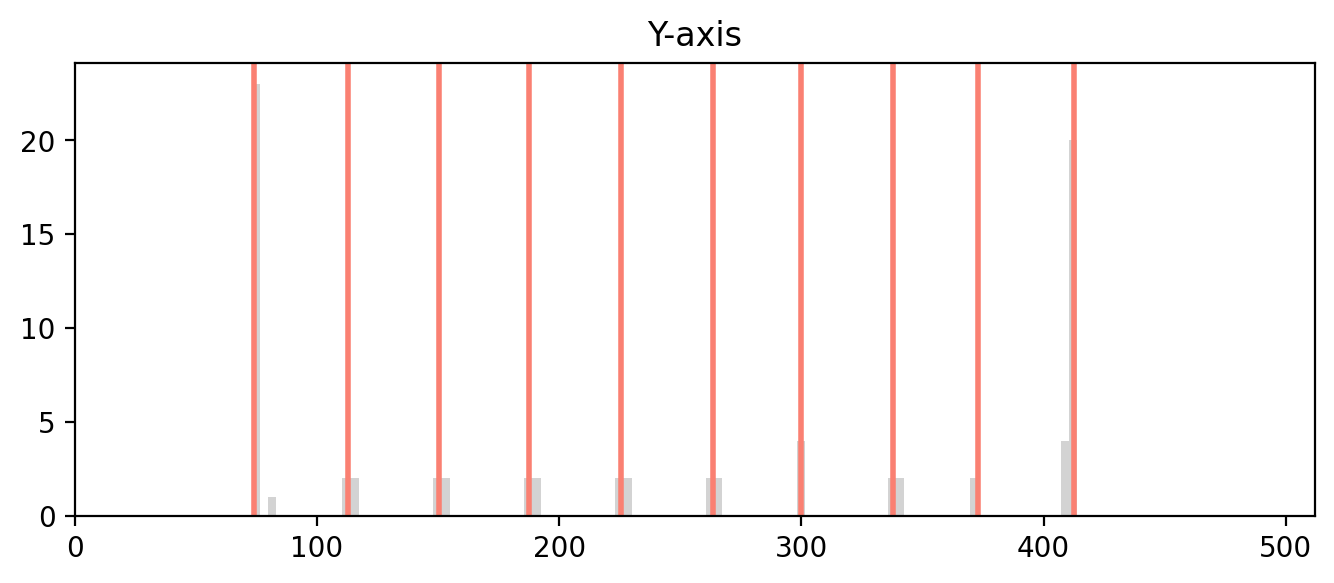

[1.7142857142857142, 57.0, 114.0, 170.5, 227.0, 284.0, 340.5, 397.5, 454.0, 509.75] [1.9047619047619047, 57.0, 114.0, 170.5, 227.0, 284.0, 340.5, 397.5, 454.0, 509.15]
[(1, 1, 57, 57, 0), (1, 57, 57, 114, 9), (1, 114, 57, 170, 18), (1, 170, 57, 227, 27), (1, 227, 57, 284, 36), (1, 284, 57, 340, 45), (1, 340, 57, 397, 54), (1, 397, 57, 454, 63), (1, 454, 57, 509, 72), (57, 1, 114, 57, 1), (57, 57, 114, 114, 10), (57, 114, 114, 170, 19), (57, 170, 114, 227, 28), (57, 227, 114, 284, 37), (57, 284, 114, 340, 46), (57, 340, 114, 397, 55), (57, 397, 114, 454, 64), (57, 454, 114, 509, 73), (114, 1, 170, 57, 2), (114, 57, 170, 114, 11), (114, 114, 170, 170, 20), (114, 170, 170, 227, 29), (114, 227, 170, 284, 38), (114, 284, 170, 340, 47), (114, 340, 170, 397, 56), (114, 397, 170, 454, 65), (114, 454, 170, 509, 74), (170, 1, 227, 57, 3), (170, 57, 227, 114, 12), (170, 114, 227, 170, 21), (170, 170, 227, 227, 30), (170, 227, 227, 284, 39), (170, 284, 227, 340, 48), (170, 340, 227, 397, 57), (170

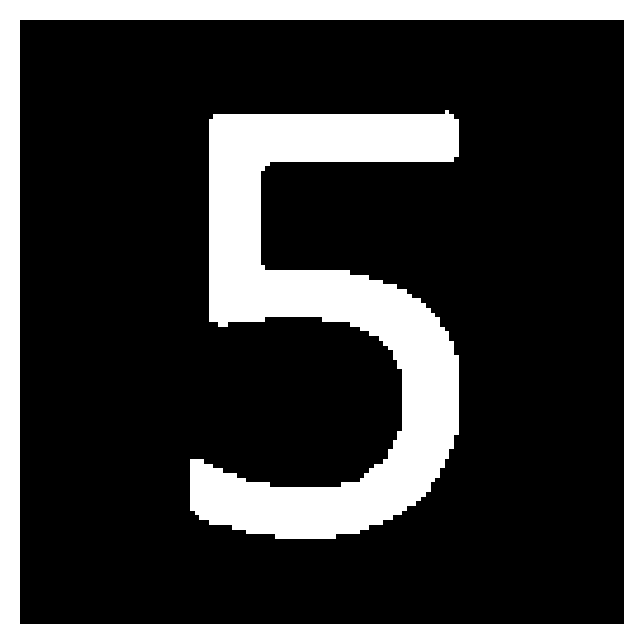

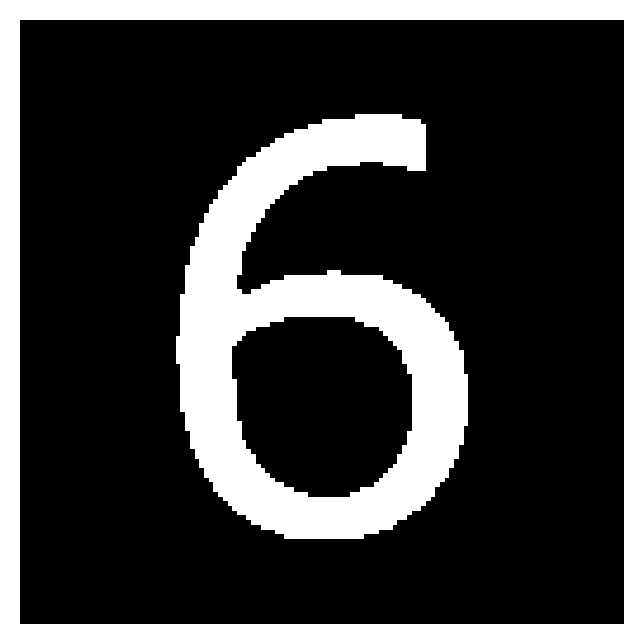

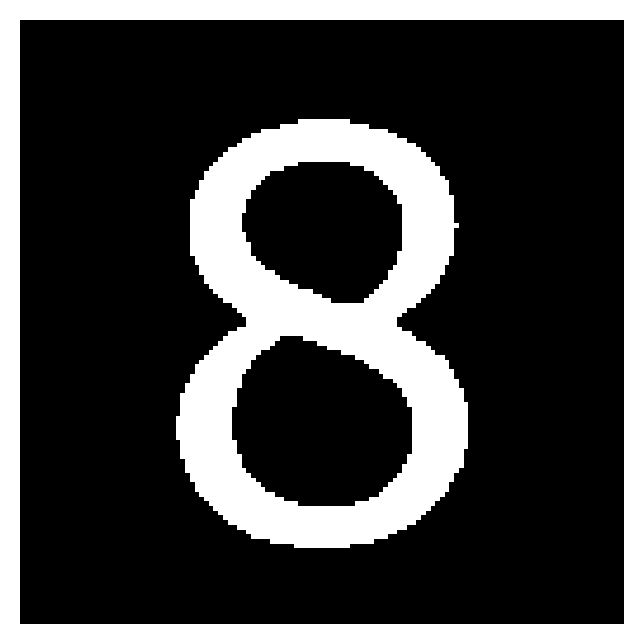

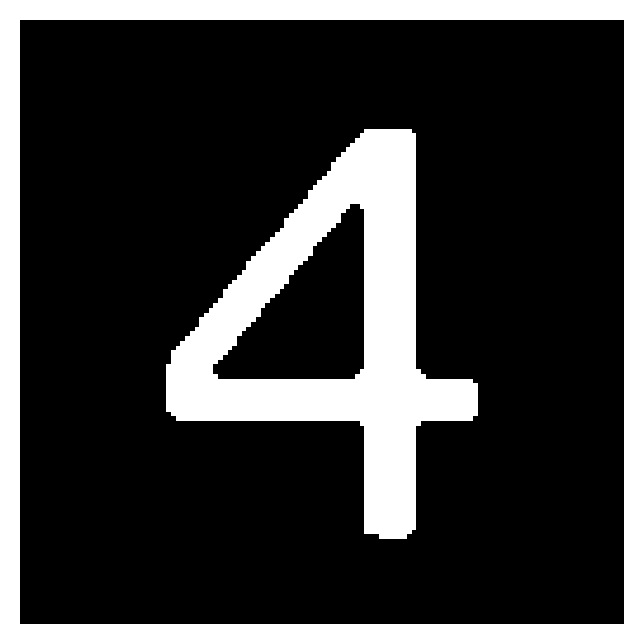

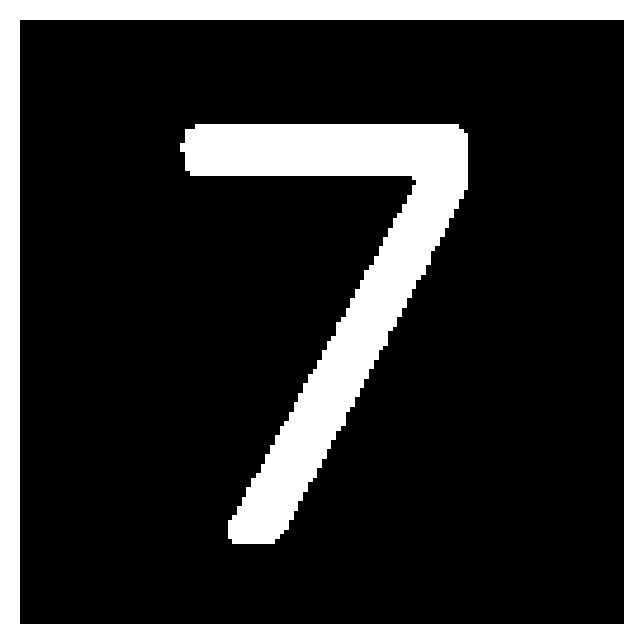

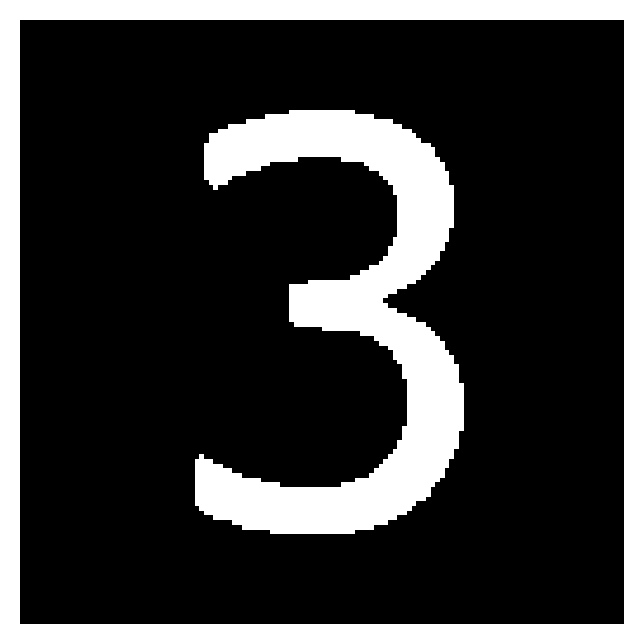

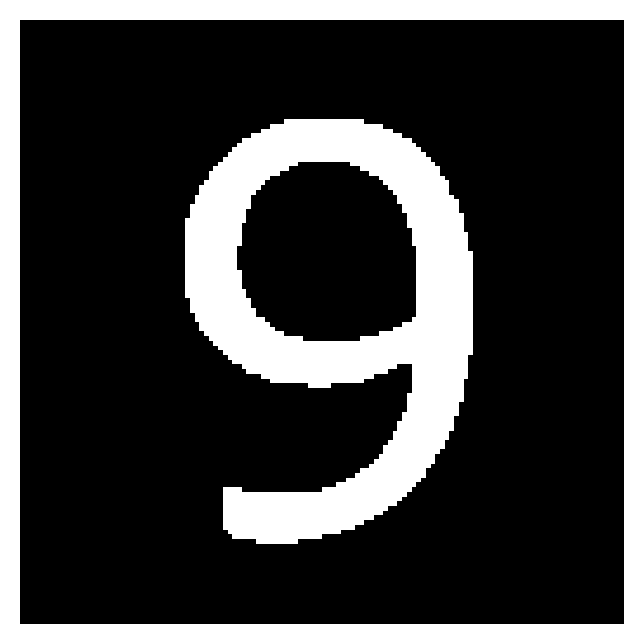

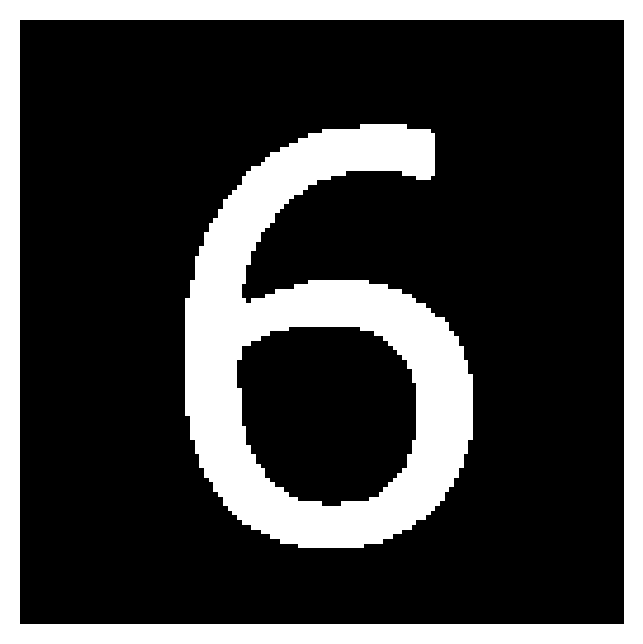

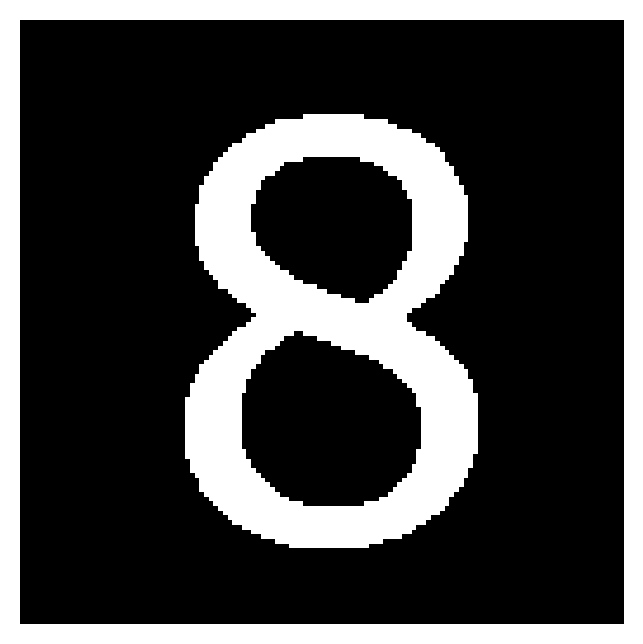

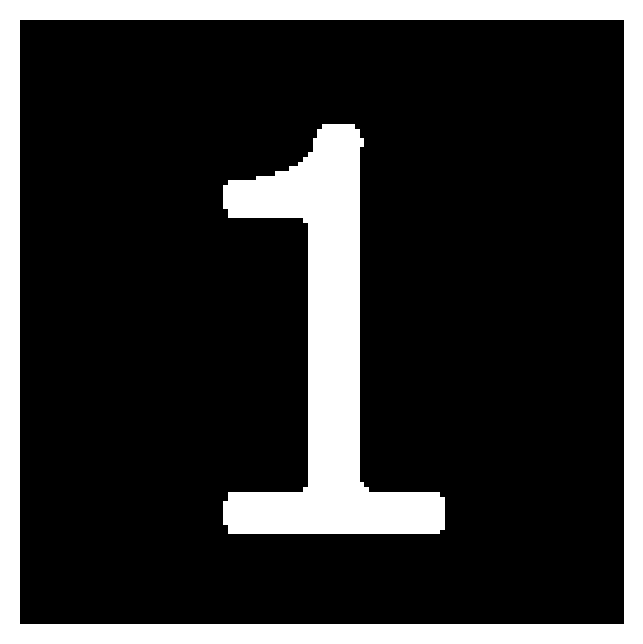

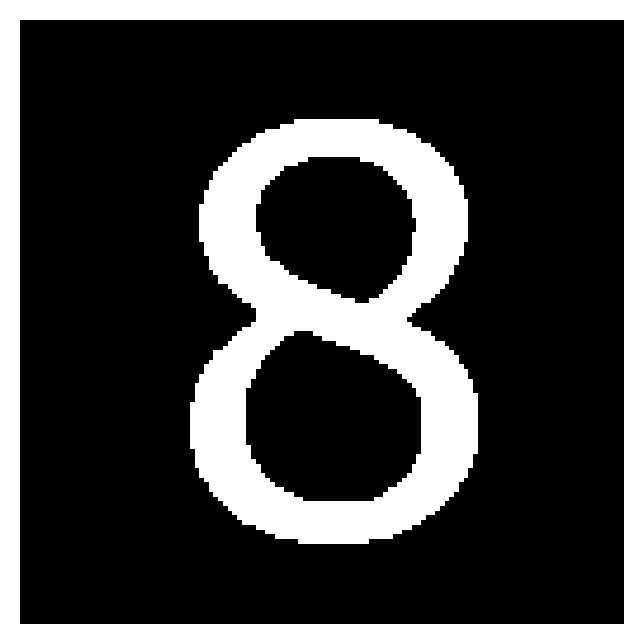

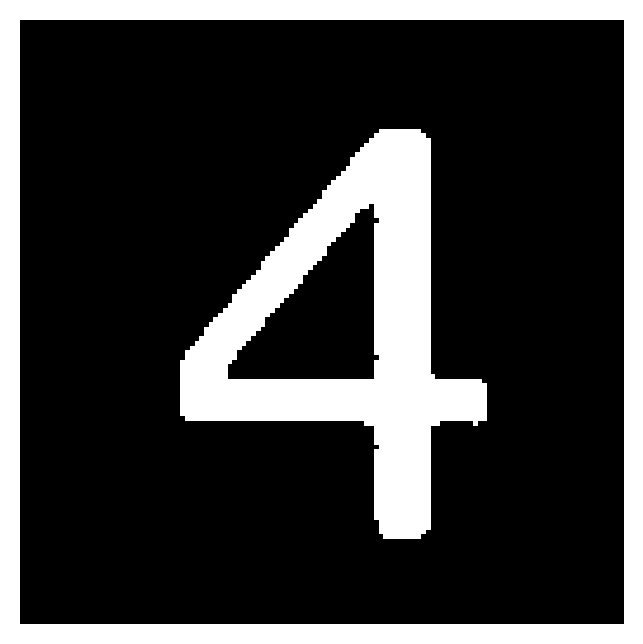

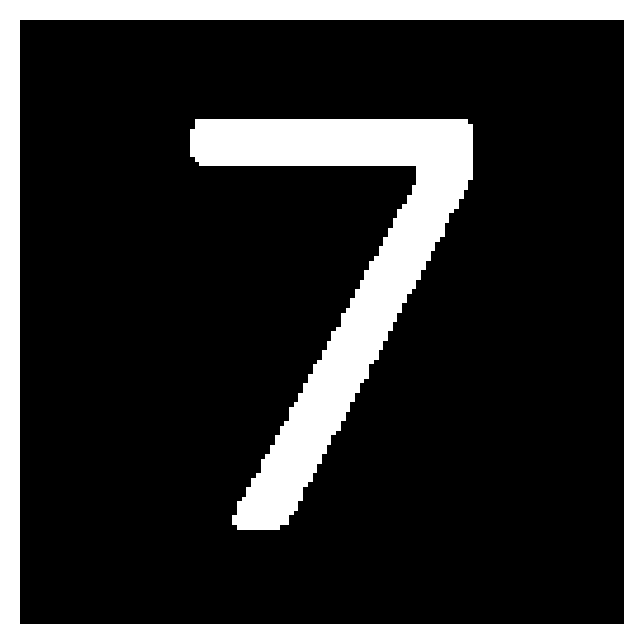

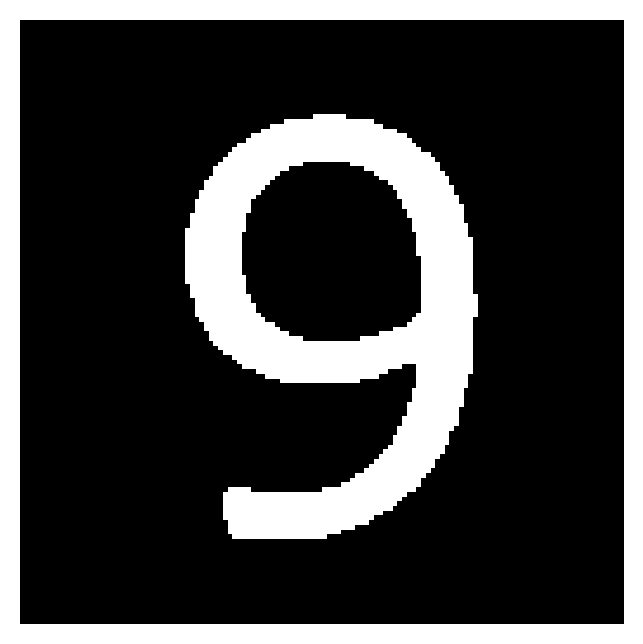

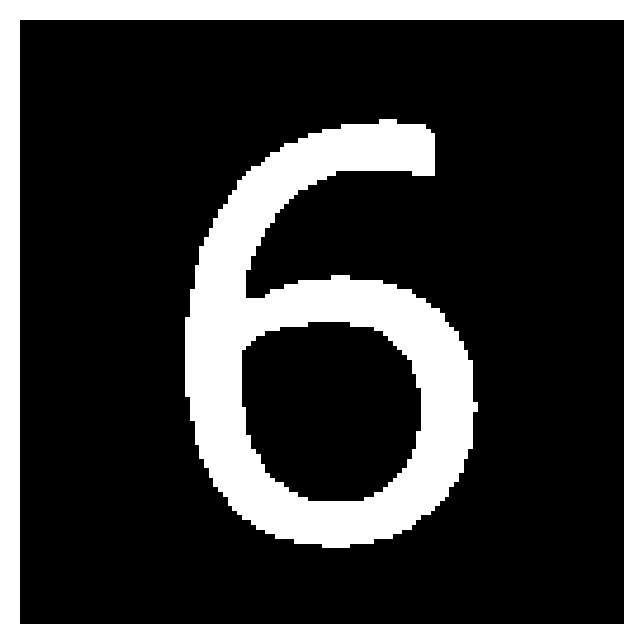

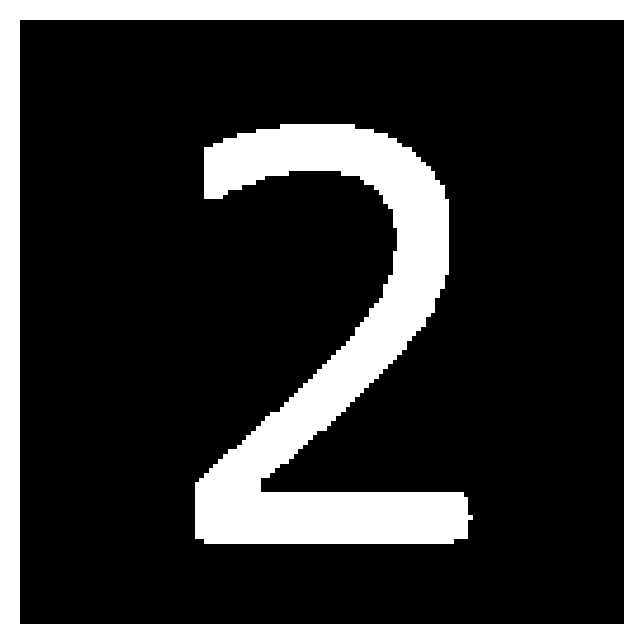

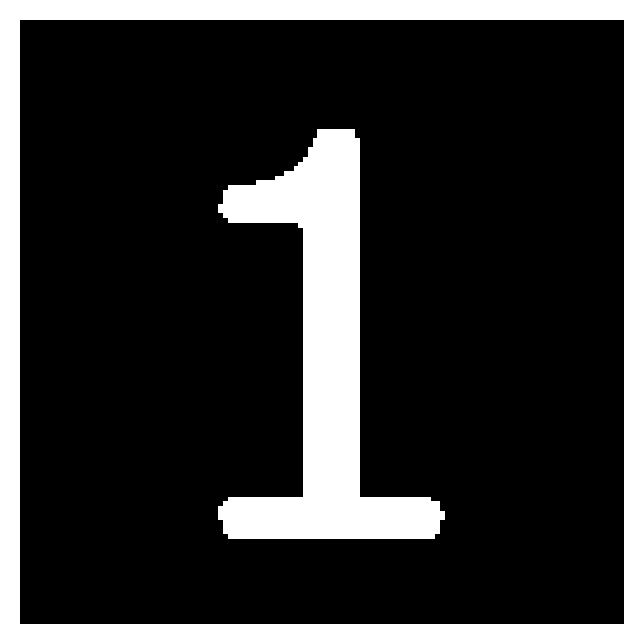

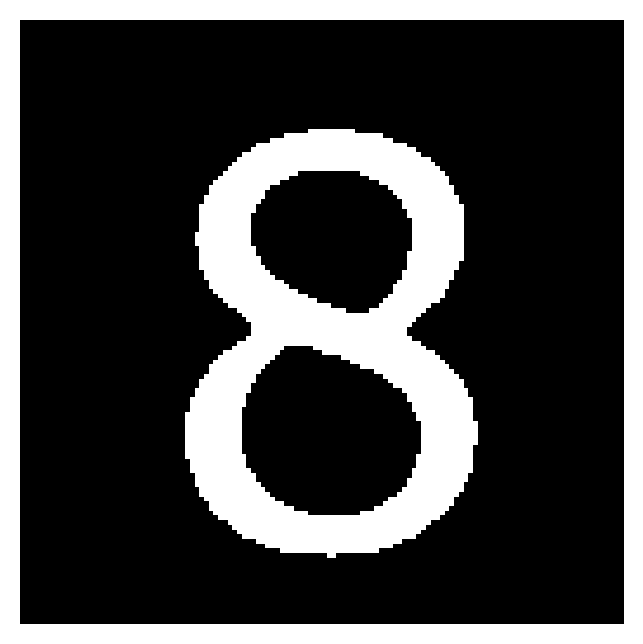

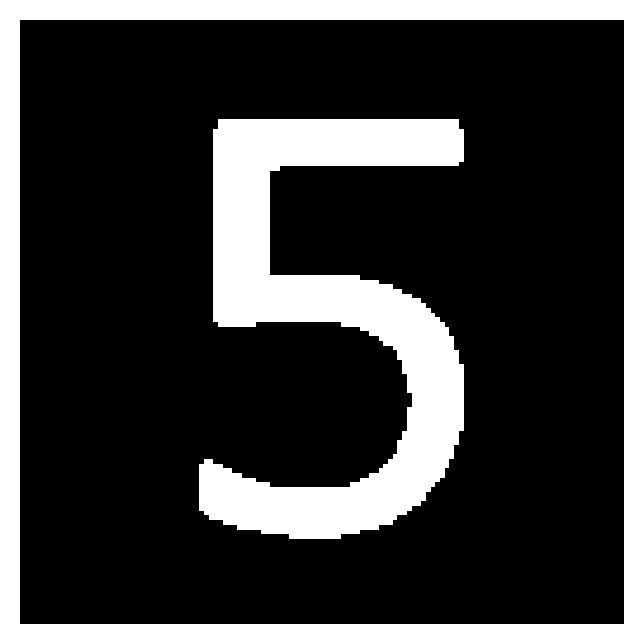

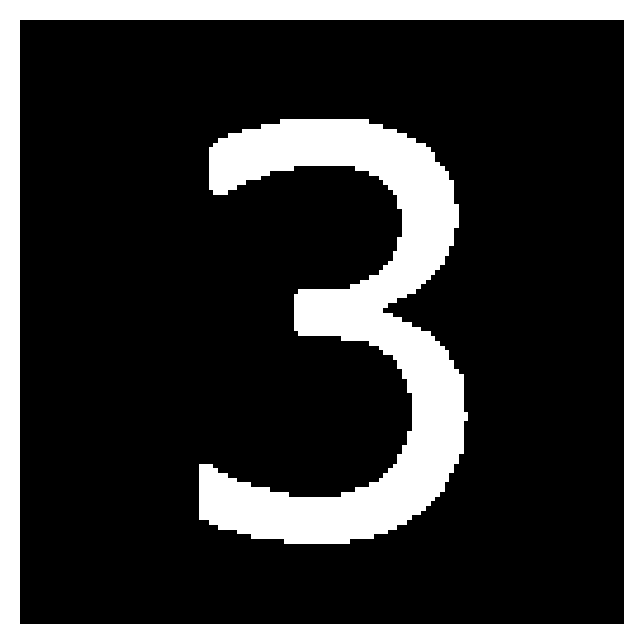

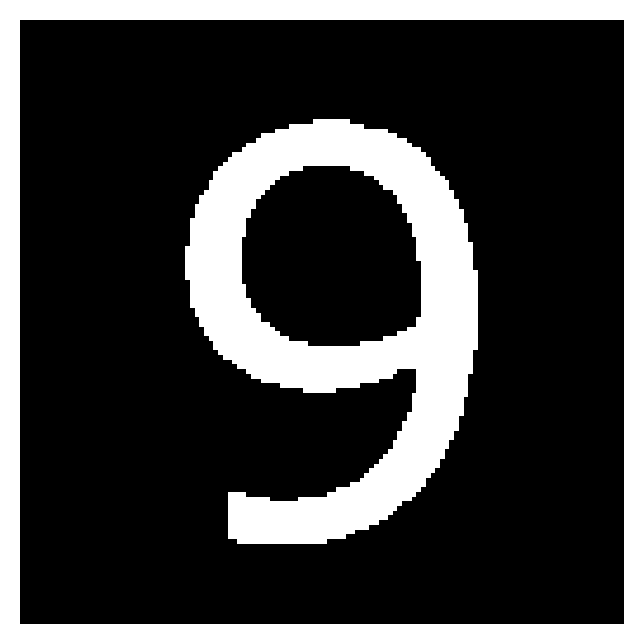

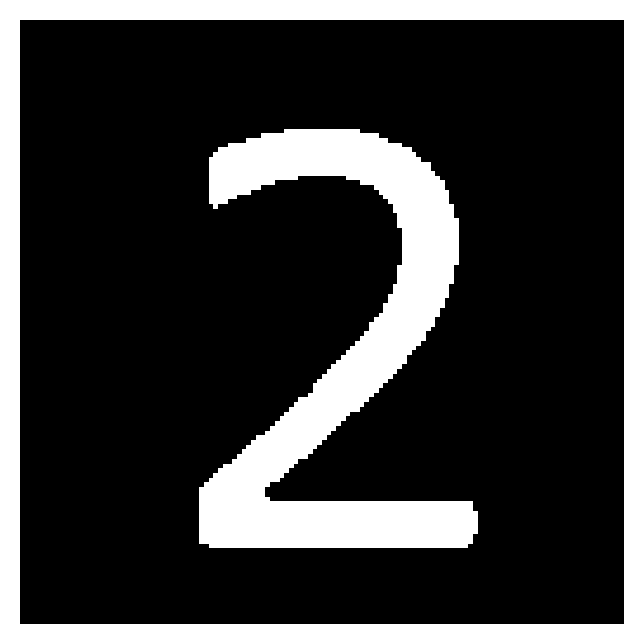

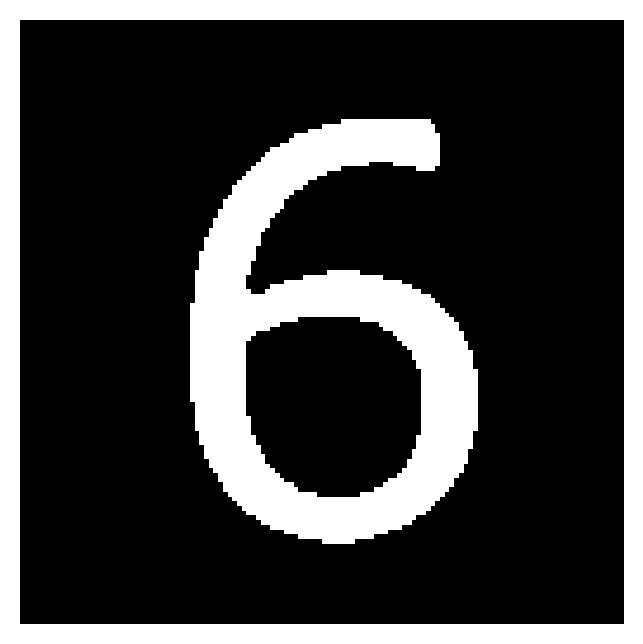

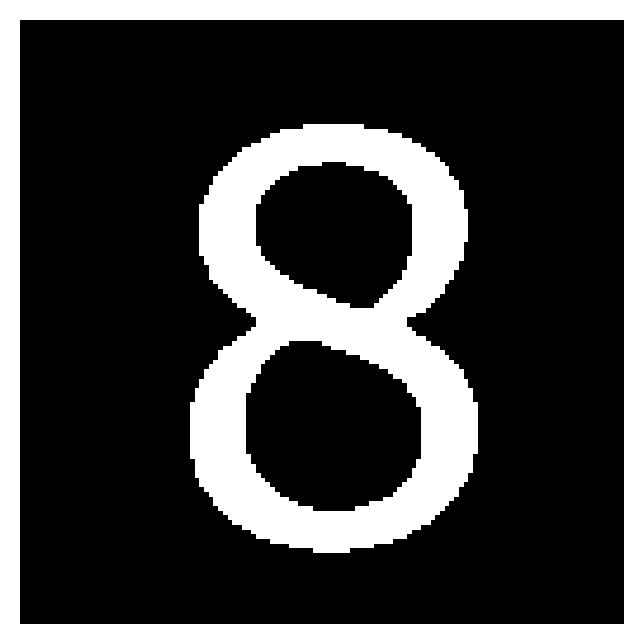

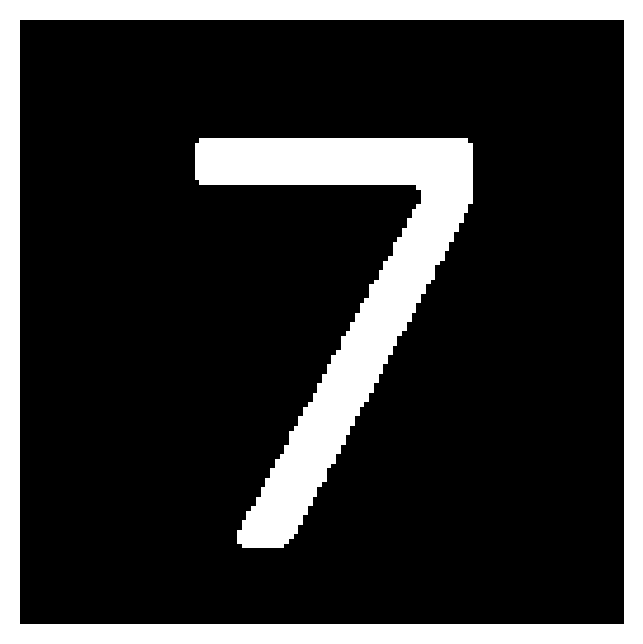

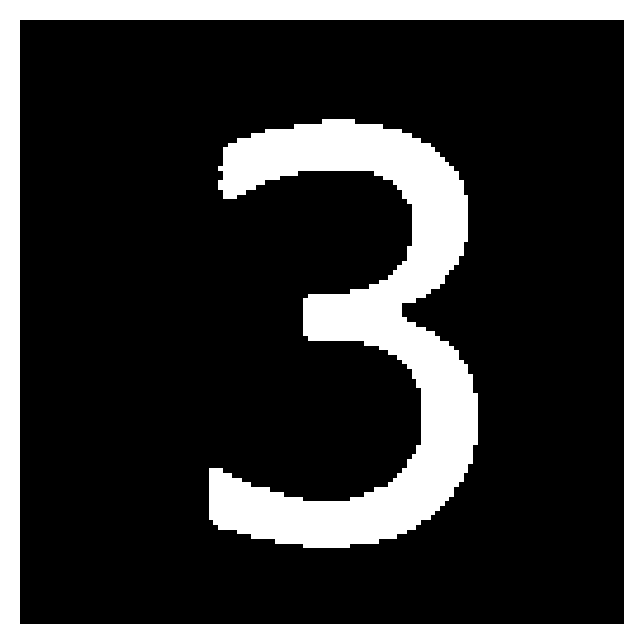

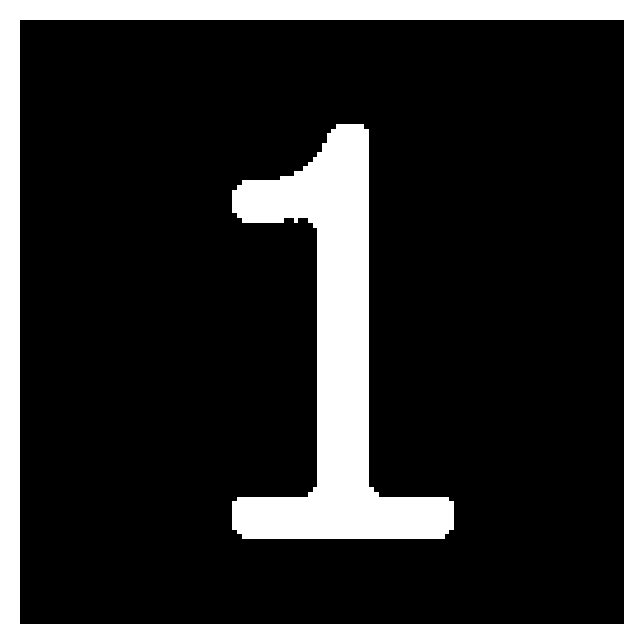

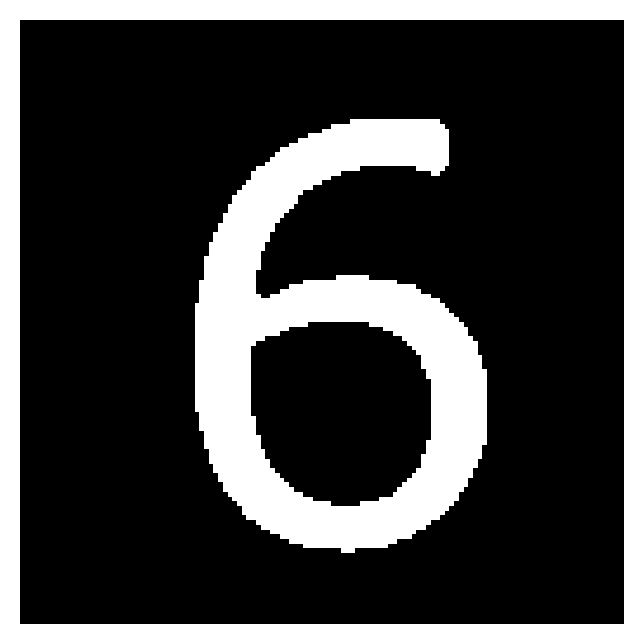

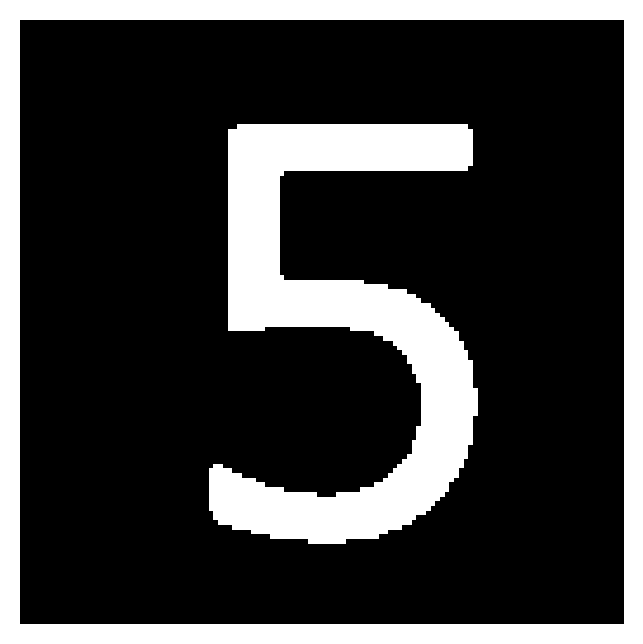

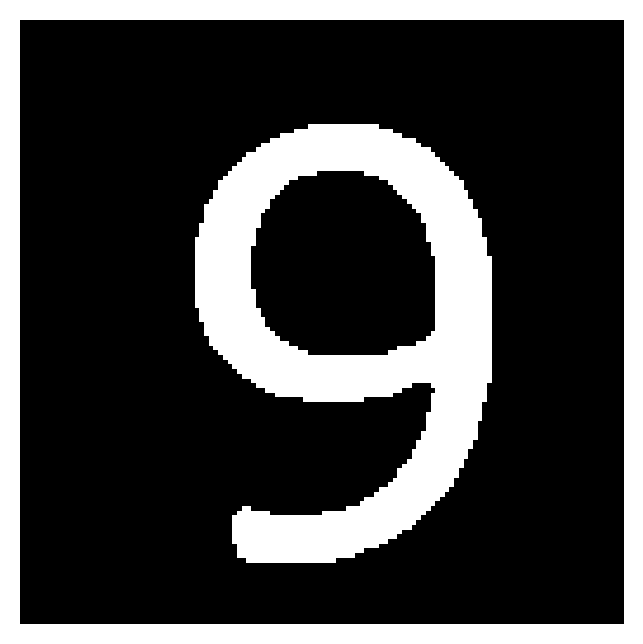

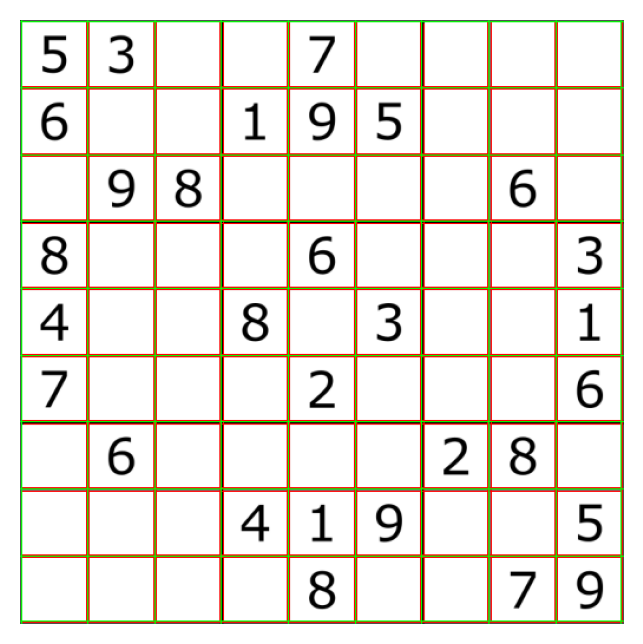

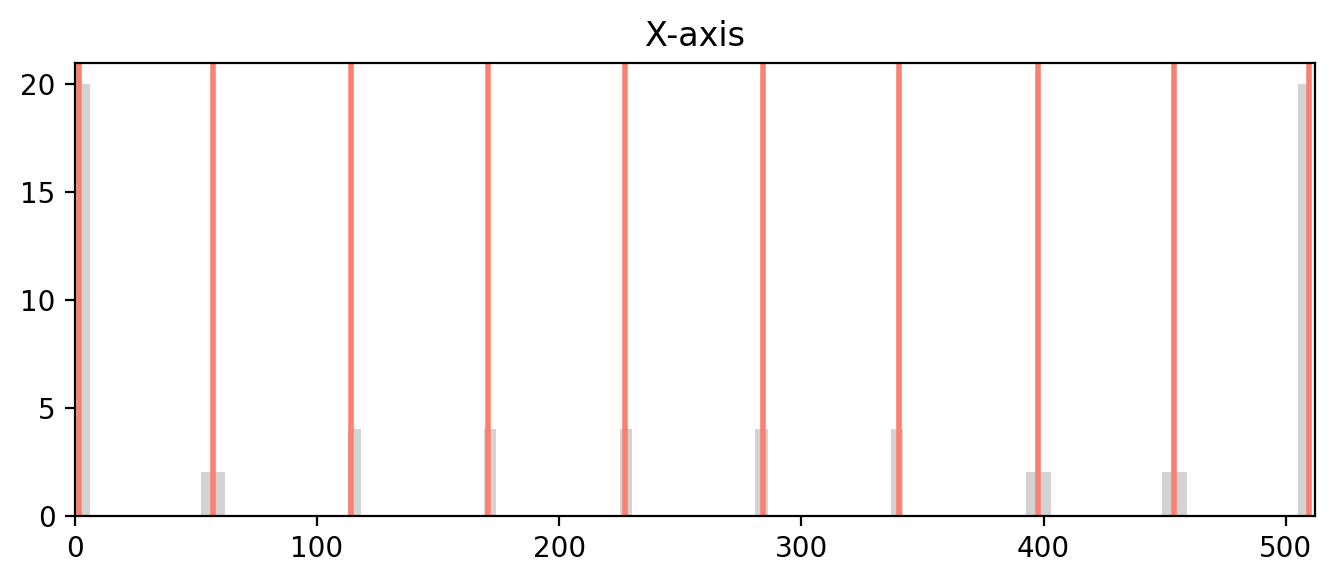

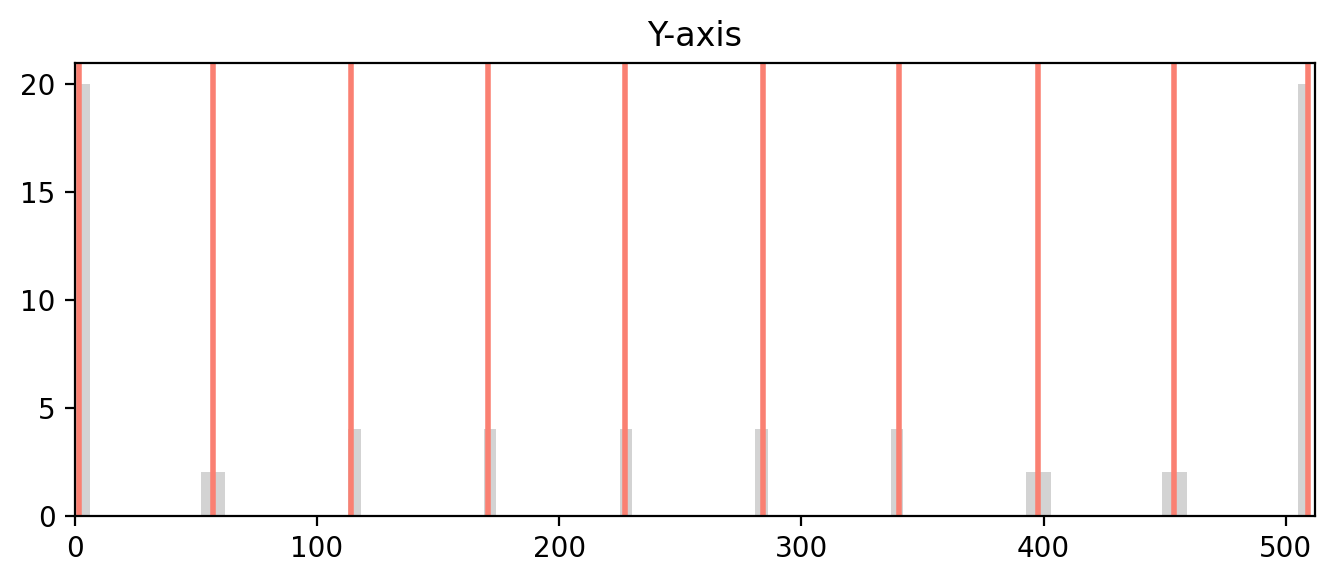

[84.86206896551724, 123.0, 161.0, 198.5, 237.0, 274.0, 312.5, 350.0, 388.0, 426.07142857142856] [77.93103448275862, 123.0, 161.0, 199.0, 237.0, 274.0, 312.5, 350.0, 388.0, 427.67857142857144]
[(84, 77, 123, 123, 0), (84, 123, 123, 161, 9), (84, 161, 123, 199, 18), (84, 199, 123, 237, 27), (84, 237, 123, 274, 36), (84, 274, 123, 312, 45), (84, 312, 123, 350, 54), (84, 350, 123, 388, 63), (84, 388, 123, 427, 72), (123, 77, 161, 123, 1), (123, 123, 161, 161, 10), (123, 161, 161, 199, 19), (123, 199, 161, 237, 28), (123, 237, 161, 274, 37), (123, 274, 161, 312, 46), (123, 312, 161, 350, 55), (123, 350, 161, 388, 64), (123, 388, 161, 427, 73), (161, 77, 198, 123, 2), (161, 123, 198, 161, 11), (161, 161, 198, 199, 20), (161, 199, 198, 237, 29), (161, 237, 198, 274, 38), (161, 274, 198, 312, 47), (161, 312, 198, 350, 56), (161, 350, 198, 388, 65), (161, 388, 198, 427, 74), (198, 77, 237, 123, 3), (198, 123, 237, 161, 12), (198, 161, 237, 199, 21), (198, 199, 237, 237, 30), (198, 237, 237, 274

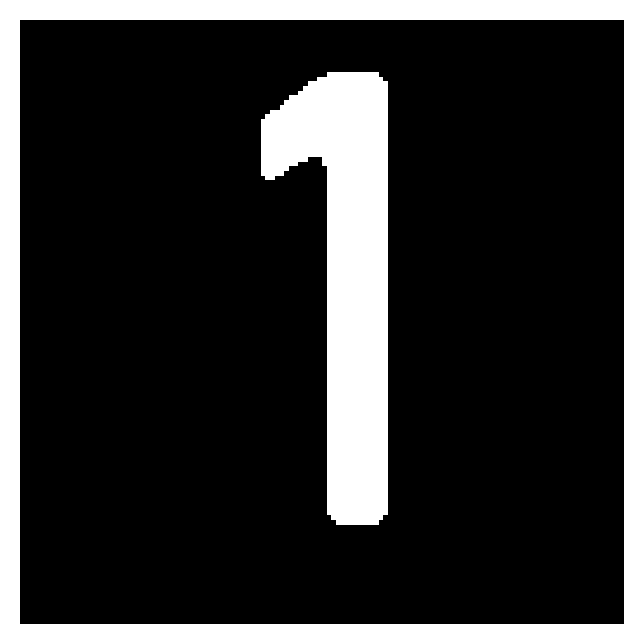

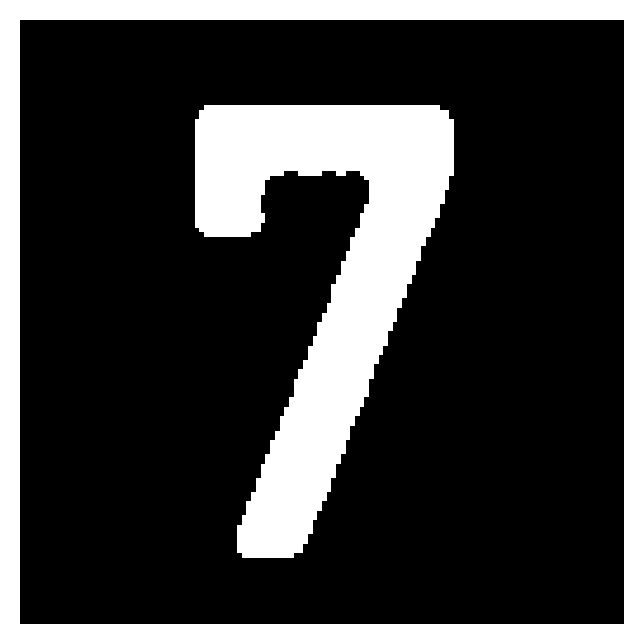

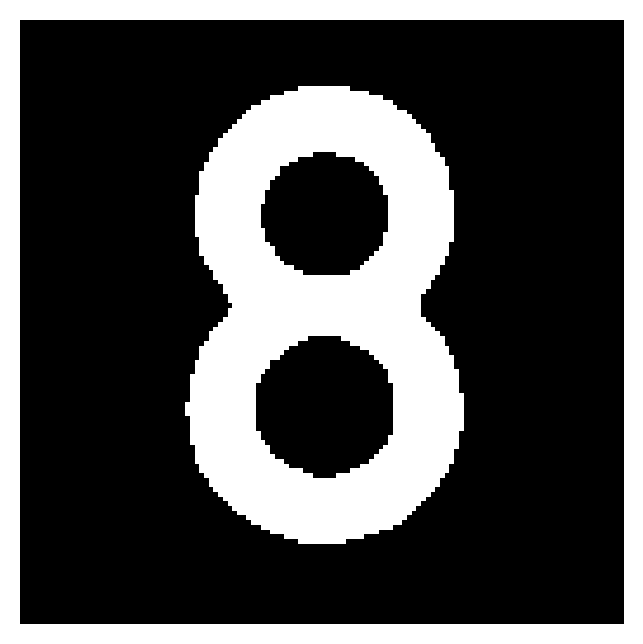

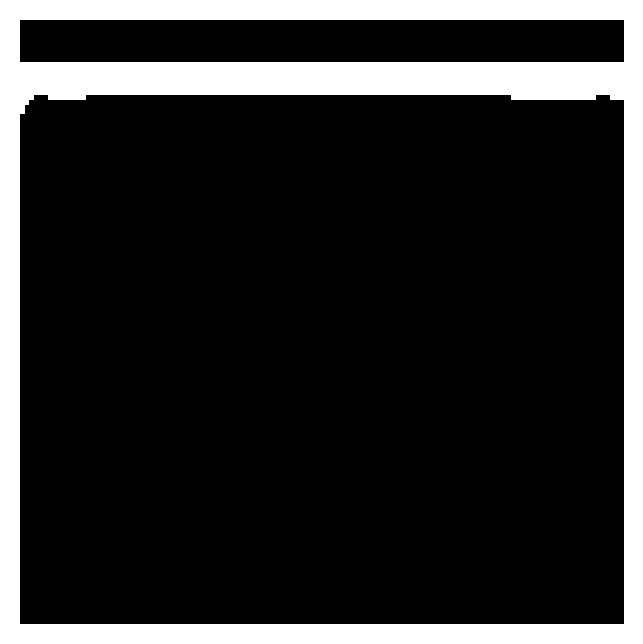

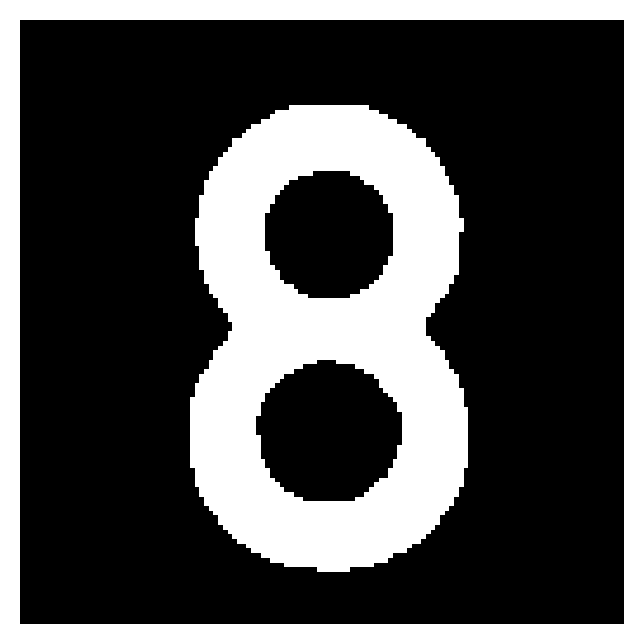

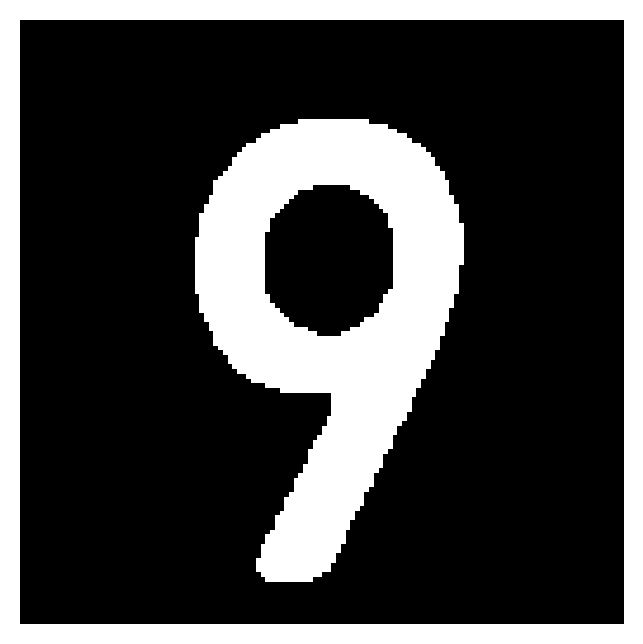

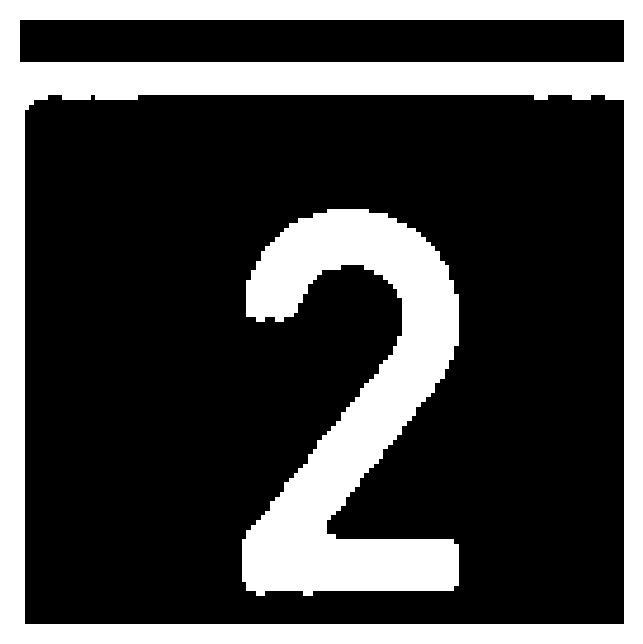

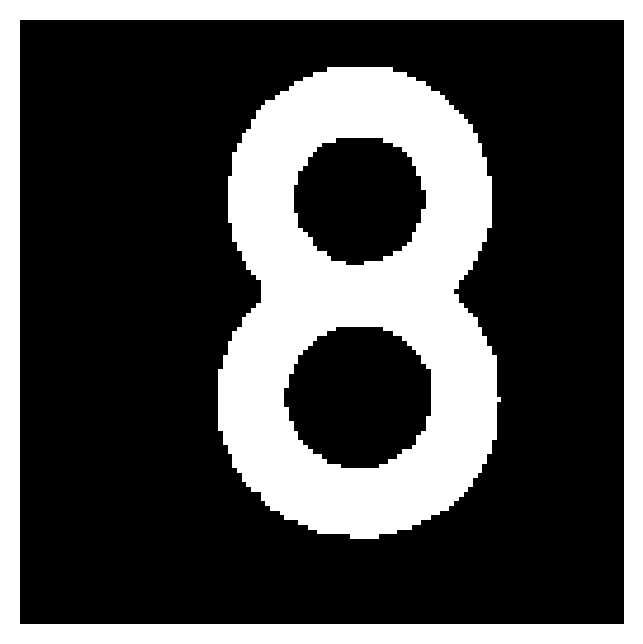

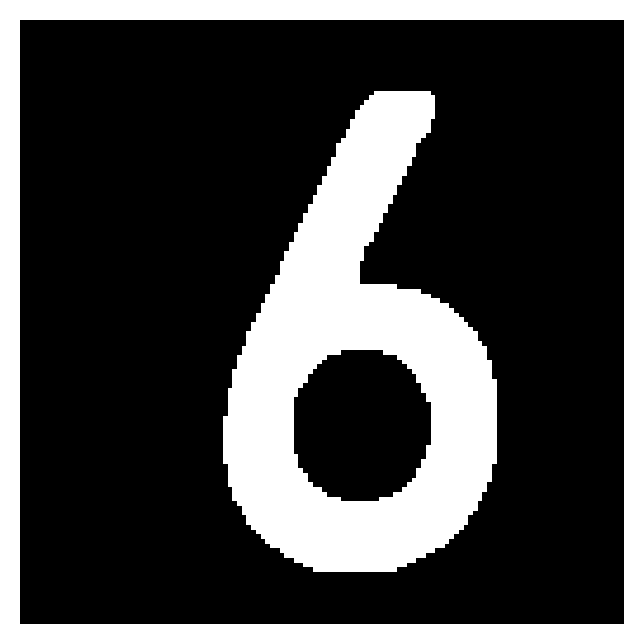

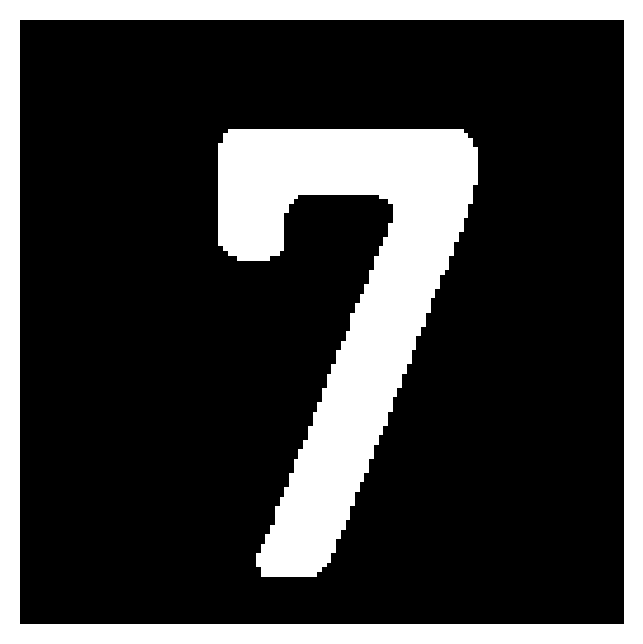

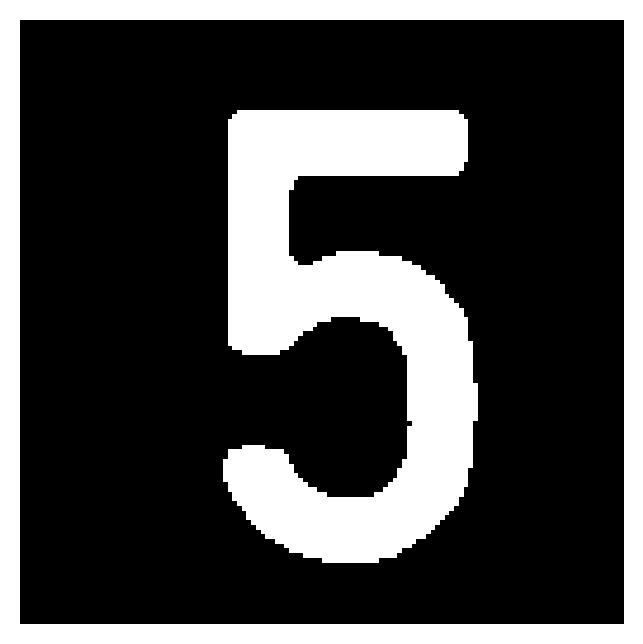

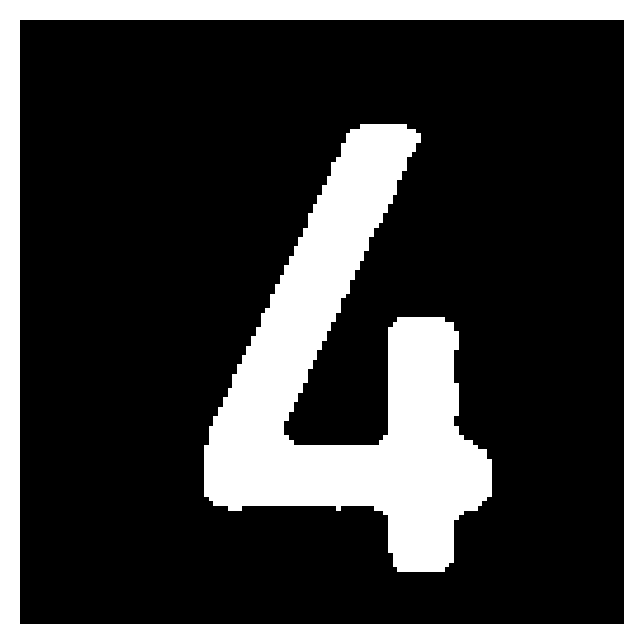

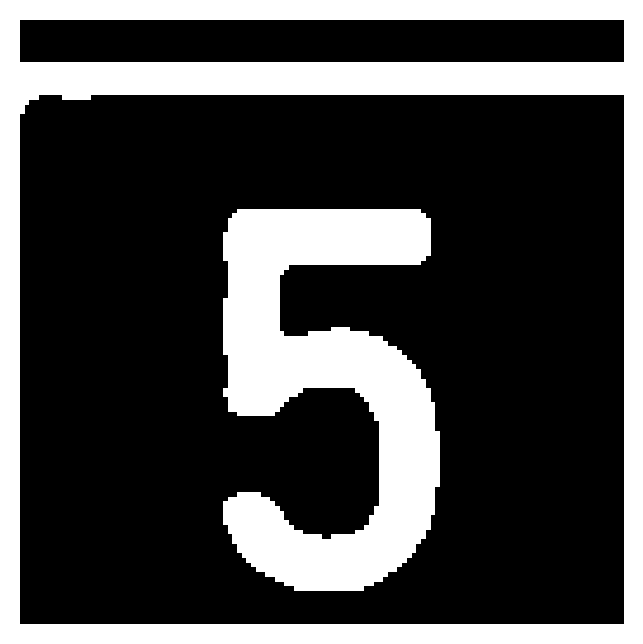

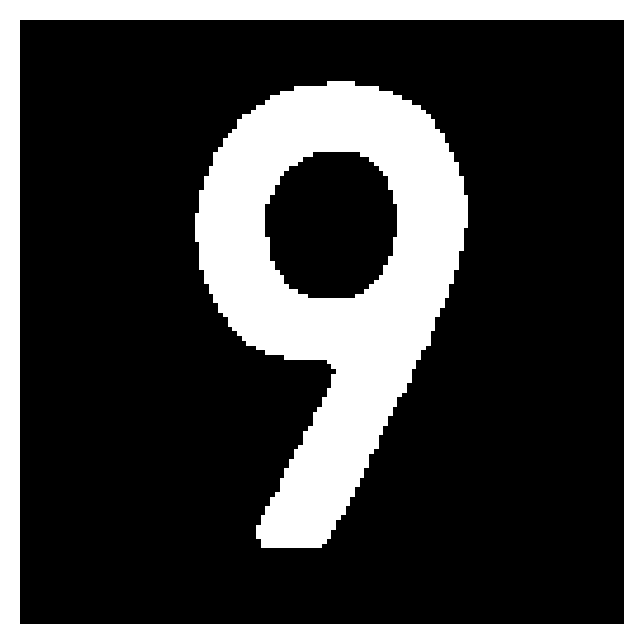

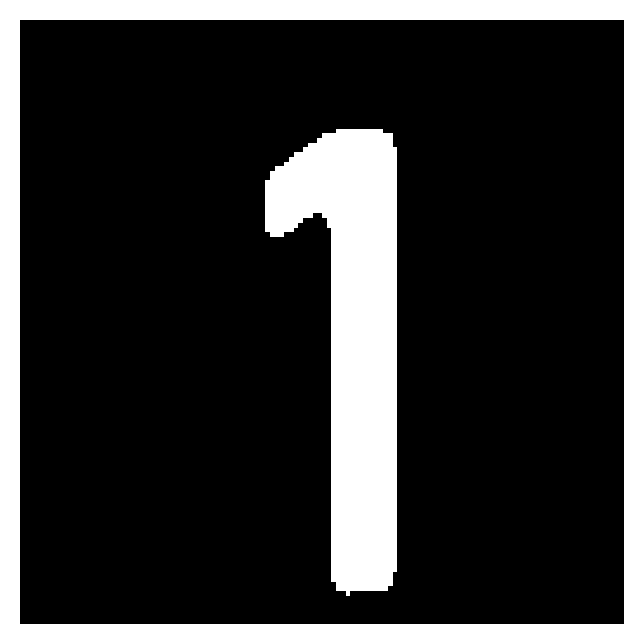

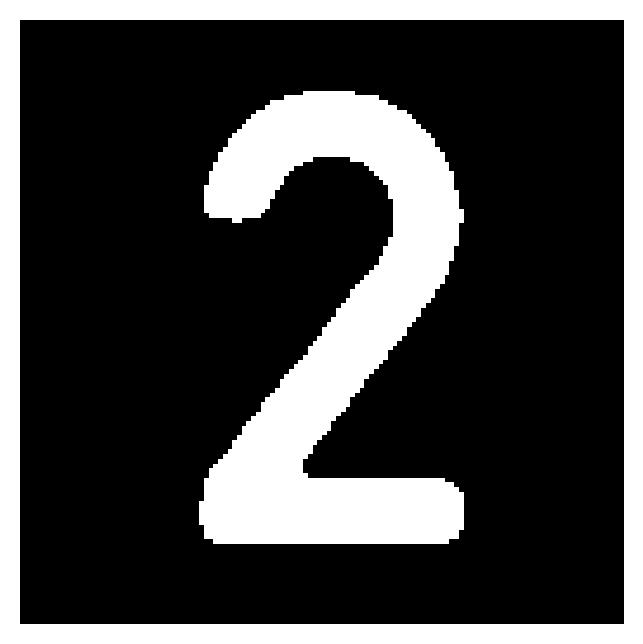

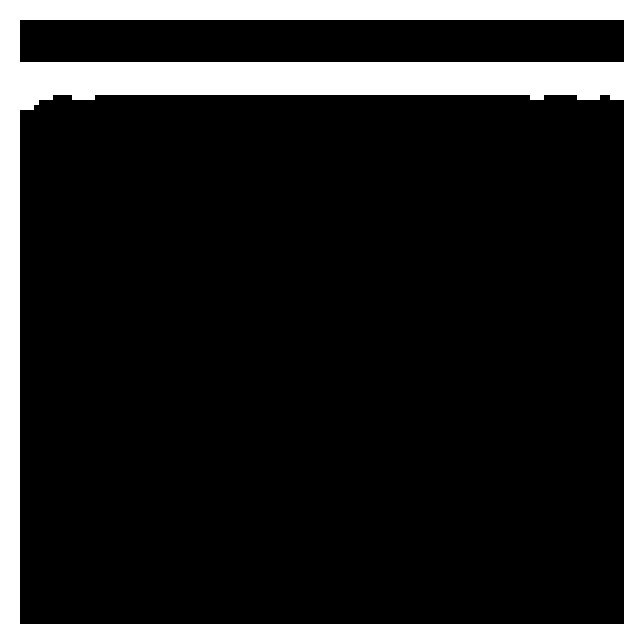

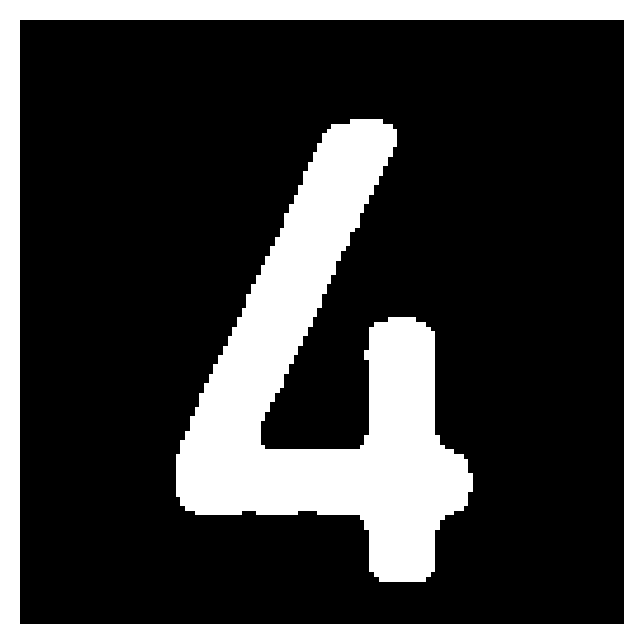

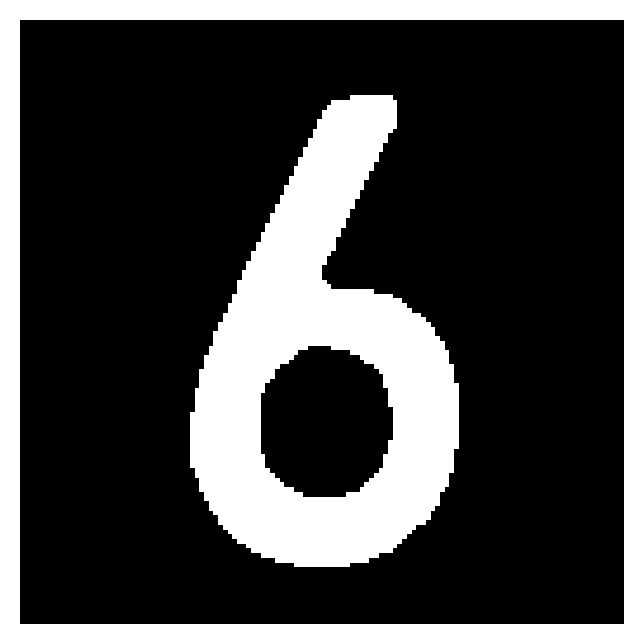

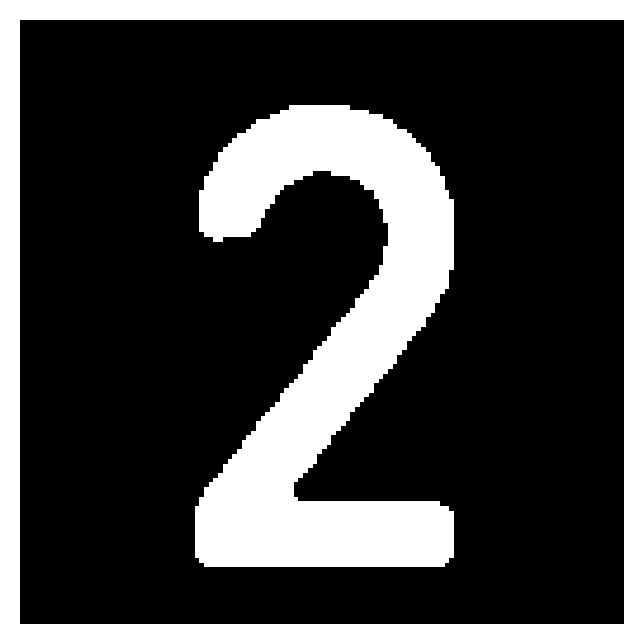

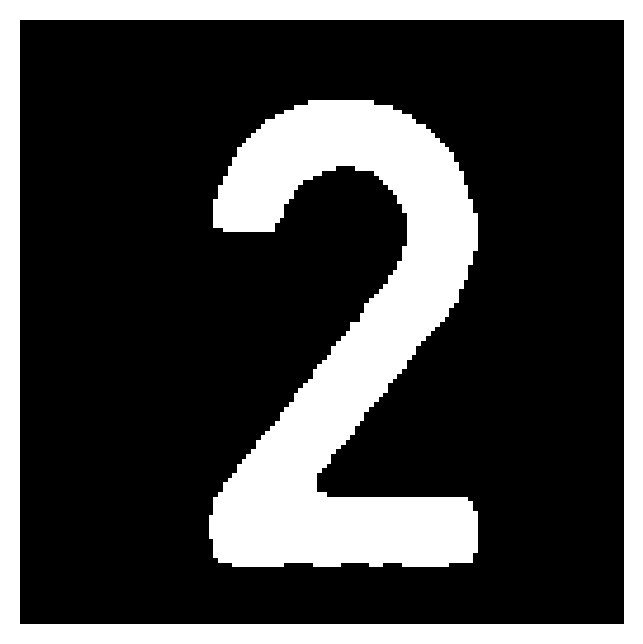

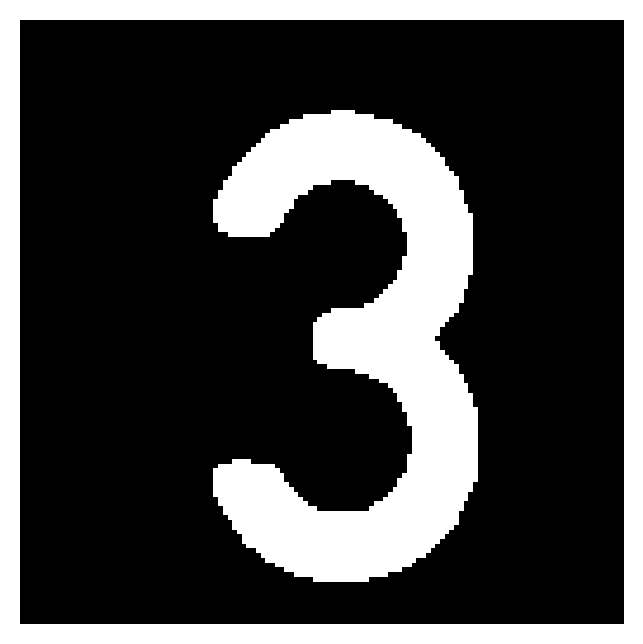

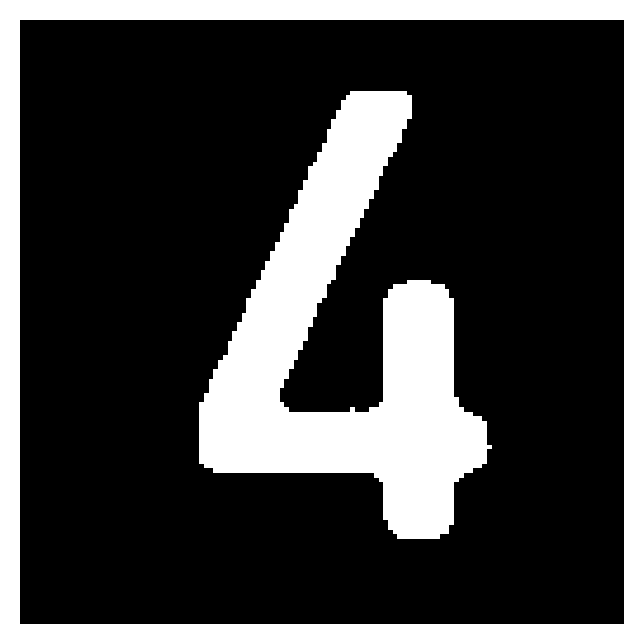

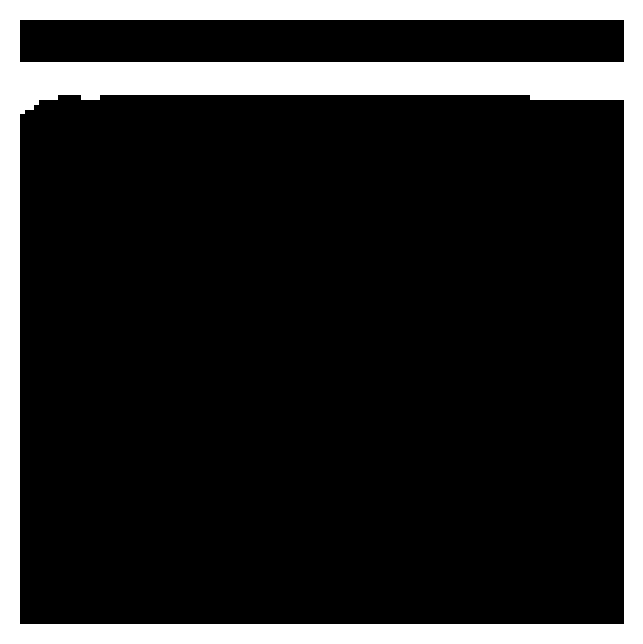

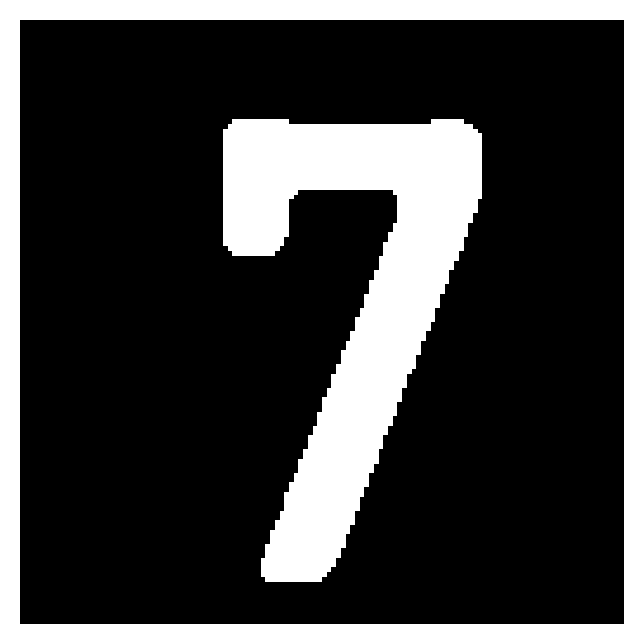

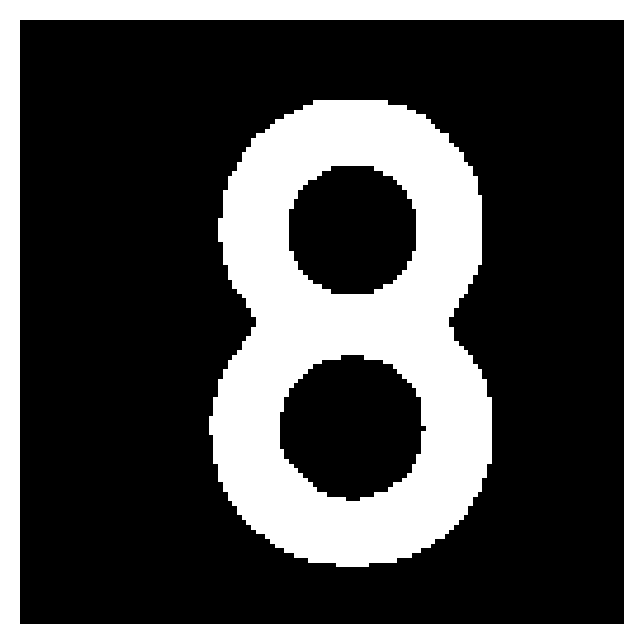

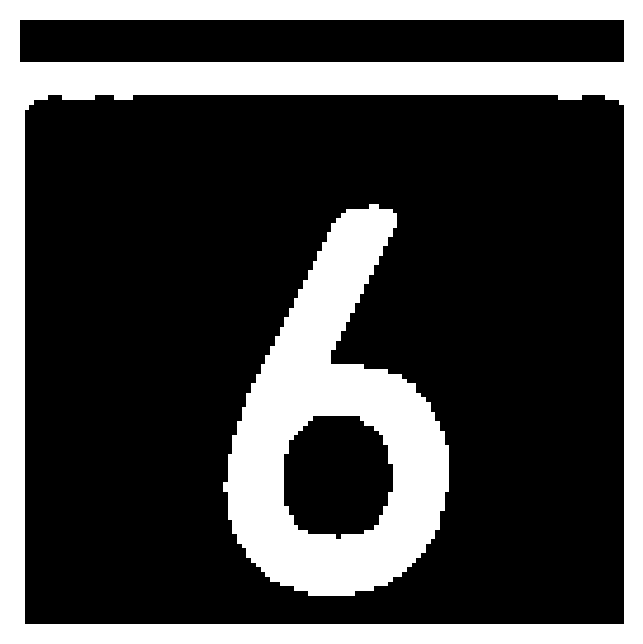

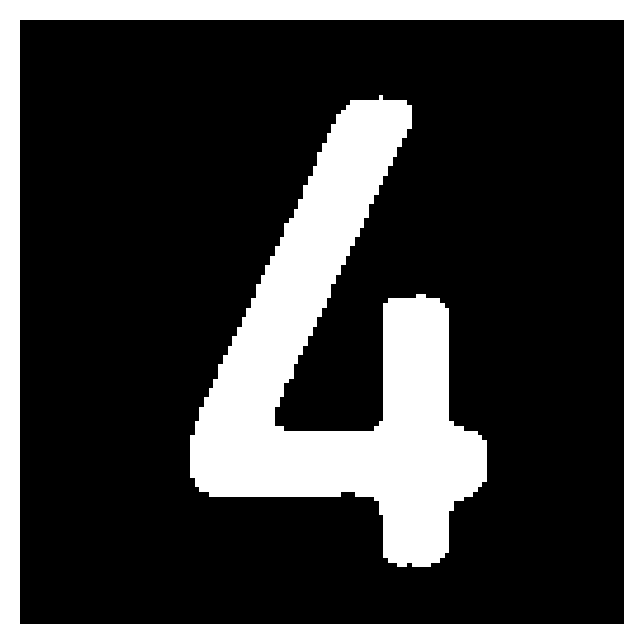

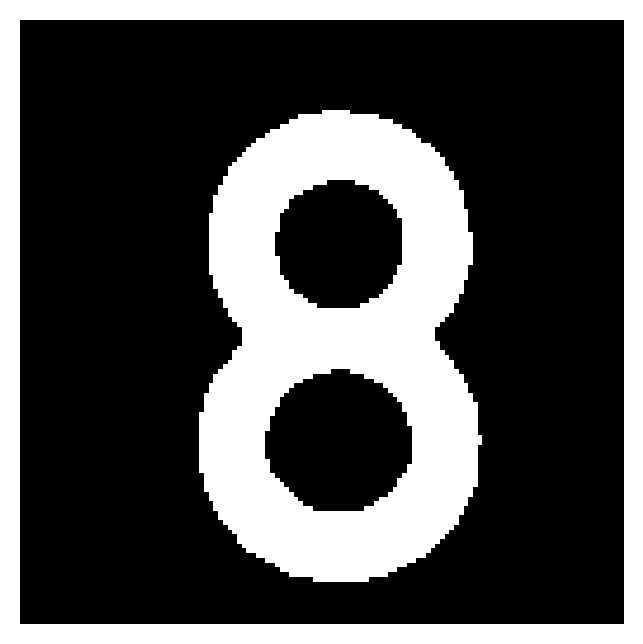

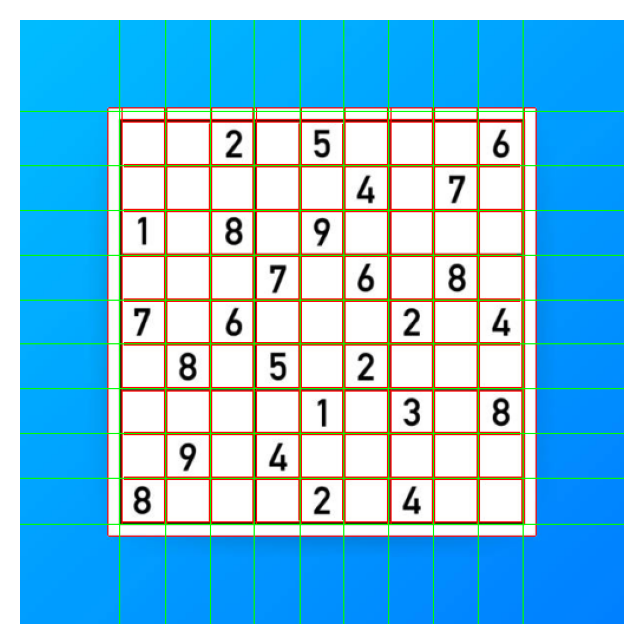

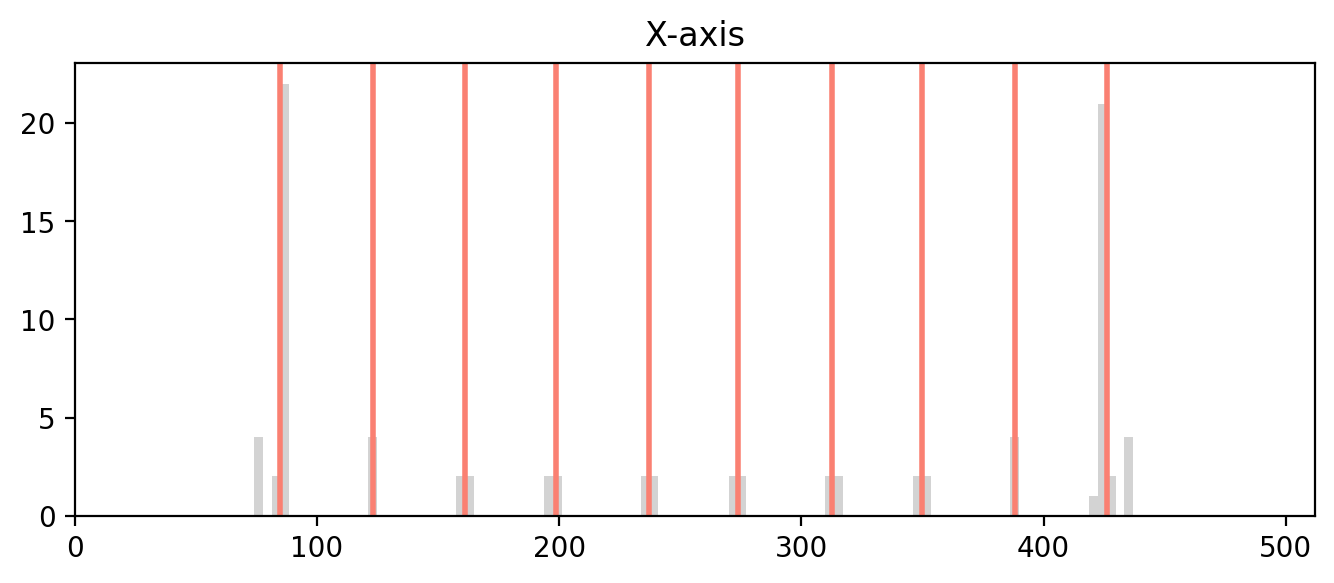

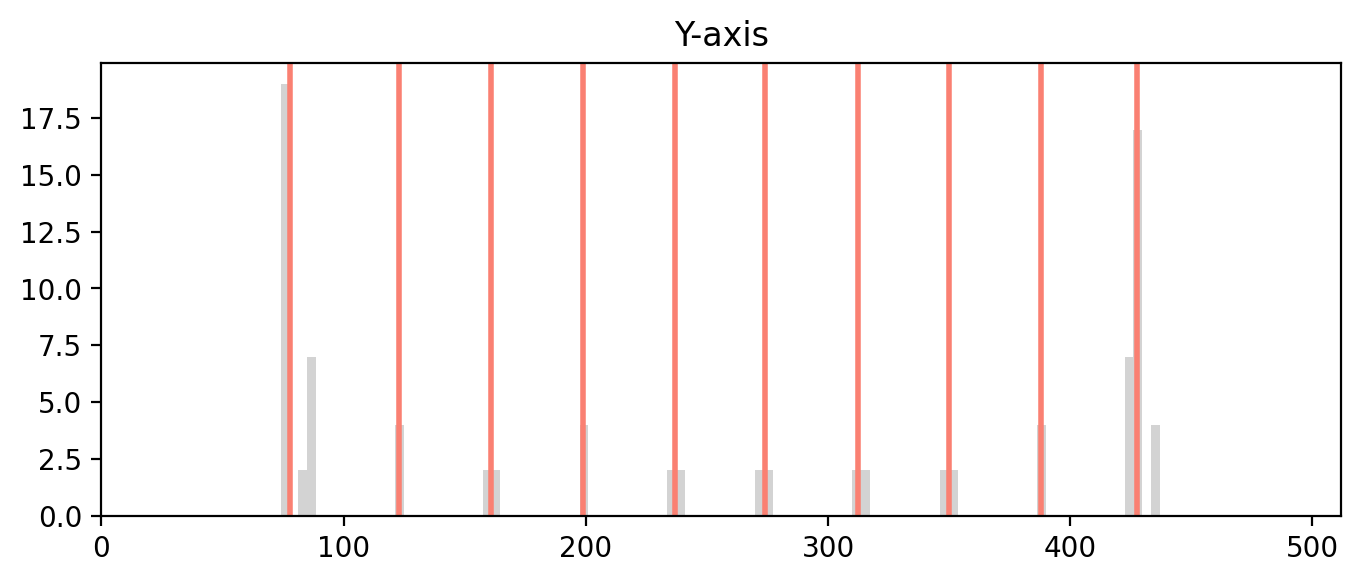

[109.44, 143.0, 178.0, 212.5, 247.0, 282.0, 317.0, 352.0, 386.0, 418.9166666666667] [90.44, 127.0, 162.0, 196.5, 231.0, 266.0, 301.0, 336.0, 370.0, 403.4583333333333]
[(109, 90, 143, 127, 0), (109, 127, 143, 162, 9), (109, 162, 143, 196, 18), (109, 196, 143, 231, 27), (109, 231, 143, 266, 36), (109, 266, 143, 301, 45), (109, 301, 143, 336, 54), (109, 336, 143, 370, 63), (109, 370, 143, 403, 72), (143, 90, 178, 127, 1), (143, 127, 178, 162, 10), (143, 162, 178, 196, 19), (143, 196, 178, 231, 28), (143, 231, 178, 266, 37), (143, 266, 178, 301, 46), (143, 301, 178, 336, 55), (143, 336, 178, 370, 64), (143, 370, 178, 403, 73), (178, 90, 212, 127, 2), (178, 127, 212, 162, 11), (178, 162, 212, 196, 20), (178, 196, 212, 231, 29), (178, 231, 212, 266, 38), (178, 266, 212, 301, 47), (178, 301, 212, 336, 56), (178, 336, 212, 370, 65), (178, 370, 212, 403, 74), (212, 90, 247, 127, 3), (212, 127, 247, 162, 12), (212, 162, 247, 196, 21), (212, 196, 247, 231, 30), (212, 231, 247, 266, 39), (212, 266

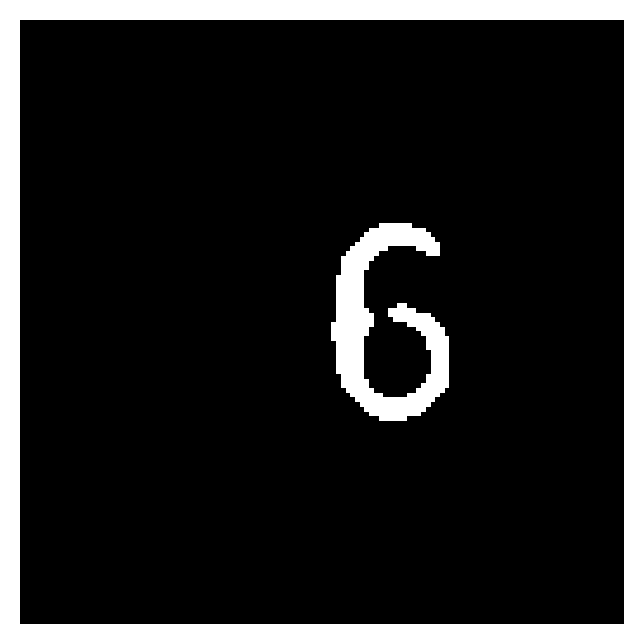

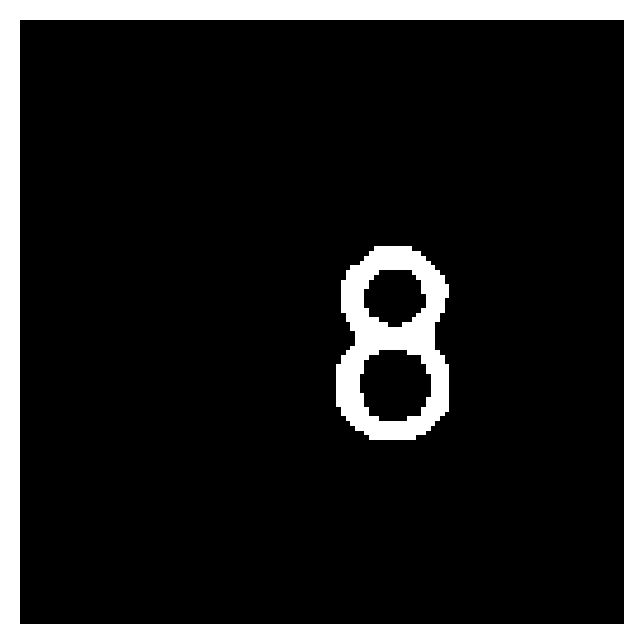

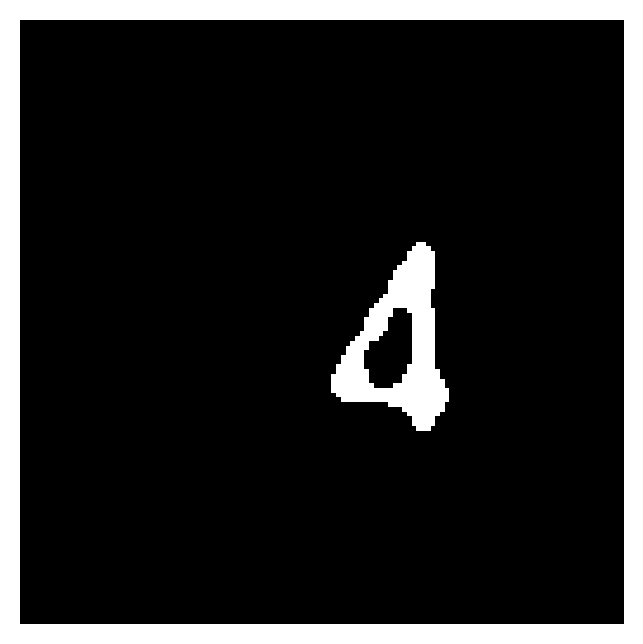

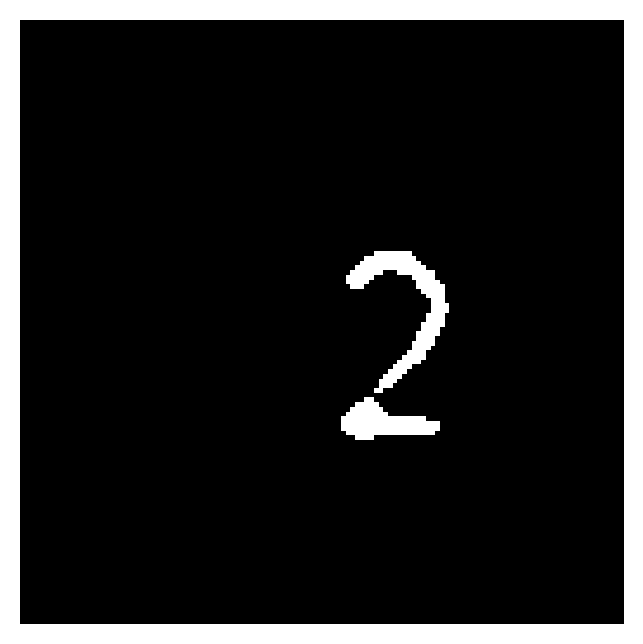

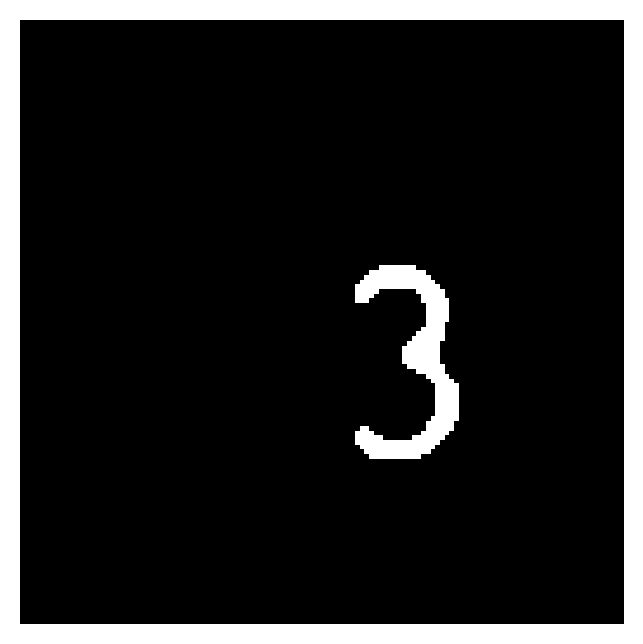

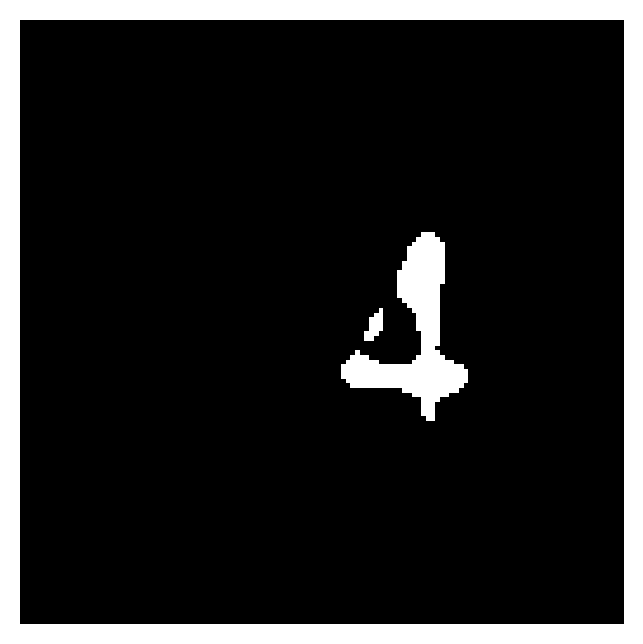

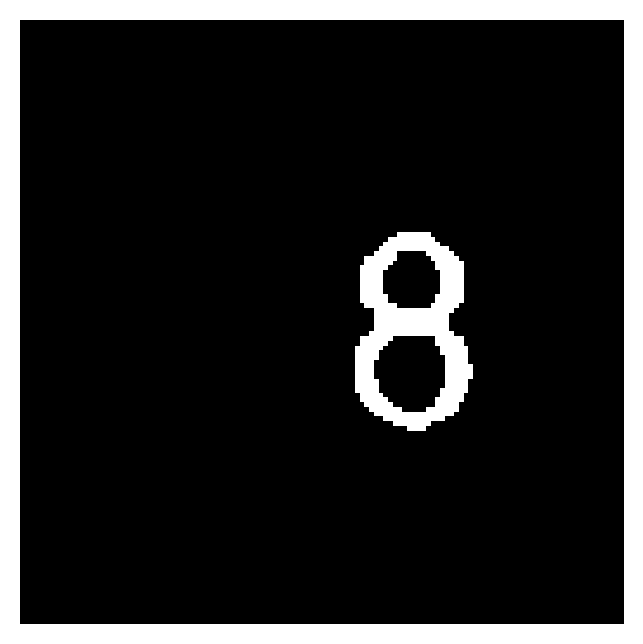

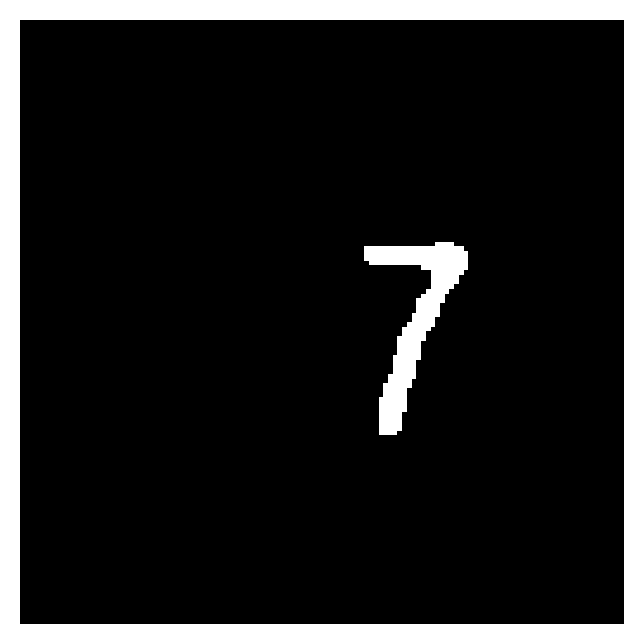

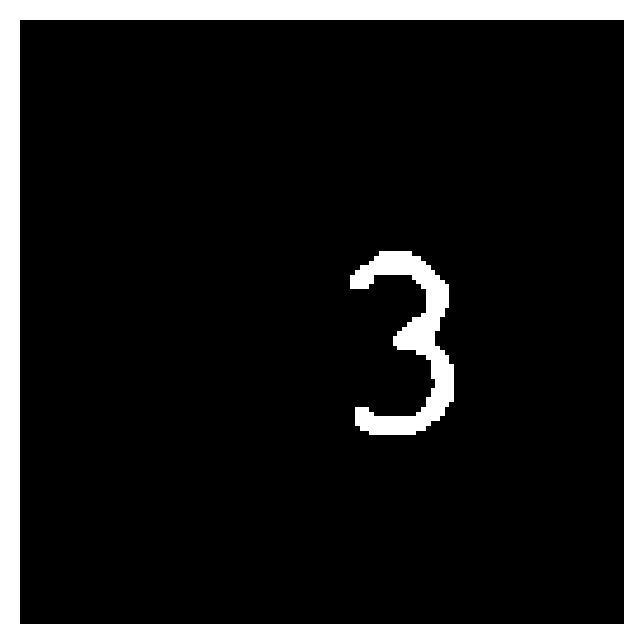

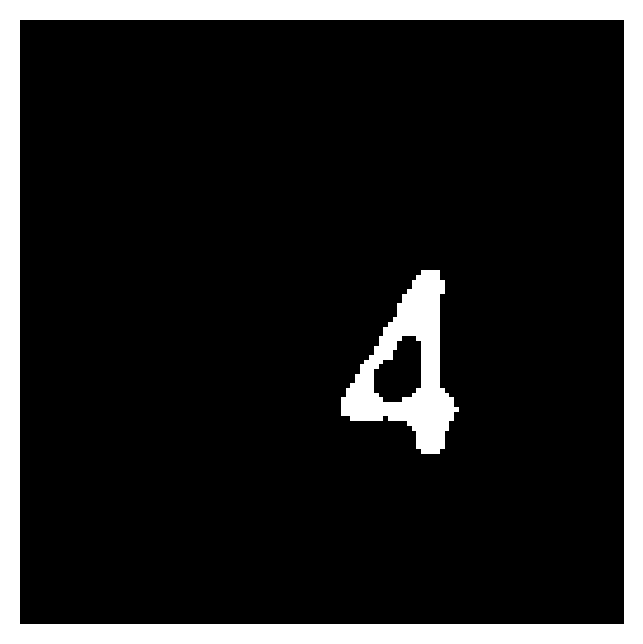

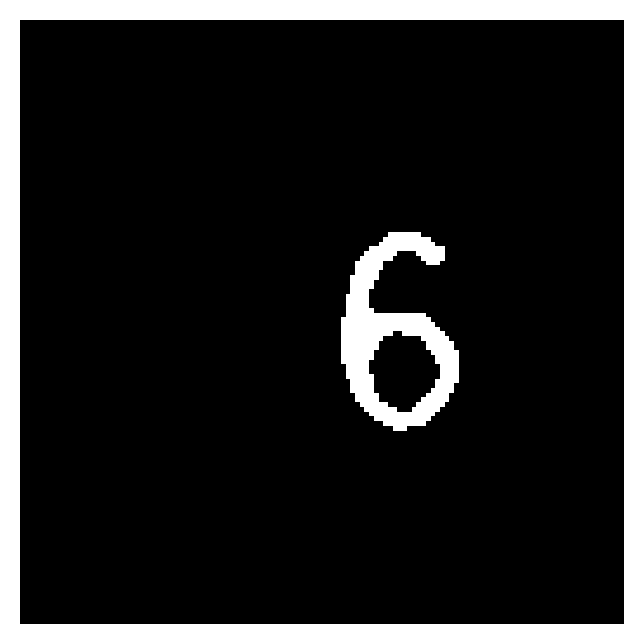

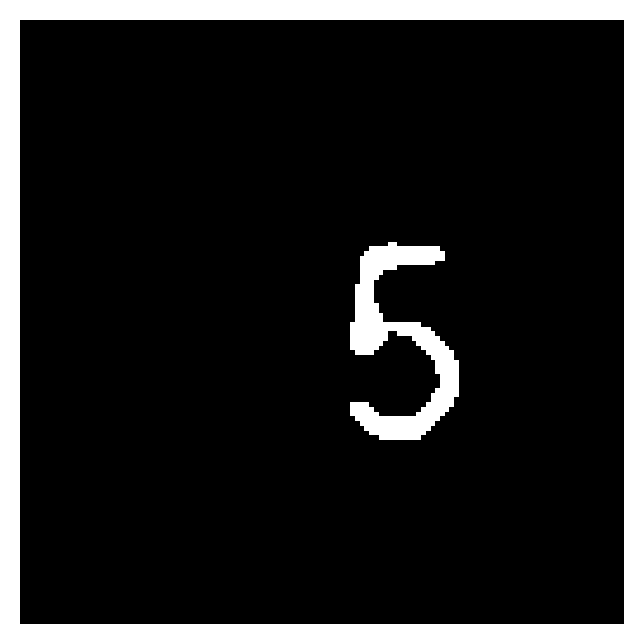

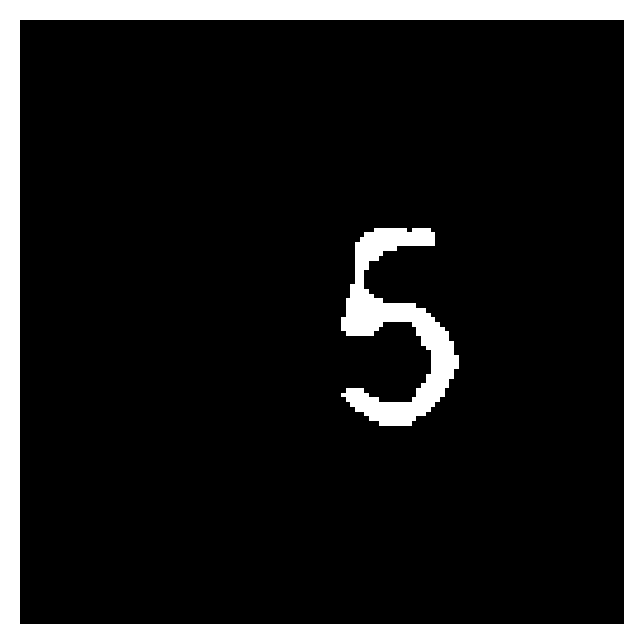

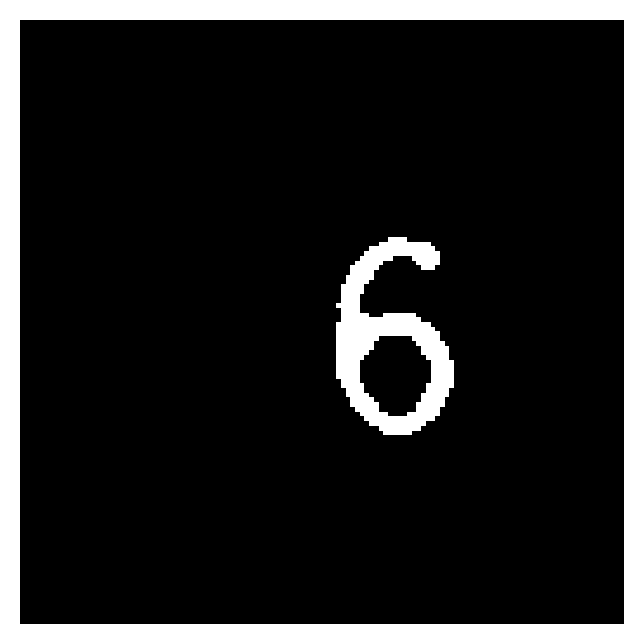

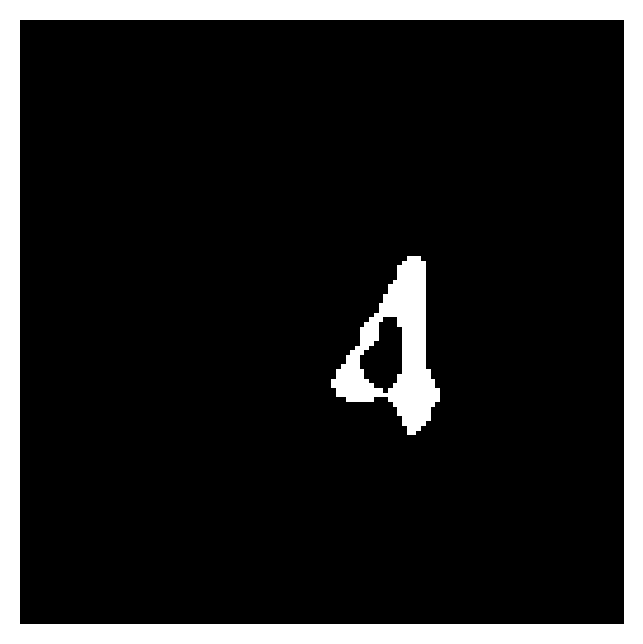

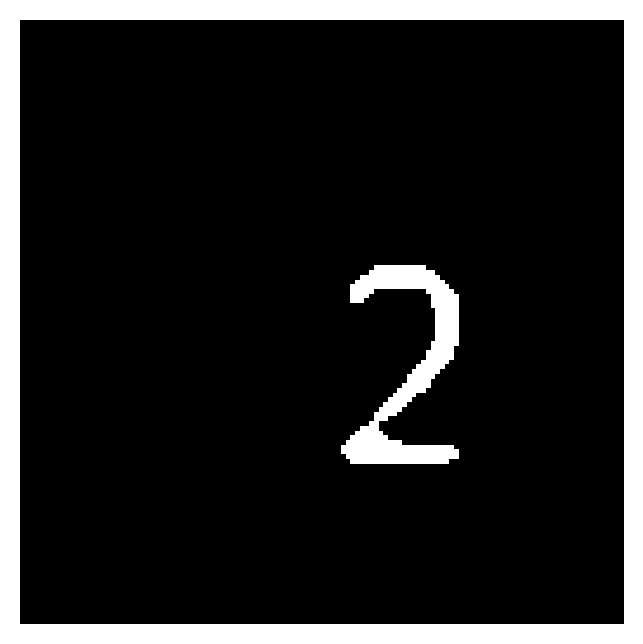

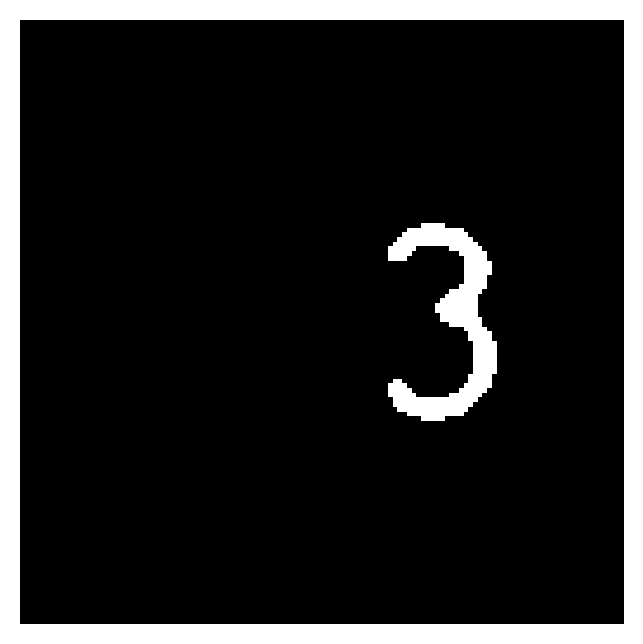

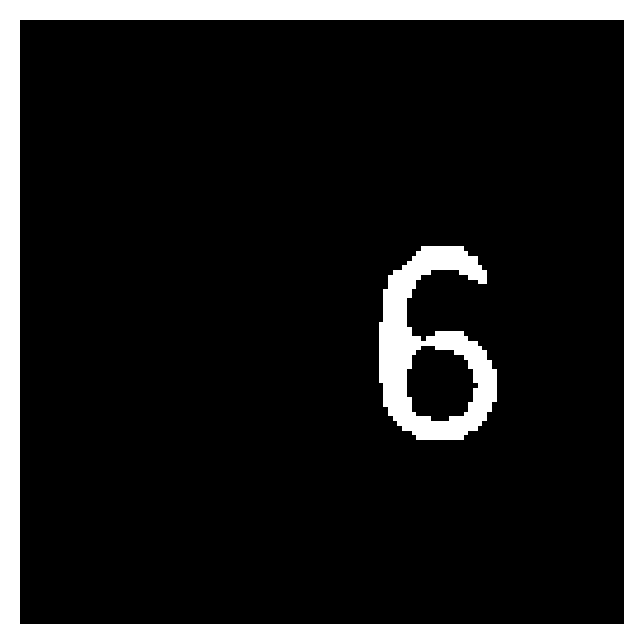

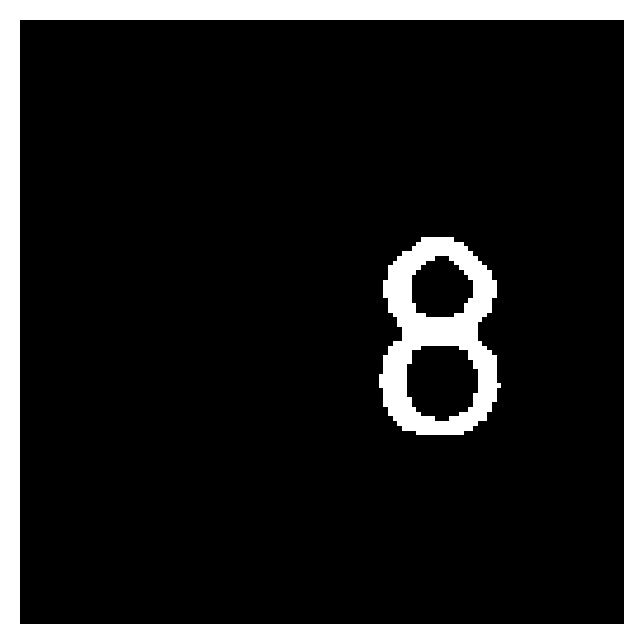

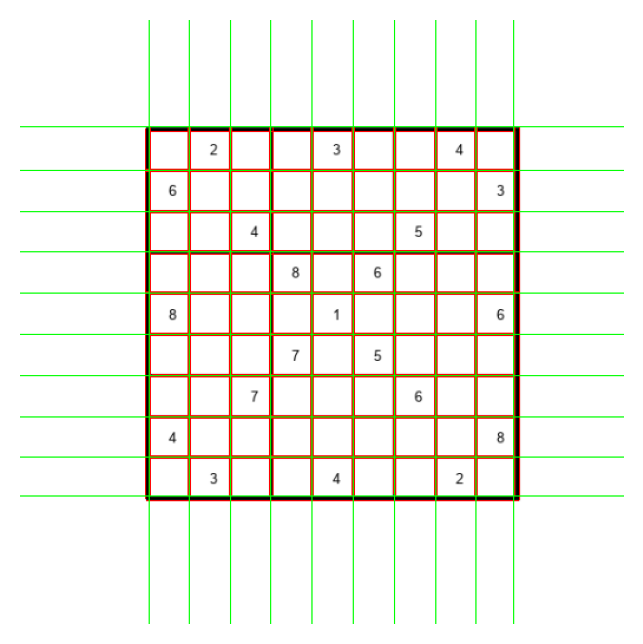

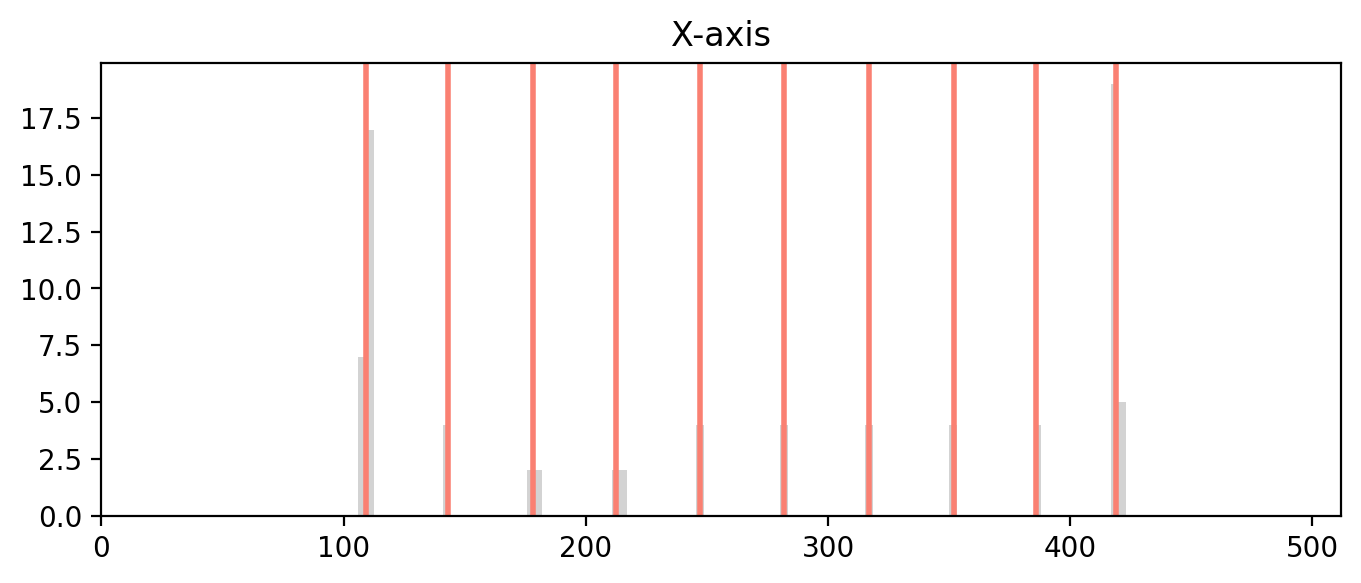

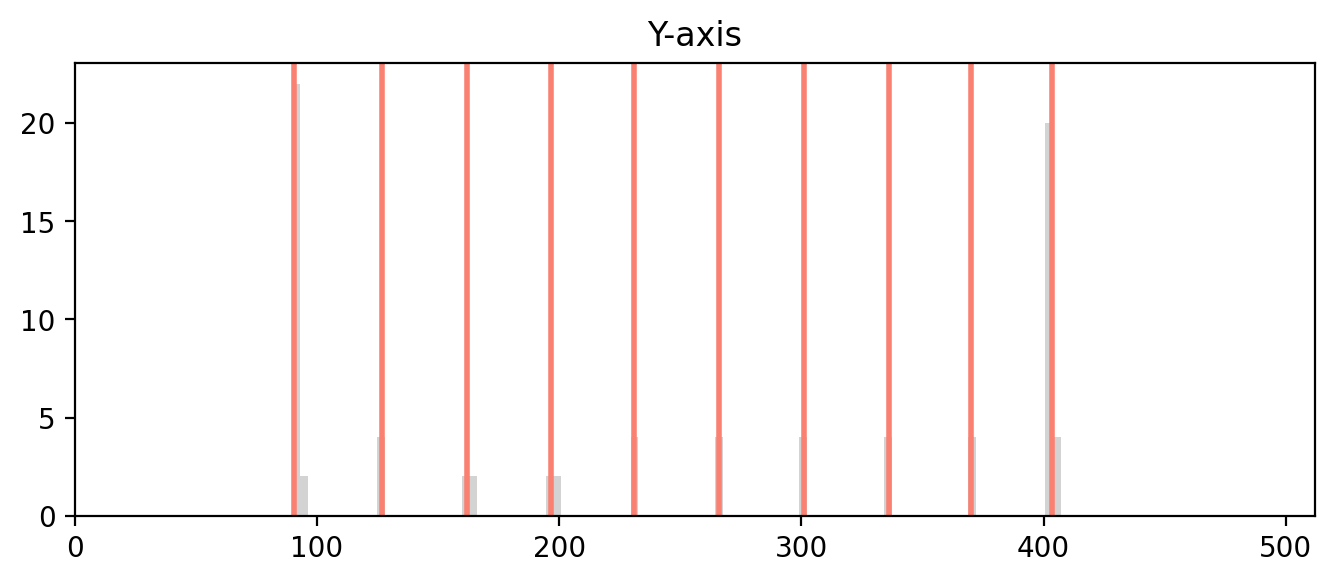

[4.52, 61.0, 116.0, 172.0, 227.0, 283.0, 338.5, 394.0, 450.0, 505.4583333333333] [4.04, 60.0, 116.0, 171.0, 227.0, 282.0, 338.0, 393.0, 449.0, 503.2083333333333]
[(4, 4, 61, 60, 0), (4, 60, 61, 116, 9), (4, 116, 61, 171, 18), (4, 171, 61, 227, 27), (4, 227, 61, 282, 36), (4, 282, 61, 338, 45), (4, 338, 61, 393, 54), (4, 393, 61, 449, 63), (4, 449, 61, 503, 72), (61, 4, 116, 60, 1), (61, 60, 116, 116, 10), (61, 116, 116, 171, 19), (61, 171, 116, 227, 28), (61, 227, 116, 282, 37), (61, 282, 116, 338, 46), (61, 338, 116, 393, 55), (61, 393, 116, 449, 64), (61, 449, 116, 503, 73), (116, 4, 172, 60, 2), (116, 60, 172, 116, 11), (116, 116, 172, 171, 20), (116, 171, 172, 227, 29), (116, 227, 172, 282, 38), (116, 282, 172, 338, 47), (116, 338, 172, 393, 56), (116, 393, 172, 449, 65), (116, 449, 172, 503, 74), (172, 4, 227, 60, 3), (172, 60, 227, 116, 12), (172, 116, 227, 171, 21), (172, 171, 227, 227, 30), (172, 227, 227, 282, 39), (172, 282, 227, 338, 48), (172, 338, 227, 393, 57), (172, 393,

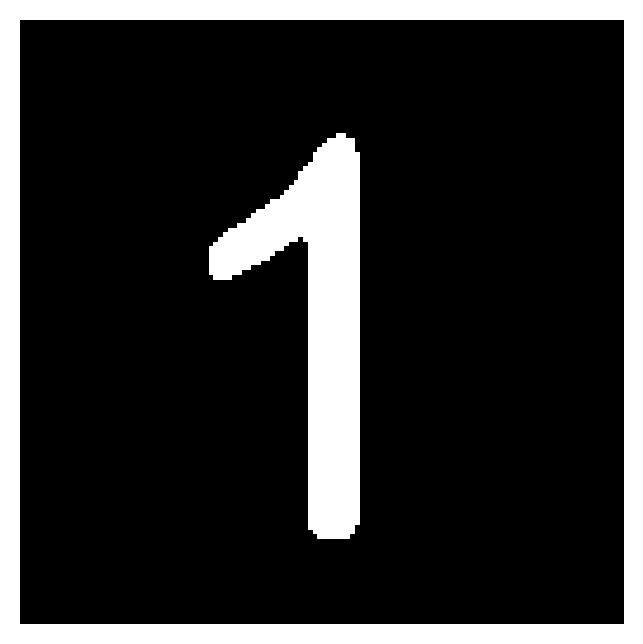

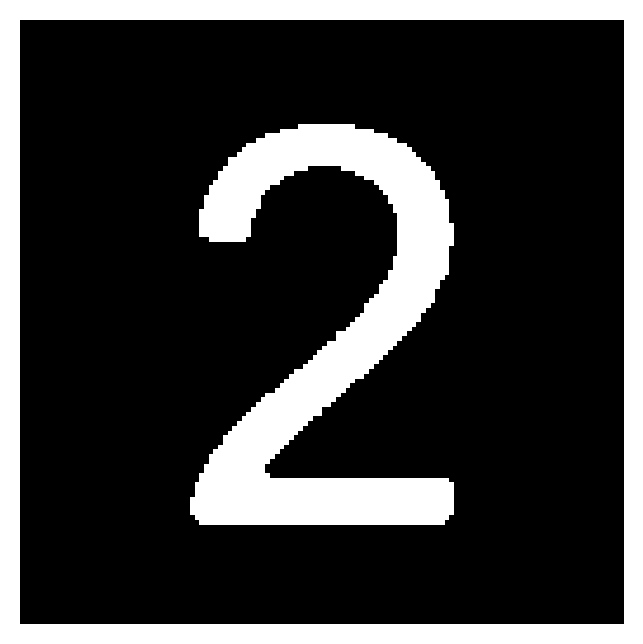

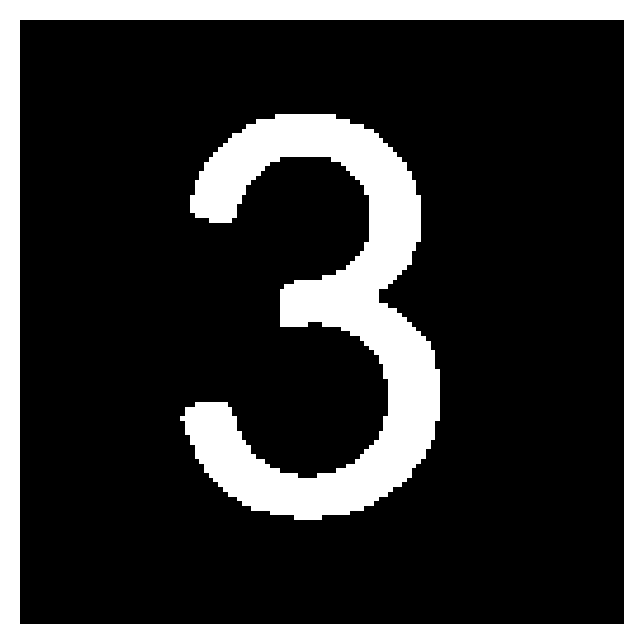

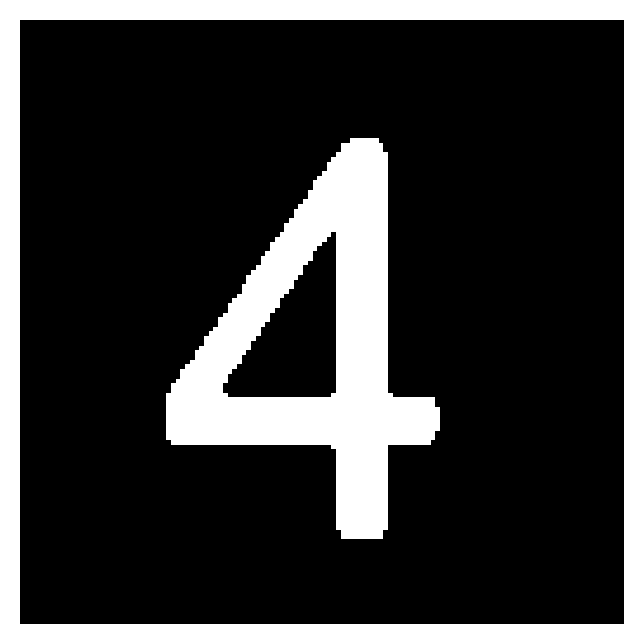

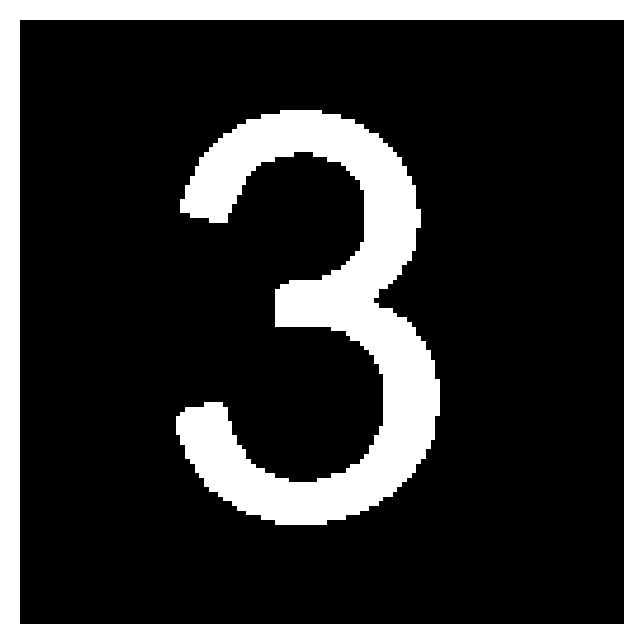

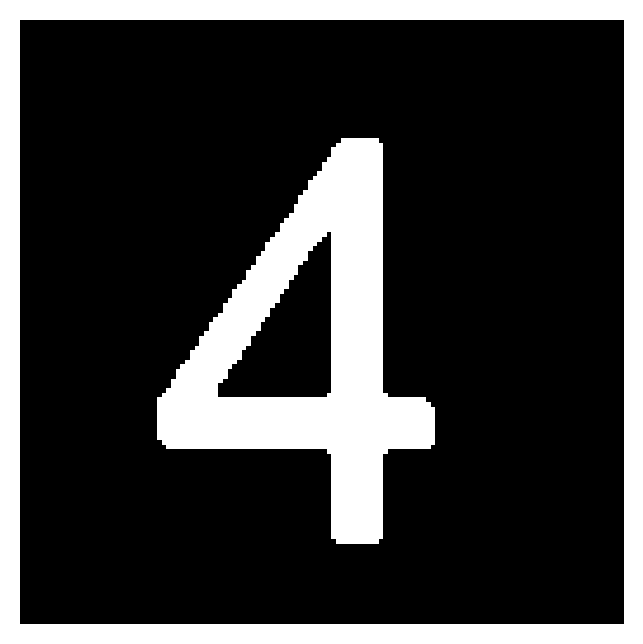

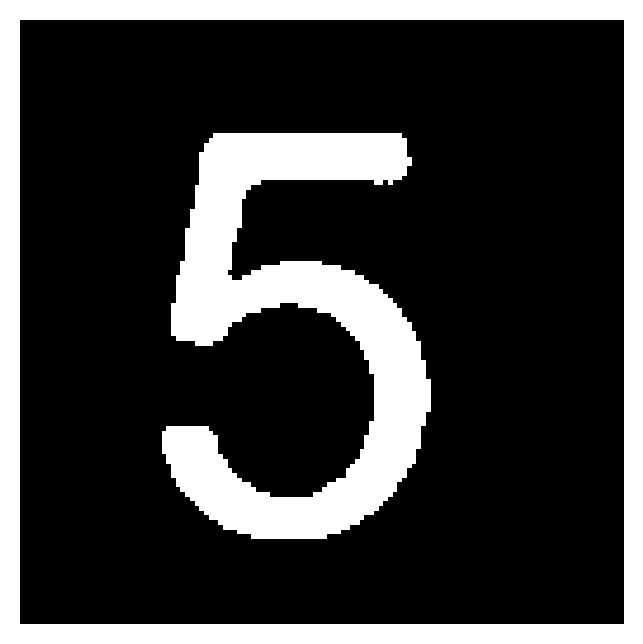

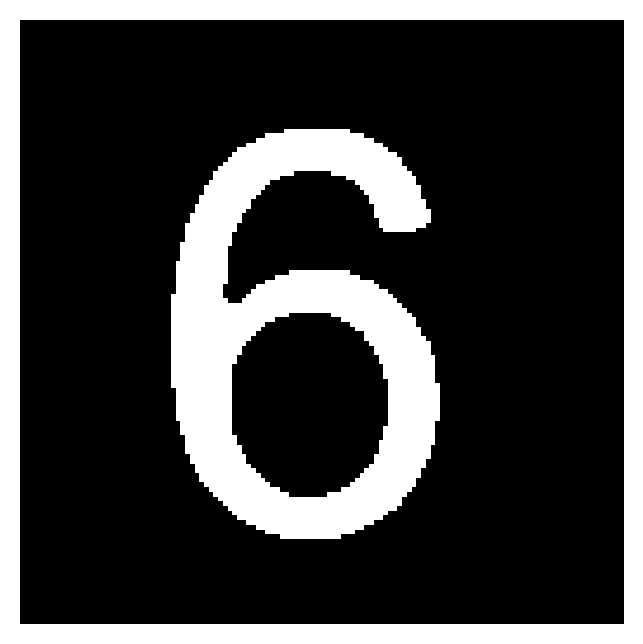

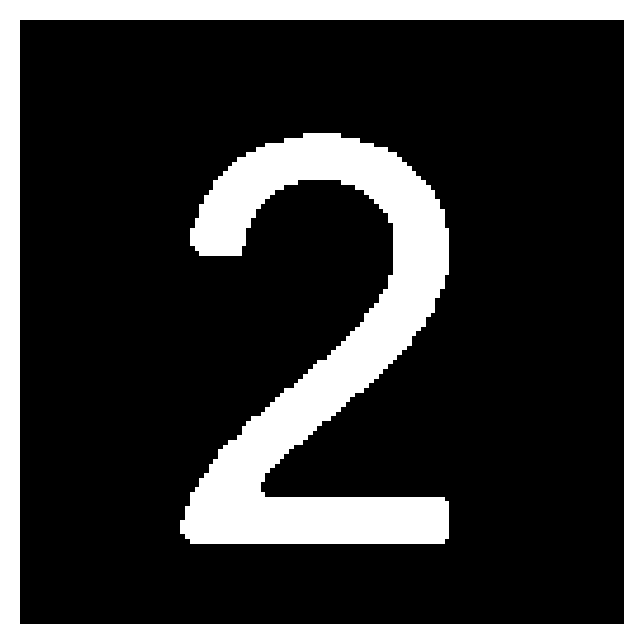

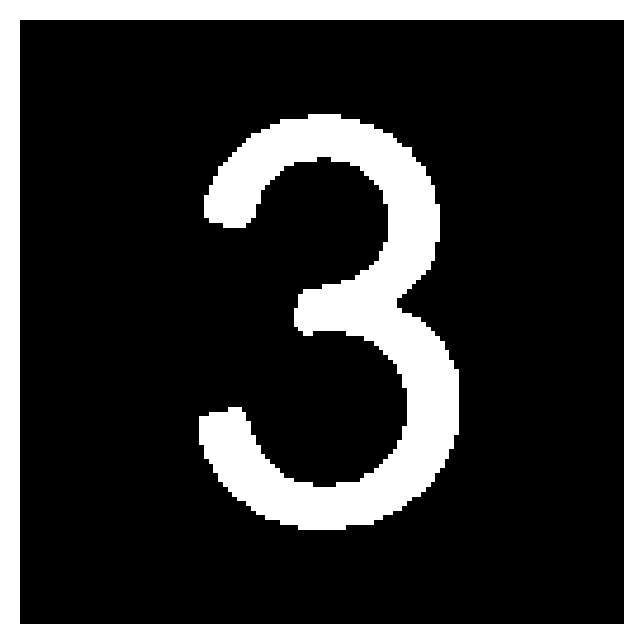

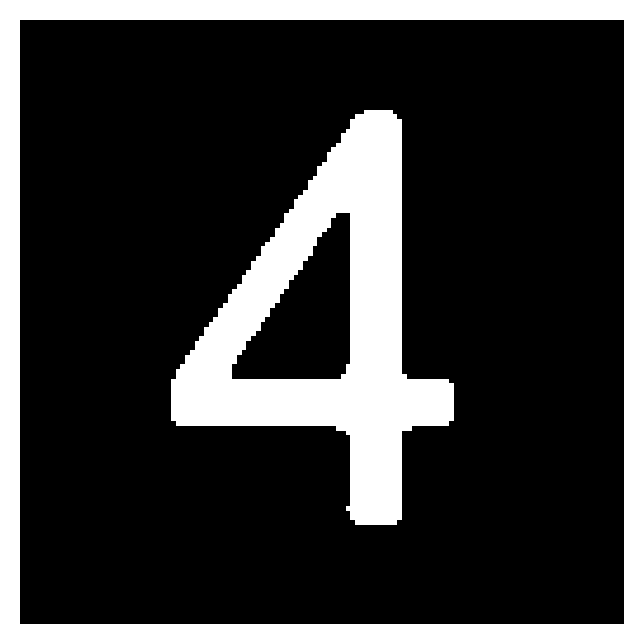

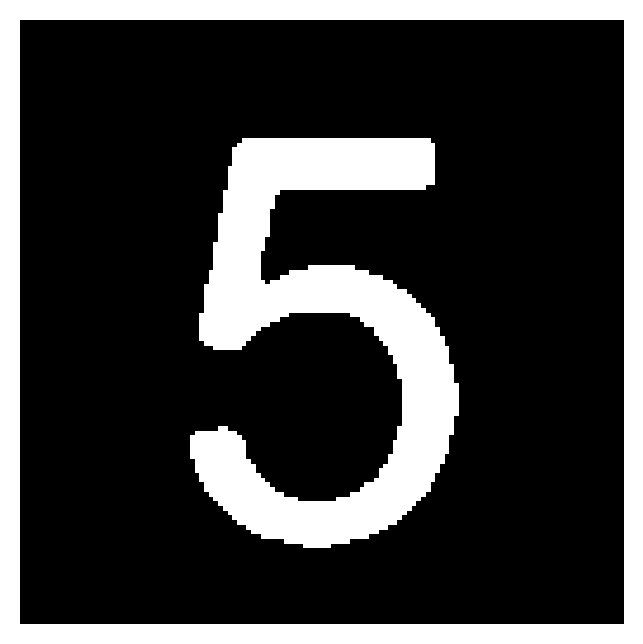

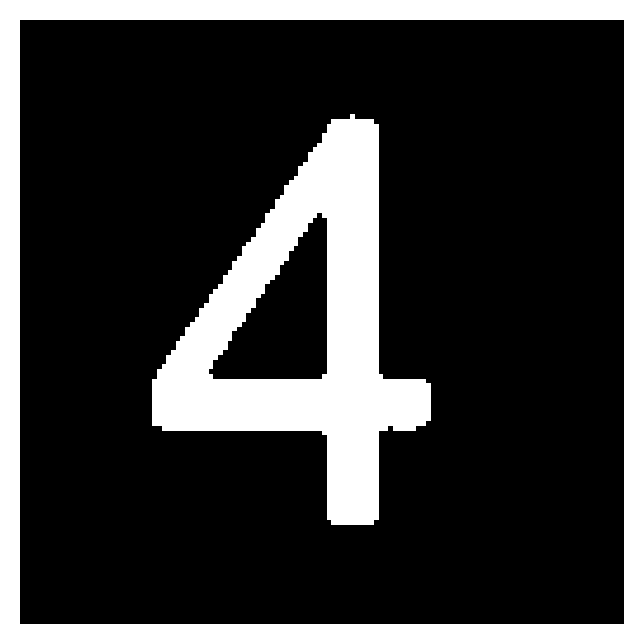

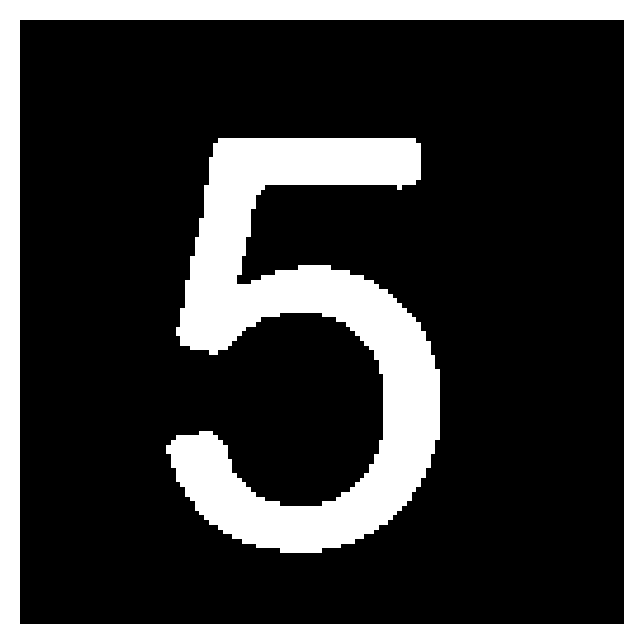

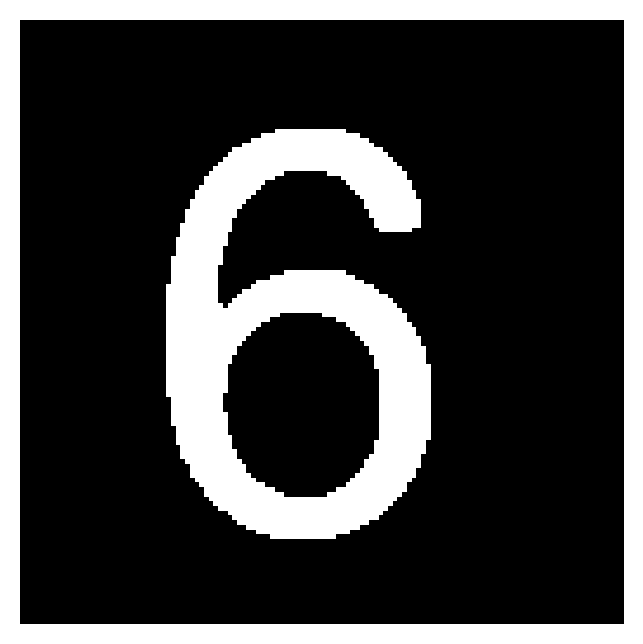

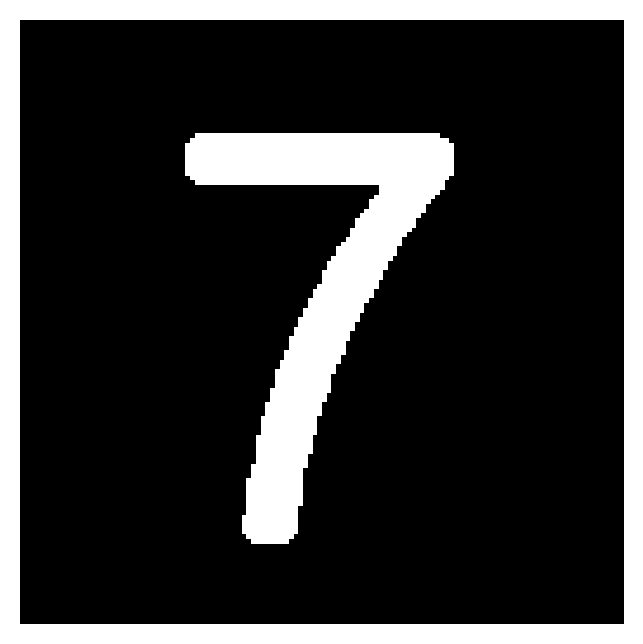

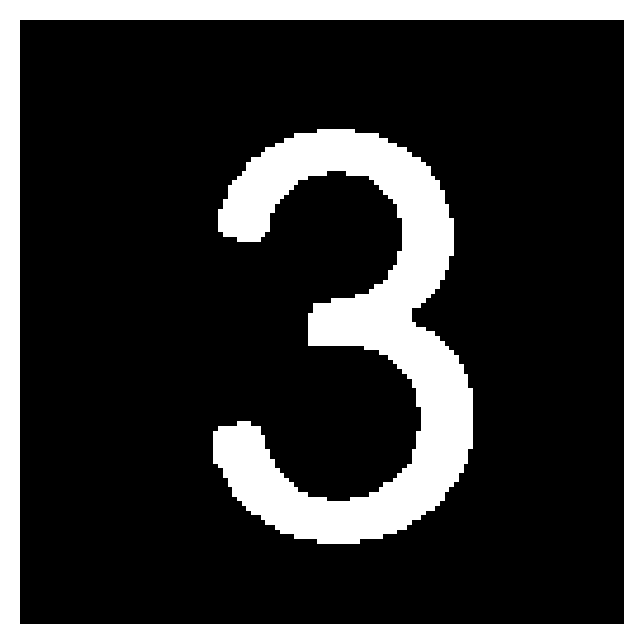

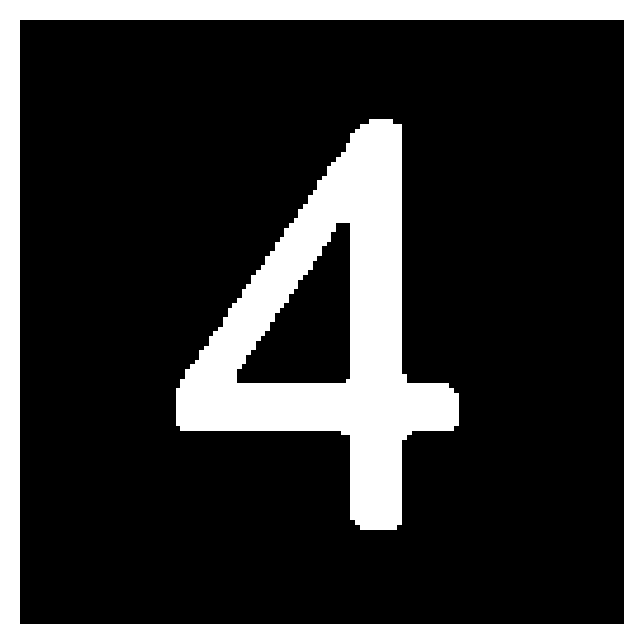

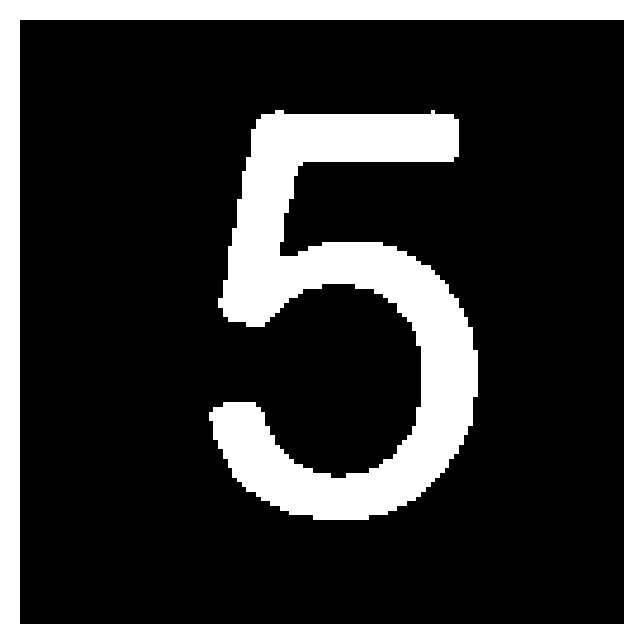

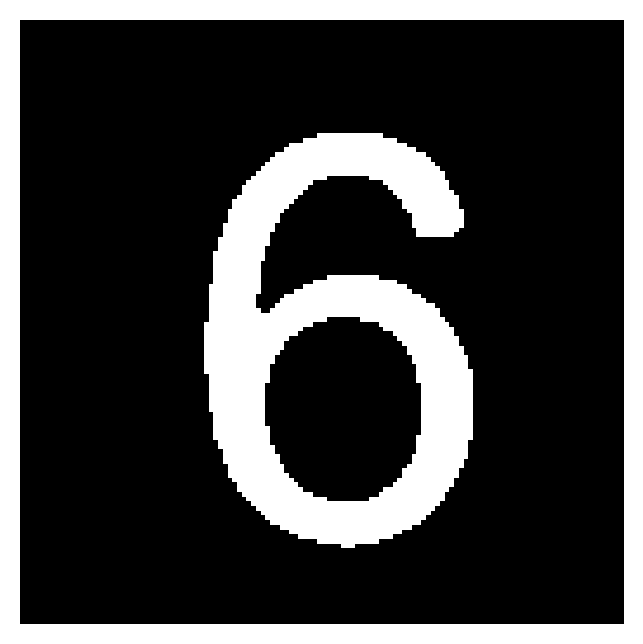

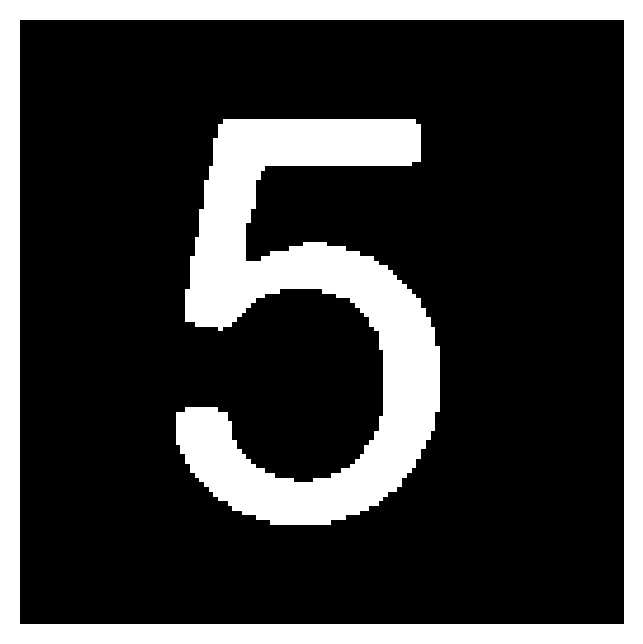

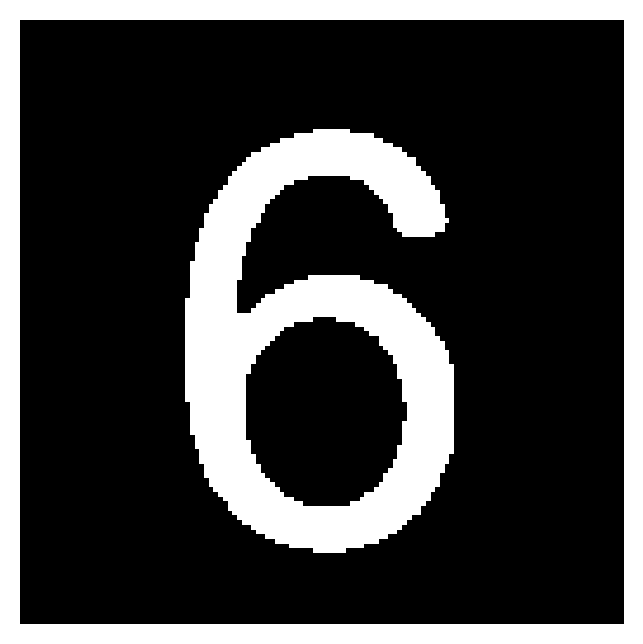

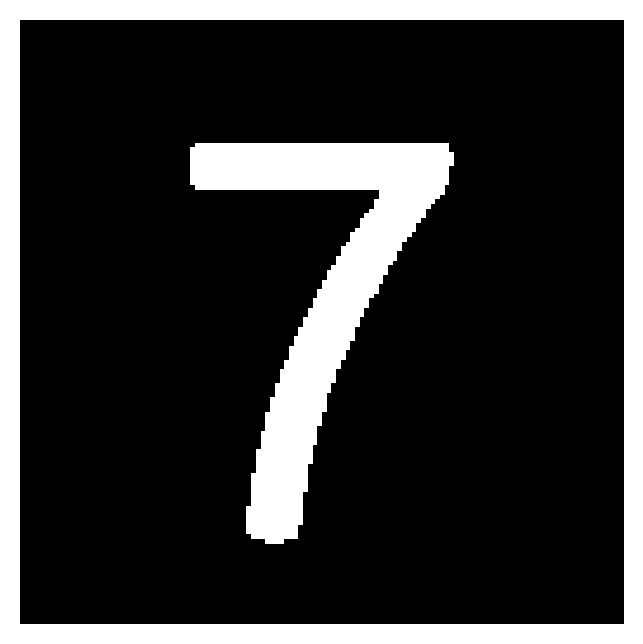

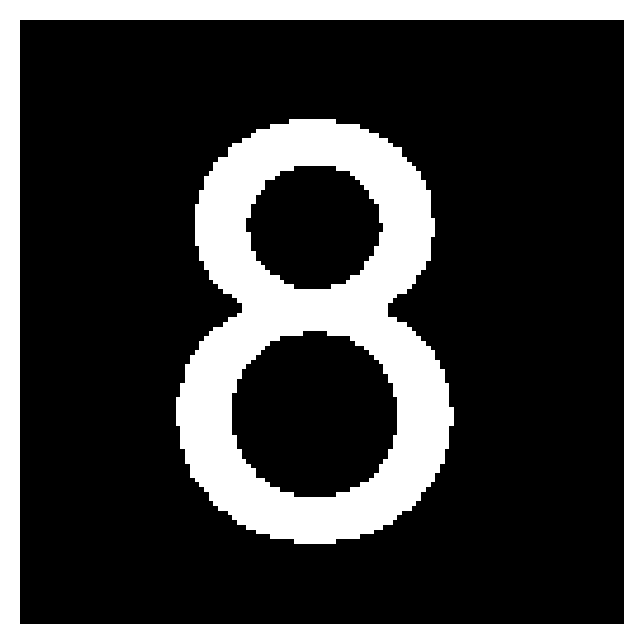

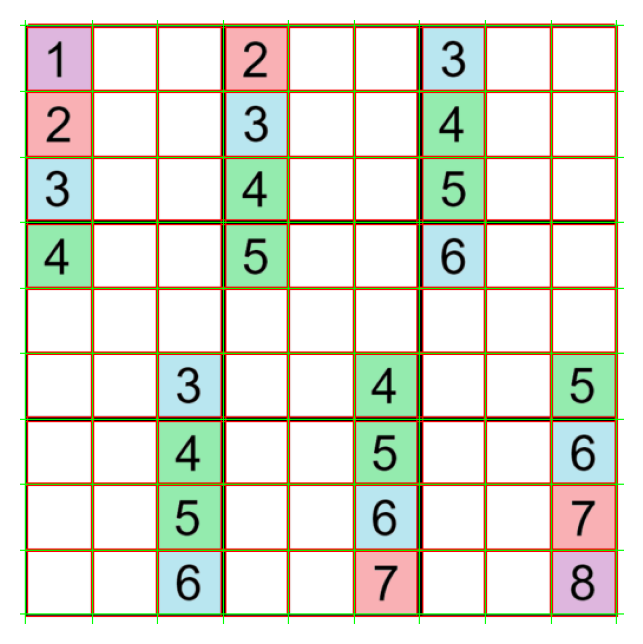

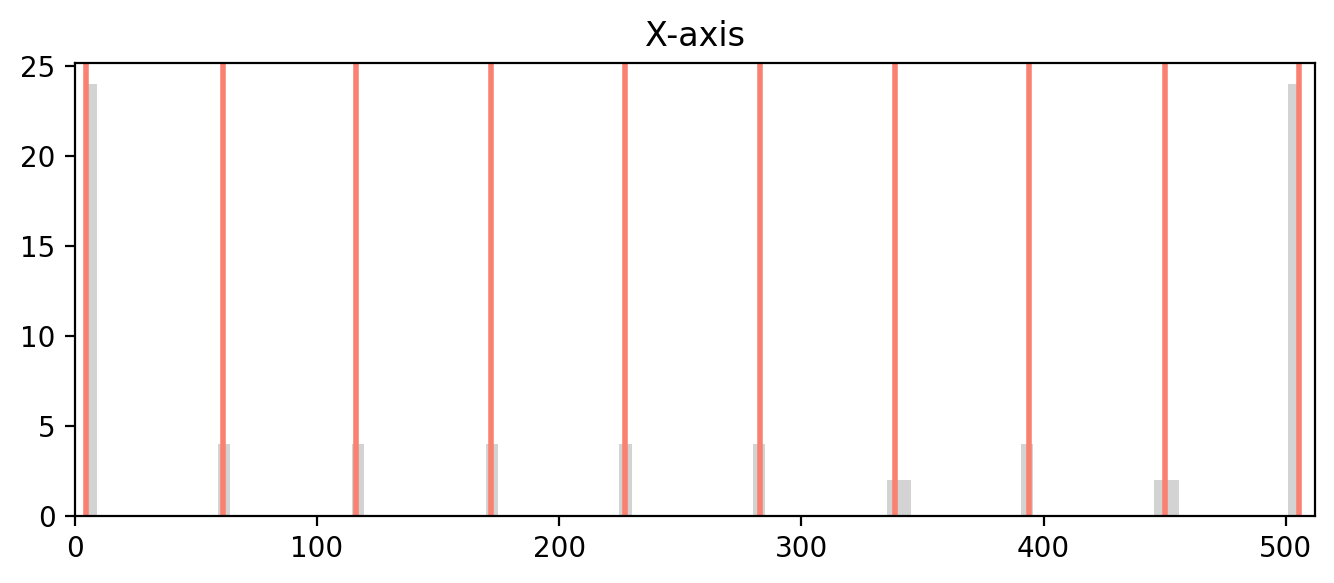

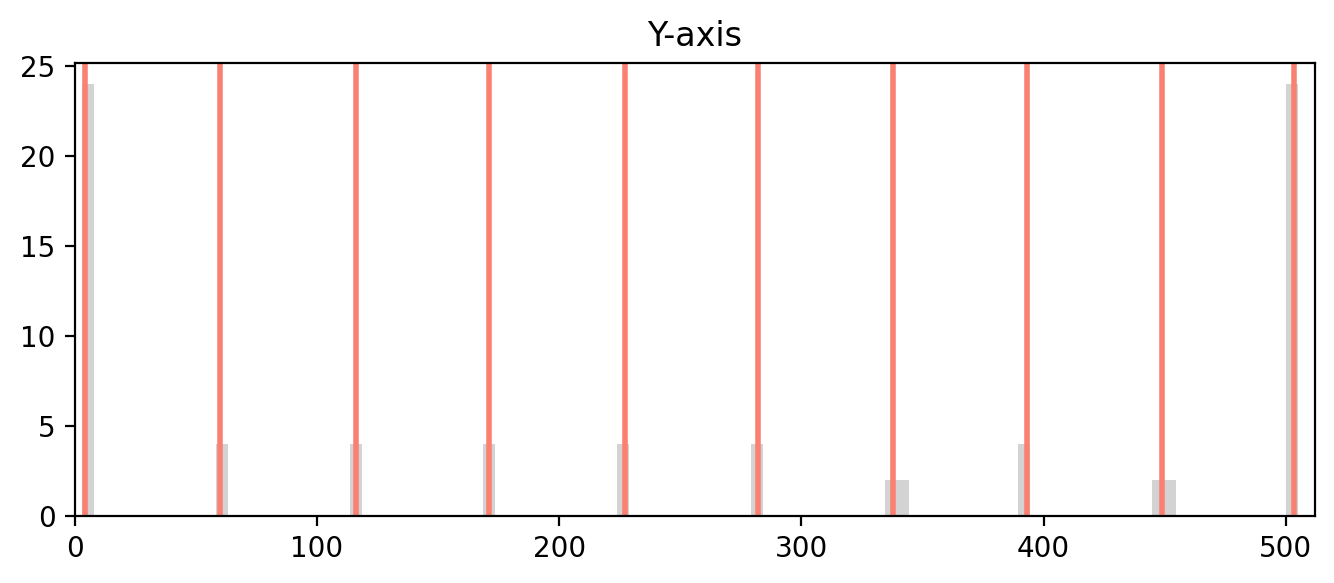

[124.875, 149.75, 162.0, 179.4, 194.66666666666666, 207.0, 225.66666666666666, 253.0, 268.3333333333333, 286.6, 302.25, 329.0, 355.375, 373.8888888888889, 391.4] [99.33333333333333, 121.875, 142.41666666666666, 153.0, 173.66666666666666, 190.0, 199.0, 209.0, 227.66666666666666, 246.4, 271.42857142857144, 282.0, 299.44444444444446, 312.5, 326.75, 351.6363636363636, 367.875]
[(124, 99, 149, 121, 0), (124, 121, 149, 142, 9), (124, 142, 149, 153, 18), (124, 153, 149, 173, 27), (124, 173, 149, 190, 36), (124, 190, 149, 199, 45), (124, 199, 149, 209, 54), (124, 209, 149, 227, 63), (124, 227, 149, 246, 72), (124, 246, 149, 271, 81), (124, 271, 149, 282, 90), (124, 282, 149, 299, 99), (124, 299, 149, 312, 108), (124, 312, 149, 326, 117), (124, 326, 149, 351, 126), (124, 351, 149, 367, 135), (149, 99, 162, 121, 1), (149, 121, 162, 142, 10), (149, 142, 162, 153, 19), (149, 153, 162, 173, 28), (149, 173, 162, 190, 37), (149, 190, 162, 199, 46), (149, 199, 162, 209, 55), (149, 209, 162, 227, 64), 

In [8]:
for img_path in imgs:

    file_name = os.path.basename(img_path)
    output_directory = os.path.join('puzzles', file_name[:file_name.index('.')])
    if not os.path.exists(output_directory):
        os.mkdir(output_directory)

    img = cv2.imread(img_path)
    img_orig = cv2.imread(img_path)

    cv2.imwrite(os.path.join(output_directory, "puzzle.png"), img)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)


    xs, ys = [], []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        xs.append(x1), xs.append(x2)
        ys.append(y1), ys.append(y2)
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

    cv2.imwrite(os.path.join(output_directory, "hough_lines.png"), img)

    k = 0.1
    x_window = k * np.std(xs)
    y_window = k * np.std(ys)
    points_x = detect_cluster(xs, x_window)
    points_y = detect_cluster(ys, y_window)

    for x in points_x:
        cv2.line(img, (int(x), 0), (int(x), 512), (0, 255, 0), thickness=1)
    for y in points_y:
        cv2.line(img, (0, int(y)), (512, int(y)), (0, 255, 0), thickness=1)

    cv2.imwrite(os.path.join(output_directory, "grid.png"), img)

    print(points_x, points_y)

    cells = extract_cells(points_x, points_y)
    print(cells)

    if len(cells) == 81:
        print('Detected grid!')
    else:
        print('Incorrect cell count.')
        continue

    cell_imgs = []

    for x1, y1, x2, y2, i in cells:
        w, h = x2 - x1, y2 - y1
        roi = gray[y1:y1+h, x1:x1+w]
        crop_size = 16
        size = 128
        roi_resized = resize_and_pad(roi, (size + 2*crop_size, size + 2*crop_size), 255)
        roi_cropped = roi_resized[crop_size:crop_size+size,crop_size:crop_size+size]
        _, roi_threshold = cv2.threshold(roi_cropped, 127, 255, cv2.THRESH_BINARY_INV)

        fp = 2
        cv2.floodFill(roi_threshold, None, (fp, fp), (0, 0, 0))
        cv2.floodFill(roi_threshold, None, (fp, size-fp), (0, 0, 0))
        cv2.floodFill(roi_threshold, None, (size-fp, fp), (0, 0, 0))
        cv2.floodFill(roi_threshold, None, (size-fp, size-fp), (0, 0, 0))

        pixel_count = cv2.countNonZero(roi_threshold)
        roi_threshold_gray = cv2.cvtColor(roi_threshold, cv2.COLOR_BGR2RGB)
        cell_imgs.append(roi_threshold_gray)
        cell_name = "cell_{}".format(str(i).rjust(2, '0'))
        cv2.imwrite(os.path.join(output_directory, "{}.png".format(cell_name)), roi_threshold_gray)

        if pixel_count > 250:
            plt.figure(dpi=200)
            plt.imshow(cv2.cvtColor(roi_threshold, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
            digit_name = "digit_{}".format(str(i).rjust(2, '0'))
            cv2.imwrite(os.path.join(output_directory, "{}.png".format(digit_name)), roi_threshold)

    img_to_grid(9, 9, (8, 8), cell_imgs, os.path.join(output_directory, "extracted.png"))

        



    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(dpi=200)
    plt.imshow(image_rgb)
    plt.axis('off')

    plt.figure(figsize=(8, 3), dpi=200)
    plt.hist(xs, bins=100, color="lightgray")
    plt.xlim([0, 512])
    plt.title("X-axis")
    for x in points_x:
        plt.axvline(x, lw=2, c='salmon')
    plt.savefig(os.path.join(output_directory, "histogram_x.png"))
    plt.show()

    plt.figure(figsize=(8, 3), dpi=200)
    plt.hist(ys, bins=100, color="lightgray")
    plt.xlim([0, 512])
    plt.title("Y-axis")
    for y in points_y:
        plt.axvline(y, lw=2, c='salmon')
    plt.savefig(os.path.join(output_directory, "histogram_y.png"))
    plt.show()